### Часть 1

1) Загрузите данные ex2data1.txt из текстового файла.

In [1]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 2/'

In [2]:
files_names = !ls '{DATA_PATH}'
files_names

['ex2data1.txt', 'ex2data2.txt', 'ex2data3.mat']

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

In [4]:
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

сolumns = ['оценка первый экзамен', 'оценка второй экзамен', 'поступил']
df1 = pd.read_csv(files_paths[0], header=None, names=сolumns)
df1

,оценка первый экзамен,оценка второй экзамен,поступил
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


2) Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

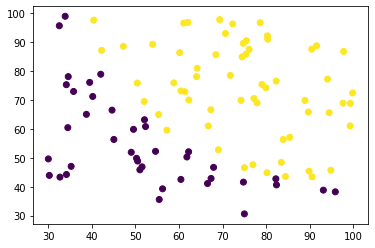

In [5]:
plt.scatter(df1['оценка первый экзамен'].values, 
            df1['оценка второй экзамен'].values, 
            c=df1['поступил'].values)
plt.show()

3) Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [6]:
@np.vectorize
def hack_log(x):
    return np.log(x) if x != 0 else 0

def loss(y_pred, y_true):
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    if np.isnan(-(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()):
        print(y_pred)
        print(y_true)
    return -(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()

In [7]:
@np.vectorize
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            print(self.history[-1][:2])
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
            print(self.history[-1][:2])
        elif optimizer == 'bfgs':
            pass
        elif optimizer == 'bfgs':
            pass
        else:
            raise NotImplementedError()
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [9]:
from sklearn.preprocessing import StandardScaler

data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)

lr_grad = LogRegression(lr=1)
lr_grad.fit(scaled_data1, labels1)

(0, 0.6931471805599453)
(1, 0.559403242545655)
(2, 0.480587664853387)
(3, 0.43046342235936136)
(4, 0.3960564700549831)
(5, 0.37096692788942354)
(6, 0.35181143821554683)
(7, 0.3366625823479171)
(8, 0.3243484792498155)
(9, 0.31411698799771764)
(10, 0.3054632898746155)
(11, 0.2980357306412133)
(12, 0.29158158307561594)
(13, 0.28591434088214984)
(14, 0.2808932044202075)
(15, 0.2764097679797487)
(16, 0.2723791206465764)
(17, 0.2687337409240408)
(18, 0.2654192108626502)
(19, 0.2623911455046634)
(20, 0.25961295257859074)
(21, 0.25705417096290983)
(22, 0.2546892200293838)
(23, 0.2524964455319526)
(24, 0.25045738276072227)
(25, 0.24855618107480798)
(26, 0.24677914982076543)
(27, 0.2451143966177868)
(28, 0.24355153668345658)
(29, 0.24208145734126255)
(30, 0.24069612578706728)
(31, 0.23938843105923613)
(32, 0.23815205326945046)
(33, 0.23698135472344692)
(34, 0.23587128874252009)
(35, 0.23481732289271776)
(36, 0.23381537401406827)
(37, 0.23286175297064188)
(38, 0.2319531174528028)
(39, 0.231086431

(424, 0.20357335772417953)
(425, 0.2035724410274352)
(426, 0.20357153570412317)
(427, 0.20357064160823035)
(428, 0.20356975859570958)
(429, 0.2035688865244516)
(430, 0.20356802525425738)
(431, 0.20356717464681032)
(432, 0.20356633456564985)
(433, 0.20356550487614478)
(434, 0.20356468544546694)
(435, 0.2035638761425659)
(436, 0.20356307683814343)
(437, 0.20356228740462878)
(438, 0.20356150771615372)
(439, 0.2035607376485291)
(440, 0.2035599770792205)
(441, 0.20355922588732495)
(442, 0.203558483953548)
(443, 0.20355775116018102)
(444, 0.20355702739107862)
(445, 0.20355631253163703)
(446, 0.2035556064687718)
(447, 0.20355490909089713)
(448, 0.20355422028790435)
(449, 0.20355353995114142)
(450, 0.20355286797339253)
(451, 0.2035522042488579)
(452, 0.2035515486731339)
(453, 0.2035509011431939)
(454, 0.20355026155736888)
(455, 0.20354962981532826)
(456, 0.20354900581806168)
(457, 0.20354838946786036)
(458, 0.20354778066829923)
(459, 0.20354717932421892)
(460, 0.2035465853417083)
(461, 0.20354

(841, 0.20349824810872877)
(842, 0.2034982417729929)
(843, 0.2034982355108556)
(844, 0.20349822932145945)
(845, 0.20349822320395677)
(846, 0.20349821715751004)
(847, 0.20349821118129166)
(848, 0.20349820527448334)
(849, 0.20349819943627653)
(850, 0.20349819366587227)
(851, 0.2034981879624808)
(852, 0.20349818232532166)
(853, 0.2034981767536235)
(854, 0.2034981712466239)
(855, 0.20349816580356944)
(856, 0.20349816042371566)
(857, 0.20349815510632652)
(858, 0.20349814985067485)
(859, 0.20349814465604177)
(860, 0.20349813952171697)
(861, 0.20349813444699816)
(862, 0.20349812943119172)
(863, 0.20349812447361182)
(864, 0.20349811957358072)
(865, 0.2034981147304283)
(866, 0.20349810994349304)
(867, 0.20349810521212036)
(868, 0.20349810053566372)
(869, 0.20349809591348397)
(870, 0.20349809134494962)
(871, 0.20349808682943643)
(872, 0.20349808236632744)
(873, 0.20349807795501285)
(874, 0.20349807359489025)
(875, 0.20349806928536382)
(876, 0.20349806502584517)
(877, 0.20349806081575245)
(878, 0

(1259, 0.20349770581837237)
(1260, 0.2034977057695297)
(1261, 0.2034977057212512)
(1262, 0.20349770567353037)
(1263, 0.20349770562636083)
(1264, 0.2034977055797362)
(1265, 0.20349770553365018)
(1266, 0.20349770548809648)
(1267, 0.20349770544306897)
(1268, 0.20349770539856166)
(1269, 0.20349770535456846)
(1270, 0.20349770531108338)
(1271, 0.20349770526810068)
(1272, 0.20349770522561447)
(1273, 0.203497705183619)
(1274, 0.20349770514210866)
(1275, 0.2034977051010778)
(1276, 0.20349770506052095)
(1277, 0.20349770502043252)
(1278, 0.20349770498080713)
(1279, 0.20349770494163955)
(1280, 0.2034977049029243)
(1281, 0.2034977048646563)
(1282, 0.20349770482683036)
(1283, 0.20349770478944124)
(1284, 0.20349770475248413)
(1285, 0.2034977047159538)
(1286, 0.20349770467984551)
(1287, 0.2034977046441543)
(1288, 0.20349770460887523)
(1289, 0.20349770457400382)
(1290, 0.20349770453953517)
(1291, 0.20349770450546456)
(1292, 0.20349770447178758)
(1293, 0.20349770443849954)
(1294, 0.20349770440559603)
(1

(1676, 0.20349770162277356)
(1677, 0.20349770162238875)
(1678, 0.20349770162200834)
(1679, 0.20349770162163228)
(1680, 0.20349770162126063)
(1681, 0.20349770162089326)
(1682, 0.20349770162053007)
(1683, 0.20349770162017108)
(1684, 0.20349770161981628)
(1685, 0.20349770161946557)
(1686, 0.20349770161911887)
(1687, 0.20349770161877628)
(1688, 0.2034977016184375)
(1689, 0.20349770161810277)
(1690, 0.2034977016177718)
(1691, 0.2034977016174447)
(1692, 0.20349770161712133)
(1693, 0.20349770161680172)
(1694, 0.2034977016164858)
(1695, 0.20349770161617353)
(1696, 0.2034977016158649)
(1697, 0.2034977016155598)
(1698, 0.20349770161525826)
(1699, 0.2034977016149601)
(1700, 0.20349770161466552)
(1701, 0.2034977016143742)
(1702, 0.2034977016140863)
(1703, 0.20349770161380182)
(1704, 0.2034977016135205)
(1705, 0.20349770161324252)
(1706, 0.20349770161296768)
(1707, 0.20349770161269604)
(1708, 0.20349770161242753)
(1709, 0.2034977016121621)
(1710, 0.20349770161189976)
(1711, 0.20349770161164046)
(17

(2095, 0.2034977015896969)
(2096, 0.20349770158969396)
(2097, 0.20349770158969105)
(2098, 0.20349770158968808)
(2099, 0.20349770158968528)
(2100, 0.20349770158968242)
(2101, 0.20349770158967964)
(2102, 0.20349770158967684)
(2103, 0.20349770158967417)
(2104, 0.20349770158967143)
(2105, 0.2034977015896688)
(2106, 0.20349770158966612)
(2107, 0.20349770158966354)
(2108, 0.203497701589661)
(2109, 0.20349770158965838)
(2110, 0.20349770158965583)
(2111, 0.20349770158965336)
(2112, 0.20349770158965094)
(2113, 0.20349770158964853)
(2114, 0.20349770158964606)
(2115, 0.20349770158964373)
(2116, 0.20349770158964137)
(2117, 0.20349770158963904)
(2118, 0.20349770158963676)
(2119, 0.20349770158963448)
(2120, 0.20349770158963212)
(2121, 0.20349770158962996)
(2122, 0.2034977015896278)
(2123, 0.20349770158962566)
(2124, 0.20349770158962355)
(2125, 0.2034977015896214)
(2126, 0.20349770158961927)
(2127, 0.20349770158961722)
(2128, 0.20349770158961517)
(2129, 0.20349770158961314)
(2130, 0.20349770158961117

4) Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

In [10]:
from scipy.optimize import minimize

class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        print(loss(self.predict(data_with_offset), labels))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        elif optimizer in ['BFGS', 'Nelder-Mead']:
            def goal_func(w):
                predicted_labels = LogRegression(w=w).predict(data_with_offset)
                return loss(predicted_labels, labels)
            self.w = minimize(goal_func, self.w, method=optimizer).x
        else:
            raise NotImplementedError()
        
        print(loss(self.predict(data_with_offset), labels))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [11]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# # scaler = StandardScaler()
# # scaled_data1 = scaler.fit_transform(data1)

lr_bfgs = LogRegression(lr=1)
lr_bfgs.fit(scaled_data1, labels1, optimizer='BFGS')

0.6931471805599453
0.2034977023510503


In [12]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# scaler = StandardScaler()
# scaled_data1 = scaler.fit_transform(data1)

lr_nm = LogRegression(lr=1)
lr_nm.fit(scaled_data1, labels1, optimizer='Nelder-Mead')

0.6931471805599453
0.2034977015994987


5) Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам

In [13]:
optimizer_to_model = {
    'grad': lr_grad,
    'BFGS': lr_bfgs,
    'Nelder-Mead': lr_nm
}

def proba_entered_the_university(mark1, mark2, optimizer='grad'):
    data = scaler.transform([[mark1, mark2]])
    model = optimizer_to_model[optimizer]
    proba = model.predict(data)[0]
    return proba

In [14]:
print(proba_entered_the_university(60, 70, optimizer='grad'))
print(proba_entered_the_university(60, 70, optimizer='BFGS'))
print(proba_entered_the_university(60, 70, optimizer='Nelder-Mead'))

0.7884454969802566
0.788425349418878
0.7884474502419888


6) Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

In [15]:
lr_grad.w

array([1.71844868, 3.99278587, 3.72513483])

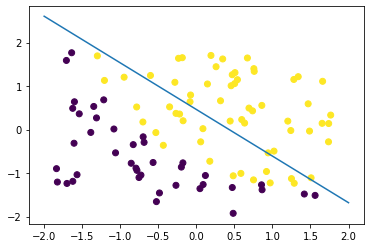

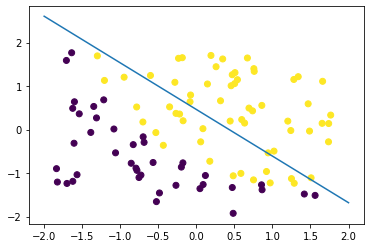

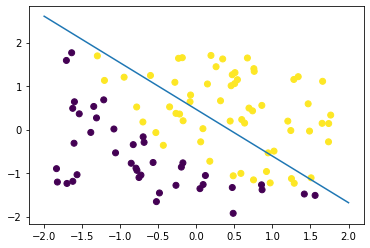

In [16]:
x = np.linspace(-2, 2, 100)

w_grad = lr_grad.w
w_bfgs = lr_bfgs.w
w_nm = lr_nm.w

def get_foo(w):
    @np.vectorize
    def foo(x):
        return -w[1]*x/w[2] + w[0]/w[2] 
    return foo

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_grad)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_bfgs)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_nm)(x))
plt.show()

### Часть 2

7) Загрузите данные ex2data2.txt из текстового файла.

In [17]:
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

сolumns = ['результат первого теста', 'результат второго теста', 'результат прохождения контроля']
df2 = pd.read_csv(files_paths[1], header=None, names=сolumns)
df2

,результат первого теста,результат второго теста,результат прохождения контроля
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


8) Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

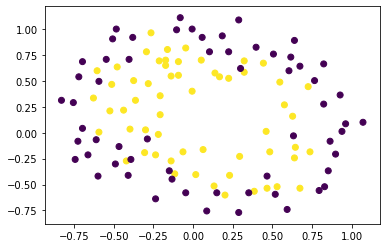

In [18]:
plt.scatter(df2['результат первого теста'].values, 
            df2['результат второго теста'].values, 
            c=df2['результат прохождения контроля'].values)
plt.show()

9) Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).

In [19]:
import itertools

def combine_features(df: pd.DataFrame, power:int, labels_column_name: str):
    features_columns = [column for column in df.columns if column != labels_column_name]
    assert len(features_columns) == 2
    feature1: np.ndarray = df[features_columns[0]].values
    feature2: np.ndarray = df[features_columns[1]].values
    powers = list(range(power + 1))
    features_combinations_list = []
    for i, j in itertools.product(powers, powers):
        if (i + j) > power:
            continue
        features_combination = (feature1 ** i) * (feature2 ** j)
        features_combinations_list.append(features_combination)
    if power == 6:
        assert len(features_combinations_list) == 28
    features_combinations: np.ndarray = np.vstack(features_combinations_list).T
    df2_combined_features = pd.DataFrame.from_records(features_combinations)
#     df2_combined[labels_column_name] = df[labels_column_name]
    return df2_combined_features, df[labels_column_name].copy()

df2_combined_features, labels_series = combine_features(df2, power=6, 
                                                        labels_column_name='результат прохождения контроля')
df2_combined_features.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


10) Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

11) Реализуйте другие методы оптимизации.

In [20]:
def loss_l2(y_pred, y_true, w, lambda_):
    y_pred, y_true, w = np.array(y_pred), np.array(y_true), np.array(w)
    if np.isnan(-(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()):
        print(y_pred)
        print(y_true)
    loss_values = -(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred))
    loss_value = loss_values.sum()
    l2_value = lambda_ * w.dot(w) / 2
#     return (loss_value + l2_value) / loss_values.shape[0]
    return loss_value / loss_values.shape[0] + l2_value

In [21]:
from scipy.optimize import minimize

class LogRegressionL2:
    def __init__(self, w=None, lr=0.01, lambda_=0.001):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
        self.lambda_ = lambda_
        assert self.lr * self.lambda_ < 1
    
    def _calc_grad(self, prediction, labels, data_with_offset):
        return ((prediction - labels) * data_with_offset.T).T.mean(axis=0)
    
    def _log_history(self, iterarion, prediction, labels, grad):
        loss_value = loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_)
        self.history.append((iterarion, loss_value, grad))
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        prediction = self.predict(data_with_offset)
        print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
        if optimizer == 'grad':
#             prediction = self.predict(data_with_offset)
            grad = self._calc_grad(prediction, labels, data_with_offset)
#             l2_part_value = self.lambda_ * self.w / data_with_offset.shape[0]
            l2_part_value = self.lambda_ * self.w
            iterarion = 0
            self._log_history(iterarion, prediction, labels, grad)
            while not np.allclose(self.lr * (grad + l2_part_value), np.zeros(grad.shape)):
#                 l2_part_value = self.lambda_ * self.w / data_with_offset.shape[0]
                l2_part_value = self.lambda_ * self.w
                self.w -= self.lr * (grad + l2_part_value)
                prediction = self.predict(data_with_offset)
                grad = self._calc_grad(prediction, labels, data_with_offset)
                iterarion += 1
                self._log_history(iterarion, prediction, labels, grad)
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        elif optimizer in ['BFGS', 'Nelder-Mead']:
            def goal_func(w):
                predicted_labels = LogRegressionL2(w=w).predict(data_with_offset)
                return loss_l2(predicted_labels, labels, w=w, lambda_=self.lambda_)
            self.w = minimize(goal_func, self.w, method=optimizer).x
        else:
            raise NotImplementedError()
        
        prediction = self.predict(data_with_offset)
        print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [22]:
from datetime import datetime

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_combined_features = scaler.fit_transform(df2_combined_features)

lrl2_grad = LogRegressionL2(lr=1, lambda_=0.00001)

time1 = datetime.now()
lrl2_grad.fit(df2_combined_features, labels_series, optimizer='grad', verbosity=True)
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
(1, 0.6813065213219096)
(2, 0.6719613384459712)
(3, 0.6636833978296511)
(4, 0.6561313462590233)
(5, 0.6491648997967454)
(6, 0.6426924986247069)
(7, 0.6366429557128697)
(8, 0.6309584259898828)
(9, 0.6255913654689527)
(10, 0.6205025005745376)
(11, 0.6156592522819839)
(12, 0.6110344730917528)
(13, 0.6066054300166331)
(14, 0.6023529856424374)
(15, 0.5982609386752687)
(16, 0.5943154925518889)
(17, 0.5905048266886702)
(18, 0.5868187499357603)
(19, 0.5832484198874516)
(20, 0.579786115000119)
(21, 0.576425049113942)
(22, 0.5731592200835457)
(23, 0.5699832858994538)
(24, 0.5668924630136613)
(25, 0.5638824426395559)
(26, 0.5609493216358897)
(27, 0.5580895452519463)
(28, 0.5552998595425271)
(29, 0.5525772716852945)
(30, 0.5499190167718102)
(31, 0.5473225299149098)
(32, 0.5447854227328033)
(33, 0.5423054634454028)
(34, 0.5398805599595241)
(35, 0.5375087454336258)
(36, 0.5351881659050277)
(37, 0.5329170696374123)
(38, 0.5306937979072552)
(39, 0.5285167769973738)
(40, 0.5263845112

(415, 0.362455558695739)
(416, 0.3623701555713808)
(417, 0.3622851393372926)
(418, 0.36220050745705734)
(419, 0.3621162574154915)
(420, 0.3620323867184268)
(421, 0.3619488928924952)
(422, 0.36186577348491766)
(423, 0.36178302606329305)
(424, 0.36170064821539244)
(425, 0.3616186375489535)
(426, 0.36153699169147935)
(427, 0.36145570829003787)
(428, 0.3613747850110649)
(429, 0.3612942195401696)
(430, 0.3612140095819411)
(431, 0.3611341528597586)
(432, 0.3610546471156039)
(433, 0.36097549010987473)
(434, 0.3608966796212015)
(435, 0.3608182134462659)
(436, 0.36074008939962177)
(437, 0.36066230531351806)
(438, 0.36058485903772264)
(439, 0.3605077484393514)
(440, 0.36043097140269537)
(441, 0.3603545258290524)
(442, 0.36027840963656066)
(443, 0.36020262076003284)
(444, 0.3601271571507935)
(445, 0.36005201677651744)
(446, 0.35997719762107094)
(447, 0.3599026976843534)
(448, 0.3598285149821426)
(449, 0.3597546475459403)
(450, 0.35968109342281956)
(451, 0.3596078506752756)
(452, 0.359534917381076

(828, 0.3442960789345316)
(829, 0.34427332425286356)
(830, 0.3442506204549292)
(831, 0.34422796735041716)
(832, 0.34420536474993374)
(833, 0.3441828124649989)
(834, 0.34416031030803945)
(835, 0.3441378580923849)
(836, 0.34411545563226226)
(837, 0.34409310274279)
(838, 0.3440707992399736)
(839, 0.34404854494070014)
(840, 0.3440263396627337)
(841, 0.34400418322470955)
(842, 0.3439820754461293)
(843, 0.343960016147357)
(844, 0.34393800514961254)
(845, 0.34391604227496775)
(846, 0.3438941273463412)
(847, 0.34387226018749406)
(848, 0.3438504406230239)
(849, 0.34382866847836097)
(850, 0.34380694357976344)
(851, 0.3437852657543119)
(852, 0.34376363482990574)
(853, 0.3437420506352575)
(854, 0.34372051299988887)
(855, 0.34369902175412587)
(856, 0.34367757672909444)
(857, 0.3436561777567156)
(858, 0.3436348246697012)
(859, 0.3436135173015493)
(860, 0.3435922554865403)
(861, 0.34357103905973124)
(862, 0.34354986785695296)
(863, 0.3435287417148045)
(864, 0.3435076604706494)
(865, 0.343486623962611

(1210, 0.3381082540986677)
(1211, 0.33809649540077064)
(1212, 0.3380847522864744)
(1213, 0.3380730247161468)
(1214, 0.33806131265029427)
(1215, 0.3380496160495615)
(1216, 0.33803793487473105)
(1217, 0.3380262690867224)
(1218, 0.33801461864659177)
(1219, 0.33800298351553104)
(1220, 0.33799136365486765)
(1221, 0.33797975902606364)
(1222, 0.3379681695907154)
(1223, 0.3379565953105531)
(1224, 0.3379450361474394)
(1225, 0.33793349206337037)
(1226, 0.3379219630204732)
(1227, 0.3379104489810074)
(1228, 0.3378989499073624)
(1229, 0.3378874657620587)
(1230, 0.33787599650774575)
(1231, 0.3378645421072033)
(1232, 0.3378531025233387)
(1233, 0.33784167771918827)
(1234, 0.3378302676579154)
(1235, 0.337818872302811)
(1236, 0.337807491617292)
(1237, 0.3377961255649018)
(1238, 0.3377847741093089)
(1239, 0.3377734372143073)
(1240, 0.33776211484381496)
(1241, 0.3377508069618739)
(1242, 0.33773951353264936)
(1243, 0.3377282345204301)
(1244, 0.3377169698896264)
(1245, 0.33770571960477136)
(1246, 0.33769448

(1574, 0.33461806225578583)
(1575, 0.3346101530897102)
(1576, 0.3346022510372855)
(1577, 0.334594356085653)
(1578, 0.33458646822198873)
(1579, 0.3345785874335036)
(1580, 0.3345707137074433)
(1581, 0.3345628470310876)
(1582, 0.33455498739175127)
(1583, 0.3345471347767829)
(1584, 0.33453928917356557)
(1585, 0.33453145056951633)
(1586, 0.3345236189520862)
(1587, 0.3345157943087599)
(1588, 0.3345079766270561)
(1589, 0.33450016589452686)
(1590, 0.3344923620987579)
(1591, 0.3344845652273683)
(1592, 0.33447677526801023)
(1593, 0.3344689922083694)
(1594, 0.3344612160361642)
(1595, 0.33445344673914607)
(1596, 0.33444568430509936)
(1597, 0.3344379287218411)
(1598, 0.3344301799772208)
(1599, 0.3344224380591205)
(1600, 0.3344147029554549)
(1601, 0.3344069746541705)
(1602, 0.3343992531432467)
(1603, 0.33439153841069386)
(1604, 0.33438383044455544)
(1605, 0.33437612923290594)
(1606, 0.33436843476385214)
(1607, 0.3343607470255321)
(1608, 0.3343530660061154)
(1609, 0.3343453916938034)
(1610, 0.3343377

(1930, 0.3321745345293435)
(1931, 0.332168544598873)
(1932, 0.3321625587585576)
(1933, 0.3321565770029477)
(1934, 0.3321505993266057)
(1935, 0.33214462572410547)
(1936, 0.33213865619003213)
(1937, 0.33213269071898255)
(1938, 0.3321267293055651)
(1939, 0.33212077194439954)
(1940, 0.3321148186301165)
(1941, 0.3321088693573589)
(1942, 0.33210292412078046)
(1943, 0.3320969829150459)
(1944, 0.3320910457348319)
(1945, 0.3320851125748256)
(1946, 0.3320791834297261)
(1947, 0.33207325829424317)
(1948, 0.332067337163098)
(1949, 0.3320614200310226)
(1950, 0.3320555068927601)
(1951, 0.33204959774306503)
(1952, 0.3320436925767026)
(1953, 0.33203779138844886)
(1954, 0.3320318941730913)
(1955, 0.33202600092542806)
(1956, 0.33202011164026796)
(1957, 0.3320142263124311)
(1958, 0.332008344936748)
(1959, 0.3320024675080605)
(1960, 0.33199659402122067)
(1961, 0.3319907244710915)
(1962, 0.33198485885254686)
(1963, 0.33197899716047125)
(1964, 0.33197313938975964)
(1965, 0.3319672855353176)
(1966, 0.33196143

(2320, 0.33010428875188413)
(2321, 0.330099569725175)
(2322, 0.3300948533018152)
(2323, 0.33009013947917387)
(2324, 0.3300854282546248)
(2325, 0.3300807196255457)
(2326, 0.33007601358931904)
(2327, 0.330071310143331)
(2328, 0.3300666092849725)
(2329, 0.33006191101163823)
(2330, 0.33005721532072746)
(2331, 0.33005252220964365)
(2332, 0.3300478316757942)
(2333, 0.3300431437165911)
(2334, 0.33003845832944995)
(2335, 0.33003377551179136)
(2336, 0.33002909526103924)
(2337, 0.33002441757462214)
(2338, 0.3300197424499728)
(2339, 0.3300150698845279)
(2340, 0.3300103998757282)
(2341, 0.33000573242101894)
(2342, 0.3300010675178492)
(2343, 0.3299964051636721)
(2344, 0.32999174535594483)
(2345, 0.32998708809212896)
(2346, 0.32998243336969)
(2347, 0.32997778118609755)
(2348, 0.32997313153882485)
(2349, 0.32996848442535004)
(2350, 0.3299638398431542)
(2351, 0.3299591977897236)
(2352, 0.3299545582625478)
(2353, 0.32994992125912037)
(2354, 0.3299452867769392)
(2355, 0.32994065481350593)
(2356, 0.32993

(2748, 0.3282932492454898)
(2749, 0.32828944875417293)
(2750, 0.3282856500342059)
(2751, 0.3282818530841597)
(2752, 0.328278057902607)
(2753, 0.3282742644881224)
(2754, 0.3282704728392823)
(2755, 0.3282666829546645)
(2756, 0.32826289483284893)
(2757, 0.3282591084724171)
(2758, 0.32825532387195244)
(2759, 0.3282515410300404)
(2760, 0.32824775994526717)
(2761, 0.32824398061622184)
(2762, 0.32824020304149487)
(2763, 0.328236427219678)
(2764, 0.3282326531493652)
(2765, 0.32822888082915225)
(2766, 0.3282251102576363)
(2767, 0.3282213414334165)
(2768, 0.32821757435509363)
(2769, 0.3282138090212702)
(2770, 0.32821004543055055)
(2771, 0.3282062835815405)
(2772, 0.32820252347284773)
(2773, 0.3281987651030819)
(2774, 0.3281950084708538)
(2775, 0.3281912535747765)
(2776, 0.32818750041346445)
(2777, 0.3281837489855339)
(2778, 0.3281799992896026)
(2779, 0.3281762513242903)
(2780, 0.32817250508821866)
(2781, 0.3281687605800101)
(2782, 0.3281650177982897)
(2783, 0.3281612767416837)
(2784, 0.328157537

(3131, 0.326955347669136)
(3132, 0.32695213519141875)
(3133, 0.3269489240435116)
(3134, 0.3269457142244866)
(3135, 0.326942505733417)
(3136, 0.32693929856937687)
(3137, 0.32693609273144153)
(3138, 0.32693288821868693)
(3139, 0.32692968503018993)
(3140, 0.32692648316502837)
(3141, 0.32692328262228126)
(3142, 0.3269200834010285)
(3143, 0.3269168855003507)
(3144, 0.3269136889193296)
(3145, 0.32691049365704755)
(3146, 0.32690729971258836)
(3147, 0.3269041070850365)
(3148, 0.32690091577347713)
(3149, 0.32689772577699694)
(3150, 0.3268945370946828)
(3151, 0.3268913497256234)
(3152, 0.3268881636689073)
(3153, 0.32688497892362495)
(3154, 0.32688179548886714)
(3155, 0.3268786133637259)
(3156, 0.3268754325472938)
(3157, 0.3268722530386648)
(3158, 0.32686907483693334)
(3159, 0.32686589794119514)
(3160, 0.3268627223505466)
(3161, 0.3268595480640851)
(3162, 0.32685637508090915)
(3163, 0.3268532034001176)
(3164, 0.32685003302081067)
(3165, 0.3268468639420898)
(3166, 0.32684369616305625)
(3167, 0.326

(3558, 0.32569376753791285)
(3559, 0.32569104909907787)
(3560, 0.32568833166531996)
(3561, 0.3256856152360175)
(3562, 0.32568289981054965)
(3563, 0.325680185388296)
(3564, 0.3256774719686368)
(3565, 0.32567475955095226)
(3566, 0.32567204813462364)
(3567, 0.325669337719033)
(3568, 0.3256666283035621)
(3569, 0.32566391988759397)
(3570, 0.3256612124705118)
(3571, 0.3256585060516995)
(3572, 0.3256558006305412)
(3573, 0.3256530962064223)
(3574, 0.3256503927787275)
(3575, 0.32564769034684304)
(3576, 0.3256449889101556)
(3577, 0.32564228846805193)
(3578, 0.32563958901991963)
(3579, 0.32563689056514694)
(3580, 0.32563419310312197)
(3581, 0.3256314966332344)
(3582, 0.3256288011548732)
(3583, 0.3256261066674291)
(3584, 0.32562341317029236)
(3585, 0.3256207206628544)
(3586, 0.3256180291445069)
(3587, 0.32561533861464204)
(3588, 0.3256126490726527)
(3589, 0.325609960517932)
(3590, 0.3256072729498737)
(3591, 0.3256045863678723)
(3592, 0.3256019007713226)
(3593, 0.3255992161596198)
(3594, 0.32559653

(3990, 0.3246053748593129)
(3991, 0.32460303910768346)
(3992, 0.32460070413529885)
(3993, 0.3245983699417208)
(3994, 0.32459603652651164)
(3995, 0.32459370388923403)
(3996, 0.32459137202945054)
(3997, 0.32458904094672475)
(3998, 0.32458671064061984)
(3999, 0.32458438111070004)
(4000, 0.32458205235652937)
(4001, 0.32457972437767235)
(4002, 0.32457739717369394)
(4003, 0.32457507074415937)
(4004, 0.324572745088634)
(4005, 0.32457042020668386)
(4006, 0.32456809609787507)
(4007, 0.324565772761774)
(4008, 0.3245634501979479)
(4009, 0.32456112840596363)
(4010, 0.32455880738538884)
(4011, 0.32455648713579105)
(4012, 0.32455416765673883)
(4013, 0.3245518489478006)
(4014, 0.3245495310085449)
(4015, 0.32454721383854124)
(4016, 0.32454489743735887)
(4017, 0.3245425818045676)
(4018, 0.3245402669397375)
(4019, 0.3245379528424391)
(4020, 0.32453563951224296)
(4021, 0.3245333269487206)
(4022, 0.3245310151514432)
(4023, 0.3245287041199824)
(4024, 0.32452639385391047)
(4025, 0.3245240843527997)
(4026, 0

(4374, 0.3237619226814311)
(4375, 0.3237598567908788)
(4376, 0.3237577915330477)
(4377, 0.3237557269076068)
(4378, 0.3237536629142247)
(4379, 0.3237515995525707)
(4380, 0.32374953682231444)
(4381, 0.32374747472312543)
(4382, 0.32374541325467326)
(4383, 0.3237433524166286)
(4384, 0.3237412922086613)
(4385, 0.3237392326304424)
(4386, 0.32373717368164223)
(4387, 0.3237351153619321)
(4388, 0.32373305767098326)
(4389, 0.3237310006084671)
(4390, 0.32372894417405557)
(4391, 0.3237268883674202)
(4392, 0.3237248331882336)
(4393, 0.3237227786361679)
(4394, 0.32372072471089586)
(4395, 0.3237186714120901)
(4396, 0.32371661873942414)
(4397, 0.3237145666925709)
(4398, 0.3237125152712041)
(4399, 0.32371046447499763)
(4400, 0.3237084143036251)
(4401, 0.32370636475676107)
(4402, 0.32370431583407994)
(4403, 0.32370226753525616)
(4404, 0.3237002198599649)
(4405, 0.3236981728078812)
(4406, 0.32369612637868034)
(4407, 0.323694080572038)
(4408, 0.32369203538762975)
(4409, 0.32368999082513183)
(4410, 0.32368

(4781, 0.3229699291785754)
(4782, 0.32296809579912356)
(4783, 0.3229662629345848)
(4784, 0.3229644305847066)
(4785, 0.32296259874923733)
(4786, 0.3229607674279252)
(4787, 0.3229589366205187)
(4788, 0.3229571063267667)
(4789, 0.3229552765464173)
(4790, 0.32295344727922026)
(4791, 0.32295161852492427)
(4792, 0.32294979028327847)
(4793, 0.32294796255403235)
(4794, 0.32294613533693567)
(4795, 0.32294430863173834)
(4796, 0.3229424824381898)
(4797, 0.32294065675604033)
(4798, 0.32293883158504016)
(4799, 0.3229370069249398)
(4800, 0.32293518277548977)
(4801, 0.32293335913644056)
(4802, 0.3229315360075434)
(4803, 0.3229297133885491)
(4804, 0.3229278912792089)
(4805, 0.3229260696792741)
(4806, 0.32292424858849644)
(4807, 0.32292242800662746)
(4808, 0.322920607933419)
(4809, 0.3229187883686229)
(4810, 0.3229169693119916)
(4811, 0.32291515076327737)
(4812, 0.3229133327222327)
(4813, 0.32291151518861)
(4814, 0.32290969816216236)
(4815, 0.3229078816426425)
(4816, 0.32290606562980373)
(4817, 0.32290

(5168, 0.32229659618447903)
(5169, 0.32229494470217773)
(5170, 0.3222932936482803)
(5171, 0.3222916430225891)
(5172, 0.3222899928249069)
(5173, 0.3222883430550362)
(5174, 0.32228669371277957)
(5175, 0.32228504479793996)
(5176, 0.3222833963103202)
(5177, 0.3222817482497235)
(5178, 0.32228010061595314)
(5179, 0.32227845340881234)
(5180, 0.3222768066281046)
(5181, 0.3222751602736334)
(5182, 0.3222735143452026)
(5183, 0.3222718688426157)
(5184, 0.3222702237656769)
(5185, 0.3222685791141901)
(5186, 0.3222669348879593)
(5187, 0.3222652910867892)
(5188, 0.32226364771048405)
(5189, 0.3222620047588481)
(5190, 0.3222603622316863)
(5191, 0.3222587201288031)
(5192, 0.3222570784500038)
(5193, 0.32225543719509314)
(5194, 0.32225379636387597)
(5195, 0.3222521559561581)
(5196, 0.3222505159717444)
(5197, 0.3222488764104406)
(5198, 0.3222472372720521)
(5199, 0.3222455985563849)
(5200, 0.32224396026324453)
(5201, 0.32224232239243705)
(5202, 0.3222406849437684)
(5203, 0.32223904791704494)
(5204, 0.3222374

(5472, 0.32181340007435333)
(5473, 0.32181187025341074)
(5474, 0.3218103408059493)
(5475, 0.32180881173180476)
(5476, 0.3218072830308121)
(5477, 0.32180575470280637)
(5478, 0.3218042267476239)
(5479, 0.3218026991650993)
(5480, 0.32180117195506885)
(5481, 0.32179964511736814)
(5482, 0.3217981186518331)
(5483, 0.32179659255829973)
(5484, 0.321795066836604)
(5485, 0.321793541486582)
(5486, 0.3217920165080701)
(5487, 0.3217904919009047)
(5488, 0.3217889676649221)
(5489, 0.3217874437999588)
(5490, 0.3217859203058516)
(5491, 0.3217843971824373)
(5492, 0.32178287442955245)
(5493, 0.32178135204703406)
(5494, 0.3217798300347192)
(5495, 0.32177830839244514)
(5496, 0.3217767871200486)
(5497, 0.3217752662173675)
(5498, 0.3217737456842386)
(5499, 0.3217722255205001)
(5500, 0.3217707057259889)
(5501, 0.32176918630054313)
(5502, 0.32176766724400035)
(5503, 0.3217661485561986)
(5504, 0.3217646302369756)
(5505, 0.32176311228616983)
(5506, 0.32176159470361887)
(5507, 0.3217600774891613)
(5508, 0.3217585

(5774, 0.32136765162856995)
(5775, 0.3213662275246)
(5776, 0.32136480374843057)
(5777, 0.321363380299923)
(5778, 0.32136195717893895)
(5779, 0.32136053438533985)
(5780, 0.3213591119189875)
(5781, 0.32135768977974355)
(5782, 0.32135626796747)
(5783, 0.32135484648202867)
(5784, 0.32135342532328176)
(5785, 0.32135200449109097)
(5786, 0.32135058398531874)
(5787, 0.32134916380582706)
(5788, 0.3213477439524783)
(5789, 0.3213463244251351)
(5790, 0.32134490522365955)
(5791, 0.3213434863479145)
(5792, 0.3213420677977624)
(5793, 0.32134064957306613)
(5794, 0.32133923167368794)
(5795, 0.32133781409949114)
(5796, 0.3213363968503387)
(5797, 0.3213349799260934)
(5798, 0.3213335633266183)
(5799, 0.32133214705177676)
(5800, 0.32133073110143184)
(5801, 0.3213293154754468)
(5802, 0.3213279001736853)
(5803, 0.32132648519601054)
(5804, 0.3213250705422861)
(5805, 0.32132365621237563)
(5806, 0.32132224220614297)
(5807, 0.3213208285234516)
(5808, 0.3213194151641656)
(5809, 0.32131800212814876)
(5810, 0.32131

(6217, 0.32076698889884736)
(6218, 0.3207656974914363)
(6219, 0.32076440635739234)
(6220, 0.32076311549660663)
(6221, 0.3207618249089707)
(6222, 0.3207605345943765)
(6223, 0.320759244552715)
(6224, 0.3207579547838779)
(6225, 0.3207566652877572)
(6226, 0.3207553760642447)
(6227, 0.320754087113232)
(6228, 0.320752798434611)
(6229, 0.3207515100282735)
(6230, 0.32075022189411173)
(6231, 0.3207489340320176)
(6232, 0.32074764644188336)
(6233, 0.320746359123601)
(6234, 0.3207450720770627)
(6235, 0.32074378530216097)
(6236, 0.32074249879878797)
(6237, 0.320741212566836)
(6238, 0.3207399266061978)
(6239, 0.32073864091676557)
(6240, 0.32073735549843224)
(6241, 0.32073607035109)
(6242, 0.32073478547463186)
(6243, 0.32073350086895025)
(6244, 0.32073221653393835)
(6245, 0.3207309324694885)
(6246, 0.3207296486754942)
(6247, 0.3207283651518481)
(6248, 0.3207270818984431)
(6249, 0.3207257989151724)
(6250, 0.32072451620192943)
(6251, 0.32072323375860695)
(6252, 0.32072195158509825)
(6253, 0.32072066968

(6622, 0.3202652007836325)
(6623, 0.3202640118067806)
(6624, 0.32026282306369713)
(6625, 0.3202616345542942)
(6626, 0.32026044627848405)
(6627, 0.32025925823617923)
(6628, 0.3202580704272919)
(6629, 0.3202568828517345)
(6630, 0.32025569550941924)
(6631, 0.32025450840025893)
(6632, 0.320253321524166)
(6633, 0.3202521348810529)
(6634, 0.32025094847083235)
(6635, 0.32024976229341695)
(6636, 0.32024857634871967)
(6637, 0.32024739063665303)
(6638, 0.32024620515712976)
(6639, 0.3202450199100629)
(6640, 0.32024383489536506)
(6641, 0.3202426501129496)
(6642, 0.3202414655627292)
(6643, 0.3202402812446168)
(6644, 0.32023909715852555)
(6645, 0.32023791330436874)
(6646, 0.32023672968205946)
(6647, 0.3202355462915107)
(6648, 0.32023436313263604)
(6649, 0.3202331802053484)
(6650, 0.3202319975095615)
(6651, 0.32023081504518836)
(6652, 0.32022963281214256)
(6653, 0.32022845081033763)
(6654, 0.3202272690396869)
(6655, 0.32022608750010423)
(6656, 0.3202249061915029)
(6657, 0.3202237251137966)
(6658, 0.3

(7065, 0.31976017506123766)
(7066, 0.3197590816575438)
(7067, 0.3197579884527785)
(7068, 0.31975689544687114)
(7069, 0.3197558026397516)
(7070, 0.31975471003134975)
(7071, 0.3197536176215952)
(7072, 0.3197525254104181)
(7073, 0.3197514333977483)
(7074, 0.3197503415835159)
(7075, 0.3197492499676506)
(7076, 0.3197481585500827)
(7077, 0.3197470673307421)
(7078, 0.319745976309559)
(7079, 0.31974488548646346)
(7080, 0.31974379486138577)
(7081, 0.3197427044342559)
(7082, 0.31974161420500435)
(7083, 0.31974052417356136)
(7084, 0.31973943433985696)
(7085, 0.31973834470382173)
(7086, 0.3197372552653861)
(7087, 0.3197361660244803)
(7088, 0.3197350769810348)
(7089, 0.3197339881349804)
(7090, 0.31973289948624706)
(7091, 0.3197318110347657)
(7092, 0.3197307227804668)
(7093, 0.31972963472328103)
(7094, 0.3197285468631389)
(7095, 0.31972745919997125)
(7096, 0.31972637173370866)
(7097, 0.31972528446428206)
(7098, 0.31972419739162206)
(7099, 0.31972311051565944)
(7100, 0.3197220238363253)
(7101, 0.3197

(7513, 0.31928925727225943)
(7514, 0.31928824643795306)
(7515, 0.31928723577428647)
(7516, 0.31928622528120304)
(7517, 0.31928521495864587)
(7518, 0.31928420480655884)
(7519, 0.3192831948248852)
(7520, 0.31928218501356853)
(7521, 0.31928117537255235)
(7522, 0.3192801659017801)
(7523, 0.31927915660119555)
(7524, 0.31927814747074246)
(7525, 0.31927713851036393)
(7526, 0.3192761297200041)
(7527, 0.31927512109960643)
(7528, 0.3192741126491149)
(7529, 0.3192731043684729)
(7530, 0.3192720962576244)
(7531, 0.31927108831651324)
(7532, 0.3192700805450831)
(7533, 0.319269072943278)
(7534, 0.31926806551104164)
(7535, 0.31926705824831814)
(7536, 0.3192660511550513)
(7537, 0.31926504423118496)
(7538, 0.31926403747666326)
(7539, 0.3192630308914303)
(7540, 0.31926202447542984)
(7541, 0.31926101822860625)
(7542, 0.31926001215090327)
(7543, 0.3192590062422653)
(7544, 0.3192580005026363)
(7545, 0.3192569949319607)
(7546, 0.3192559895301825)
(7547, 0.31925498429724597)
(7548, 0.3192539792330952)
(7549, 0

(7919, 0.3188922895210117)
(7920, 0.31889134359270466)
(7921, 0.31889039781409667)
(7922, 0.31888945218514053)
(7923, 0.3188885067057895)
(7924, 0.31888756137599655)
(7925, 0.318886616195715)
(7926, 0.31888567116489797)
(7927, 0.3188847262834988)
(7928, 0.3188837815514705)
(7929, 0.3188828369687665)
(7930, 0.3188818925353397)
(7931, 0.318880948251144)
(7932, 0.31888000411613243)
(7933, 0.3188790601302582)
(7934, 0.3188781162934748)
(7935, 0.31887717260573567)
(7936, 0.3188762290669938)
(7937, 0.3188752856772033)
(7938, 0.3188743424363173)
(7939, 0.31887339934428893)
(7940, 0.31887245640107226)
(7941, 0.31887151360661997)
(7942, 0.31887057096088667)
(7943, 0.3188696284638251)
(7944, 0.318868686115389)
(7945, 0.318867743915532)
(7946, 0.318866801864208)
(7947, 0.3188658599613702)
(7948, 0.3188649182069723)
(7949, 0.3188639766009684)
(7950, 0.3188630351433117)
(7951, 0.31886209383395614)
(7952, 0.3188611526728555)
(7953, 0.31886021165996337)
(7954, 0.31885927079523363)
(7955, 0.3188583300

(8321, 0.31852361010643276)
(8322, 0.3185227207941756)
(8323, 0.3185218316143641)
(8324, 0.3185209425669593)
(8325, 0.3185200536519218)
(8326, 0.3185191648692126)
(8327, 0.3185182762187924)
(8328, 0.31851738770062216)
(8329, 0.31851649931466286)
(8330, 0.3185156110608752)
(8331, 0.3185147229392203)
(8332, 0.3185138349496591)
(8333, 0.3185129470921524)
(8334, 0.3185120593666612)
(8335, 0.31851117177314653)
(8336, 0.3185102843115694)
(8337, 0.3185093969818908)
(8338, 0.31850850978407197)
(8339, 0.31850762271807376)
(8340, 0.3185067357838572)
(8341, 0.3185058489813836)
(8342, 0.3185049623106139)
(8343, 0.3185040757715093)
(8344, 0.31850318936403094)
(8345, 0.3185023030881398)
(8346, 0.3185014169437974)
(8347, 0.3185005309309647)
(8348, 0.3184996450496031)
(8349, 0.3184987592996736)
(8350, 0.3184978736811376)
(8351, 0.3184969881939562)
(8352, 0.318496102838091)
(8353, 0.31849521761350297)
(8354, 0.3184943325201535)
(8355, 0.31849344755800396)
(8356, 0.31849256272701576)
(8357, 0.3184916780

(8716, 0.3181822549282619)
(8717, 0.3181814150482363)
(8718, 0.3181805752864216)
(8719, 0.3181797356427847)
(8720, 0.31817889611729244)
(8721, 0.31817805670991195)
(8722, 0.31817721742061)
(8723, 0.31817637824935374)
(8724, 0.3181755391961102)
(8725, 0.31817470026084627)
(8726, 0.31817386144352894)
(8727, 0.3181730227441254)
(8728, 0.31817218416260273)
(8729, 0.31817134569892774)
(8730, 0.3181705073530676)
(8731, 0.31816966912498956)
(8732, 0.3181688310146606)
(8733, 0.318167993022048)
(8734, 0.3181671551471186)
(8735, 0.31816631738983964)
(8736, 0.3181654797501784)
(8737, 0.3181646422281021)
(8738, 0.318163804823578)
(8739, 0.31816296753657286)
(8740, 0.3181621303670544)
(8741, 0.3181612933149895)
(8742, 0.3181604563803455)
(8743, 0.31815961956308986)
(8744, 0.31815878286318955)
(8745, 0.31815794628061206)
(8746, 0.31815710981532463)
(8747, 0.3181562734672946)
(8748, 0.31815543723648926)
(8749, 0.318154601122876)
(8750, 0.3181537651264222)
(8751, 0.31815292924709504)
(8752, 0.31815209

(9020, 0.3179322271050645)
(9021, 0.3179314217002034)
(9022, 0.31793061640410986)
(9023, 0.31792981121675457)
(9024, 0.3179290061381085)
(9025, 0.3179282011681425)
(9026, 0.3179273963068275)
(9027, 0.3179265915541344)
(9028, 0.31792578691003426)
(9029, 0.3179249823744977)
(9030, 0.3179241779474959)
(9031, 0.3179233736289998)
(9032, 0.3179225694189803)
(9033, 0.3179217653174082)
(9034, 0.3179209613242548)
(9035, 0.31792015743949104)
(9036, 0.31791935366308766)
(9037, 0.3179185499950161)
(9038, 0.317917746435247)
(9039, 0.31791694298375184)
(9040, 0.31791613964050125)
(9041, 0.31791533640546654)
(9042, 0.31791453327861874)
(9043, 0.317913730259929)
(9044, 0.31791292734936827)
(9045, 0.3179121245469076)
(9046, 0.31791132185251864)
(9047, 0.317910519266172)
(9048, 0.317909716787839)
(9049, 0.317908914417491)
(9050, 0.31790811215509884)
(9051, 0.3179073100006338)
(9052, 0.3179065079540673)
(9053, 0.31790570601537055)
(9054, 0.3179049041845142)
(9055, 0.3179041024614703)
(9056, 0.31790330084

(9323, 0.3176930360865039)
(9324, 0.31769226235771025)
(9325, 0.3176914887293744)
(9326, 0.31769071520147024)
(9327, 0.31768994177397253)
(9328, 0.3176891684468551)
(9329, 0.3176883952200925)
(9330, 0.31768762209365886)
(9331, 0.3176868490675284)
(9332, 0.31768607614167543)
(9333, 0.3176853033160744)
(9334, 0.31768453059069934)
(9335, 0.3176837579655248)
(9336, 0.3176829854405249)
(9337, 0.3176822130156741)
(9338, 0.3176814406909467)
(9339, 0.31768066846631726)
(9340, 0.3176798963417597)
(9341, 0.3176791243172487)
(9342, 0.31767835239275877)
(9343, 0.31767758056826384)
(9344, 0.3176768088437388)
(9345, 0.31767603721915766)
(9346, 0.3176752656944952)
(9347, 0.31767449426972555)
(9348, 0.3176737229448233)
(9349, 0.317672951719763)
(9350, 0.317672180594519)
(9351, 0.3176714095690659)
(9352, 0.31767063864337775)
(9353, 0.3176698678174296)
(9354, 0.3176690970911958)
(9355, 0.3176683264646506)
(9356, 0.31766755593776874)
(9357, 0.3176667855105248)
(9358, 0.3176660151828933)
(9359, 0.31766524

(9626, 0.3174630775940289)
(9627, 0.3174623331698686)
(9628, 0.317461588838802)
(9629, 0.31746084460080676)
(9630, 0.3174601004558594)
(9631, 0.3174593564039376)
(9632, 0.3174586124450182)
(9633, 0.3174578685790785)
(9634, 0.31745712480609556)
(9635, 0.31745638112604657)
(9636, 0.31745563753890865)
(9637, 0.3174548940446591)
(9638, 0.3174541506432751)
(9639, 0.3174534073347337)
(9640, 0.3174526641190123)
(9641, 0.31745192099608793)
(9642, 0.31745117796593786)
(9643, 0.31745043502853965)
(9644, 0.31744969218387004)
(9645, 0.31744894943190666)
(9646, 0.3174482067726267)
(9647, 0.3174474642060073)
(9648, 0.31744672173202576)
(9649, 0.31744597935065944)
(9650, 0.3174452370618857)
(9651, 0.31744449486568166)
(9652, 0.3174437527620248)
(9653, 0.3174430107508924)
(9654, 0.3174422688322618)
(9655, 0.3174415270061104)
(9656, 0.31744078527241526)
(9657, 0.3174400436311541)
(9658, 0.31743930208230414)
(9659, 0.31743856062584275)
(9660, 0.31743781926174724)
(9661, 0.31743707798999515)
(9662, 0.317

(10042, 0.3171611708615207)
(10043, 0.31716046328935793)
(10044, 0.3171597558014849)
(10045, 0.3171590483978817)
(10046, 0.317158341078529)
(10047, 0.3171576338434073)
(10048, 0.3171569266924969)
(10049, 0.3171562196257783)
(10050, 0.3171555126432324)
(10051, 0.31715480574483895)
(10052, 0.3171540989305792)
(10053, 0.31715339220043337)
(10054, 0.3171526855543818)
(10055, 0.3171519789924052)
(10056, 0.3171512725144842)
(10057, 0.31715056612059916)
(10058, 0.3171498598107306)
(10059, 0.31714915358485934)
(10060, 0.3171484474429656)
(10061, 0.3171477413850302)
(10062, 0.31714703541103356)
(10063, 0.31714632952095656)
(10064, 0.31714562371477945)
(10065, 0.3171449179924829)
(10066, 0.3171442123540477)
(10067, 0.31714350679945424)
(10068, 0.3171428013286834)
(10069, 0.31714209594171566)
(10070, 0.31714139063853136)
(10071, 0.31714068541911167)
(10072, 0.3171399802834368)
(10073, 0.31713927523148777)
(10074, 0.3171385702632452)
(10075, 0.31713786537868943)
(10076, 0.3171371605778015)
(10077,

(10350, 0.3169471320215777)
(10351, 0.3169464495203736)
(10352, 0.31694576709776695)
(10353, 0.3169450847537404)
(10354, 0.3169444024882761)
(10355, 0.31694372030135676)
(10356, 0.3169430381929652)
(10357, 0.31694235616308375)
(10358, 0.31694167421169495)
(10359, 0.3169409923387815)
(10360, 0.31694031054432587)
(10361, 0.3169396288283105)
(10362, 0.3169389471907185)
(10363, 0.31693826563153205)
(10364, 0.3169375841507339)
(10365, 0.3169369027483066)
(10366, 0.3169362214242329)
(10367, 0.3169355401784953)
(10368, 0.31693485901107643)
(10369, 0.316934177921959)
(10370, 0.3169334969111256)
(10371, 0.3169328159785589)
(10372, 0.3169321351242415)
(10373, 0.3169314543481564)
(10374, 0.3169307736502856)
(10375, 0.3169300930306124)
(10376, 0.31692941248911927)
(10377, 0.3169287320257889)
(10378, 0.316928051640604)
(10379, 0.31692737133354726)
(10380, 0.3169266911046013)
(10381, 0.3169260109537489)
(10382, 0.3169253308809728)
(10383, 0.3169246508862557)
(10384, 0.3169239709695805)
(10385, 0.316

(10640, 0.3167524318239874)
(10641, 0.3167517714088454)
(10642, 0.31675111106748977)
(10643, 0.31675045079990455)
(10644, 0.3167497906060744)
(10645, 0.31674913048598313)
(10646, 0.3167484704396153)
(10647, 0.31674781046695494)
(10648, 0.31674715056798647)
(10649, 0.31674649074269434)
(10650, 0.3167458309910625)
(10651, 0.31674517131307545)
(10652, 0.3167445117087174)
(10653, 0.31674385217797263)
(10654, 0.31674319272082563)
(10655, 0.31674253333726055)
(10656, 0.3167418740272616)
(10657, 0.3167412147908134)
(10658, 0.31674055562790016)
(10659, 0.31673989653850604)
(10660, 0.31673923752261574)
(10661, 0.31673857858021337)
(10662, 0.3167379197112831)
(10663, 0.31673726091580984)
(10664, 0.31673660219377736)
(10665, 0.3167359435451705)
(10666, 0.31673528496997316)
(10667, 0.31673462646817024)
(10668, 0.31673396803974574)
(10669, 0.3167333096846842)
(10670, 0.3167326514029701)
(10671, 0.31673199319458756)
(10672, 0.31673133505952134)
(10673, 0.31673067699775553)
(10674, 0.3167300190092748

(11026, 0.3165028493109644)
(11027, 0.31650221625717706)
(11028, 0.3165015832714831)
(11029, 0.3165009503538686)
(11030, 0.3165003175043198)
(11031, 0.31649968472282286)
(11032, 0.31649905200936423)
(11033, 0.3164984193639298)
(11034, 0.316497786786506)
(11035, 0.31649715427707903)
(11036, 0.3164965218356351)
(11037, 0.31649588946216056)
(11038, 0.31649525715664134)
(11039, 0.316494624919064)
(11040, 0.31649399274941475)
(11041, 0.31649336064767974)
(11042, 0.31649272861384525)
(11043, 0.3164920966478976)
(11044, 0.3164914647498231)
(11045, 0.3164908329196079)
(11046, 0.31649020115723847)
(11047, 0.31648956946270085)
(11048, 0.3164889378359815)
(11049, 0.3164883062770667)
(11050, 0.31648767478594253)
(11051, 0.31648704336259575)
(11052, 0.3164864120070124)
(11053, 0.3164857807191787)
(11054, 0.316485149499081)
(11055, 0.3164845183467059)
(11056, 0.3164838872620393)
(11057, 0.31648325624506785)
(11058, 0.3164826252957779)
(11059, 0.31648199441415553)
(11060, 0.31648136360018725)
(11061,

(11438, 0.31624764198755845)
(11439, 0.3162470358714109)
(11440, 0.3162464298180426)
(11441, 0.3162458238274414)
(11442, 0.31624521789959514)
(11443, 0.316244612034492)
(11444, 0.3162440062321198)
(11445, 0.3162434004924667)
(11446, 0.31624279481552026)
(11447, 0.31624218920126873)
(11448, 0.3162415836497002)
(11449, 0.3162409781608025)
(11450, 0.3162403727345636)
(11451, 0.31623976737097154)
(11452, 0.3162391620700143)
(11453, 0.31623855683167995)
(11454, 0.3162379516559563)
(11455, 0.31623734654283175)
(11456, 0.31623674149229375)
(11457, 0.31623613650433074)
(11458, 0.3162355315789305)
(11459, 0.31623492671608117)
(11460, 0.3162343219157709)
(11461, 0.3162337171779876)
(11462, 0.3162331125027193)
(11463, 0.3162325078899539)
(11464, 0.31623190333967954)
(11465, 0.31623129885188445)
(11466, 0.31623069442655644)
(11467, 0.3162300900636836)
(11468, 0.316229485763254)
(11469, 0.31622888152525586)
(11470, 0.31622827734967707)
(11471, 0.3162276732365058)
(11472, 0.3162270691857299)
(11473,

(11744, 0.31606504441976696)
(11745, 0.31606445696960034)
(11746, 0.3160638695786998)
(11747, 0.3160632822470544)
(11748, 0.31606269497465295)
(11749, 0.31606210776148486)
(11750, 0.316061520607539)
(11751, 0.31606093351280445)
(11752, 0.31606034647727044)
(11753, 0.31605975950092596)
(11754, 0.3160591725837601)
(11755, 0.316058585725762)
(11756, 0.31605799892692077)
(11757, 0.3160574121872255)
(11758, 0.3160568255066651)
(11759, 0.3160562388852288)
(11760, 0.31605565232290594)
(11761, 0.31605506581968534)
(11762, 0.3160544793755561)
(11763, 0.31605389299050746)
(11764, 0.3160533066645288)
(11765, 0.31605272039760873)
(11766, 0.3160521341897367)
(11767, 0.3160515480409017)
(11768, 0.31605096195109295)
(11769, 0.3160503759202998)
(11770, 0.31604978994851096)
(11771, 0.3160492040357158)
(11772, 0.31604861818190355)
(11773, 0.31604803238706325)
(11774, 0.3160474466511841)
(11775, 0.3160468609742551)
(11776, 0.3160462753562656)
(11777, 0.31604568979720477)
(11778, 0.3160451042970618)
(1177

(12047, 0.31588970956618223)
(12048, 0.3158891395884944)
(12049, 0.3158885696669089)
(12050, 0.31588799980141596)
(12051, 0.3158874299920053)
(12052, 0.3158868602386675)
(12053, 0.3158862905413921)
(12054, 0.3158857209001693)
(12055, 0.3158851513149893)
(12056, 0.3158845817858418)
(12057, 0.31588401231271723)
(12058, 0.31588344289560555)
(12059, 0.3158828735344967)
(12060, 0.3158823042293808)
(12061, 0.315881734980248)
(12062, 0.3158811657870883)
(12063, 0.315880596649892)
(12064, 0.31588002756864886)
(12065, 0.31587945854334876)
(12066, 0.31587888957398236)
(12067, 0.31587832066053945)
(12068, 0.3158777518030102)
(12069, 0.3158771830013845)
(12070, 0.3158766142556527)
(12071, 0.3158760455658047)
(12072, 0.3158754769318309)
(12073, 0.31587490835372106)
(12074, 0.3158743398314653)
(12075, 0.31587377136505396)
(12076, 0.31587320295447713)
(12077, 0.31587263459972476)
(12078, 0.3158720663007871)
(12079, 0.3158714980576543)
(12080, 0.3158709298703163)
(12081, 0.31587036173876326)
(12082, 0

(12350, 0.3157195284479902)
(12351, 0.3157189750268109)
(12352, 0.3157184216588469)
(12353, 0.3157178683440888)
(12354, 0.3157173150825278)
(12355, 0.31571676187415476)
(12356, 0.31571620871896033)
(12357, 0.3157156556169356)
(12358, 0.3157151025680715)
(12359, 0.31571454957235884)
(12360, 0.3157139966297887)
(12361, 0.3157134437403517)
(12362, 0.3157128909040391)
(12363, 0.3157123381208415)
(12364, 0.31571178539075007)
(12365, 0.31571123271375556)
(12366, 0.3157106800898491)
(12367, 0.31571012751902133)
(12368, 0.3157095750012634)
(12369, 0.3157090225365662)
(12370, 0.31570847012492076)
(12371, 0.3157079177663178)
(12372, 0.31570736546074846)
(12373, 0.31570681320820354)
(12374, 0.315706261008674)
(12375, 0.31570570886215094)
(12376, 0.31570515676862504)
(12377, 0.3157046047280876)
(12378, 0.3157040527405293)
(12379, 0.31570350080594134)
(12380, 0.31570294892431433)
(12381, 0.3157023970956395)
(12382, 0.31570184531990797)
(12383, 0.31570129359711036)
(12384, 0.31570074192723774)
(1238

(12650, 0.3155558490773234)
(12651, 0.3155553112237051)
(12652, 0.3155547734206843)
(12653, 0.3155542356682524)
(12654, 0.3155536979664011)
(12655, 0.31555316031512226)
(12656, 0.31555262271440737)
(12657, 0.315552085164248)
(12658, 0.315551547664636)
(12659, 0.31555101021556303)
(12660, 0.31555047281702053)
(12661, 0.3155499354690004)
(12662, 0.315549398171494)
(12663, 0.3155488609244934)
(12664, 0.31554832372799)
(12665, 0.31554778658197546)
(12666, 0.3155472494864417)
(12667, 0.31554671244138005)
(12668, 0.31554617544678243)
(12669, 0.31554563850264056)
(12670, 0.31554510160894594)
(12671, 0.31554456476569026)
(12672, 0.3155440279728655)
(12673, 0.315543491230463)
(12674, 0.31554295453847453)
(12675, 0.3155424178968919)
(12676, 0.31554188130570676)
(12677, 0.31554134476491075)
(12678, 0.3155408082744957)
(12679, 0.3155402718344532)
(12680, 0.31553973544477504)
(12681, 0.31553919910545286)
(12682, 0.31553866281647835)
(12683, 0.31553812657784325)
(12684, 0.31553759038953927)
(12685, 

(12950, 0.3153967258179488)
(12951, 0.3153962027789657)
(12952, 0.3153956797881748)
(12953, 0.3153951568455681)
(12954, 0.3153946339511386)
(12955, 0.31539411110487814)
(12956, 0.3153935883067793)
(12957, 0.3153930655568341)
(12958, 0.315392542855035)
(12959, 0.31539202020137436)
(12960, 0.3153914975958446)
(12961, 0.3153909750384378)
(12962, 0.31539045252914655)
(12963, 0.31538993006796284)
(12964, 0.31538940765487955)
(12965, 0.3153888852898885)
(12966, 0.3153883629729822)
(12967, 0.31538784070415304)
(12968, 0.31538731848339324)
(12969, 0.31538679631069527)
(12970, 0.31538627418605153)
(12971, 0.3153857521094543)
(12972, 0.31538523008089586)
(12973, 0.31538470810036856)
(12974, 0.315384186167865)
(12975, 0.3153836642833771)
(12976, 0.31538314244689764)
(12977, 0.3153826206584187)
(12978, 0.31538209891793284)
(12979, 0.3153815772254323)
(12980, 0.3153810555809096)
(12981, 0.3153805339843567)
(12982, 0.31538001243576647)
(12983, 0.31537949093513107)
(12984, 0.3153789694824428)
(12985,

(13255, 0.3152393978434162)
(13256, 0.31523888915616366)
(13257, 0.3152383805148519)
(13258, 0.31523787191947394)
(13259, 0.31523736337002267)
(13260, 0.3152368548664909)
(13261, 0.31523634640887155)
(13262, 0.3152358379971578)
(13263, 0.31523532963134243)
(13264, 0.3152348213114182)
(13265, 0.31523431303737837)
(13266, 0.31523380480921553)
(13267, 0.3152332966269228)
(13268, 0.3152327884904931)
(13269, 0.3152322803999194)
(13270, 0.3152317723551944)
(13271, 0.3152312643563115)
(13272, 0.3152307564032633)
(13273, 0.3152302484960427)
(13274, 0.3152297406346428)
(13275, 0.3152292328190565)
(13276, 0.31522872504927685)
(13277, 0.3152282173252967)
(13278, 0.3152277096471089)
(13279, 0.3152272020147065)
(13280, 0.31522669442808254)
(13281, 0.3152261868872299)
(13282, 0.3152256793921417)
(13283, 0.31522517194281063)
(13284, 0.31522466453922976)
(13285, 0.31522415718139196)
(13286, 0.3152236498692906)
(13287, 0.3152231426029181)
(13288, 0.3152226353822678)
(13289, 0.31522212820733264)
(13290,

(13553, 0.31508981171959544)
(13554, 0.3150893164171611)
(13555, 0.3150888211586362)
(13556, 0.3150883259440146)
(13557, 0.3150878307732893)
(13558, 0.3150873356464538)
(13559, 0.3150868405635015)
(13560, 0.31508634552442627)
(13561, 0.31508585052922106)
(13562, 0.31508535557787964)
(13563, 0.31508486067039515)
(13564, 0.3150843658067614)
(13565, 0.3150838709869718)
(13566, 0.31508337621101956)
(13567, 0.3150828814788983)
(13568, 0.3150823867906015)
(13569, 0.31508189214612253)
(13570, 0.315081397545455)
(13571, 0.31508090298859226)
(13572, 0.3150804084755279)
(13573, 0.31507991400625535)
(13574, 0.31507941958076785)
(13575, 0.31507892519905917)
(13576, 0.3150784308611227)
(13577, 0.31507793656695193)
(13578, 0.3150774423165403)
(13579, 0.3150769481098813)
(13580, 0.31507645394696837)
(13581, 0.3150759598277951)
(13582, 0.31507546575235484)
(13583, 0.3150749717206412)
(13584, 0.31507447773264774)
(13585, 0.3150739837883677)
(13586, 0.3150734898877949)
(13587, 0.31507299603092254)
(1358

(13859, 0.31494026779528644)
(13860, 0.3149397856309059)
(13861, 0.31493930350850396)
(13862, 0.3149388214280745)
(13863, 0.3149383393896113)
(13864, 0.3149378573931083)
(13865, 0.31493737543855965)
(13866, 0.31493689352595927)
(13867, 0.3149364116553009)
(13868, 0.3149359298265785)
(13869, 0.31493544803978624)
(13870, 0.31493496629491785)
(13871, 0.3149344845919672)
(13872, 0.3149340029309285)
(13873, 0.31493352131179536)
(13874, 0.3149330397345621)
(13875, 0.31493255819922233)
(13876, 0.31493207670577034)
(13877, 0.3149315952541997)
(13878, 0.3149311138445048)
(13879, 0.3149306324766791)
(13880, 0.314930151150717)
(13881, 0.3149296698666122)
(13882, 0.3149291886243586)
(13883, 0.31492870742395046)
(13884, 0.31492822626538153)
(13885, 0.31492774514864574)
(13886, 0.314927264073737)
(13887, 0.3149267830406496)
(13888, 0.3149263020493772)
(13889, 0.3149258210999139)
(13890, 0.3149253401922536)
(13891, 0.31492485932639025)
(13892, 0.3149243785023181)
(13893, 0.3149238977200307)
(13894, 0

(14281, 0.31474044980497035)
(14282, 0.31473998483412435)
(14283, 0.31473951990282156)
(14284, 0.31473905501105615)
(14285, 0.31473859015882283)
(14286, 0.3147381253461159)
(14287, 0.31473766057293)
(14288, 0.31473719583925985)
(14289, 0.31473673114509965)
(14290, 0.3147362664904441)
(14291, 0.3147358018752877)
(14292, 0.3147353372996249)
(14293, 0.31473487276345036)
(14294, 0.3147344082667586)
(14295, 0.31473394380954395)
(14296, 0.31473347939180124)
(14297, 0.31473301501352463)
(14298, 0.31473255067470907)
(14299, 0.31473208637534894)
(14300, 0.31473162211543865)
(14301, 0.3147311578949727)
(14302, 0.31473069371394585)
(14303, 0.31473022957235247)
(14304, 0.3147297654701874)
(14305, 0.31472930140744465)
(14306, 0.3147288373841192)
(14307, 0.31472837340020554)
(14308, 0.314727909455698)
(14309, 0.31472744555059134)
(14310, 0.31472698168488)
(14311, 0.31472651785855865)
(14312, 0.31472605407162174)
(14313, 0.3147255903240637)
(14314, 0.31472512661587937)
(14315, 0.3147246629470631)
(14

(14688, 0.3145544139973502)
(14689, 0.31455396468131125)
(14690, 0.31455351540268545)
(14691, 0.31455306616146733)
(14692, 0.3145526169576522)
(14693, 0.314552167791235)
(14694, 0.31455171866221066)
(14695, 0.31455126957057433)
(14696, 0.3145508205163209)
(14697, 0.3145503714994455)
(14698, 0.3145499225199429)
(14699, 0.3145494735778084)
(14700, 0.3145490246730369)
(14701, 0.3145485758056234)
(14702, 0.314548126975563)
(14703, 0.3145476781828507)
(14704, 0.3145472294274813)
(14705, 0.3145467807094501)
(14706, 0.3145463320287521)
(14707, 0.3145458833853821)
(14708, 0.31454543477933533)
(14709, 0.3145449862106069)
(14710, 0.31454453767919166)
(14711, 0.3145440891850845)
(14712, 0.3145436407282808)
(14713, 0.31454319230877537)
(14714, 0.31454274392656334)
(14715, 0.3145422955816397)
(14716, 0.31454184727399936)
(14717, 0.3145413990036377)
(14718, 0.3145409507705494)
(14719, 0.3145405025747297)
(14720, 0.31454005441617355)
(14721, 0.31453960629487593)
(14722, 0.3145391582108321)
(14723, 0.

(15110, 0.31436806538173656)
(15111, 0.31436763142390345)
(15112, 0.31436719750147146)
(15113, 0.3143667636144361)
(15114, 0.31436632976279294)
(15115, 0.3143658959465374)
(15116, 0.3143654621656648)
(15117, 0.3143650284201706)
(15118, 0.31436459471005057)
(15119, 0.31436416103529974)
(15120, 0.3143637273959139)
(15121, 0.3143632937918881)
(15122, 0.31436286022321835)
(15123, 0.3143624266898997)
(15124, 0.31436199319192776)
(15125, 0.31436155972929797)
(15126, 0.31436112630200574)
(15127, 0.31436069291004676)
(15128, 0.3143602595534162)
(15129, 0.31435982623210956)
(15130, 0.31435939294612236)
(15131, 0.31435895969545047)
(15132, 0.3143585264800886)
(15133, 0.3143580933000328)
(15134, 0.3143576601552783)
(15135, 0.3143572270458206)
(15136, 0.31435679397165517)
(15137, 0.3143563609327776)
(15138, 0.3143559279291832)
(15139, 0.31435549496086734)
(15140, 0.31435506202782604)
(15141, 0.3143546291300543)
(15142, 0.31435419626754757)
(15143, 0.3143537634403015)
(15144, 0.31435333064831156)
(

(15408, 0.31424029300092643)
(15409, 0.3142398693954869)
(15410, 0.314239445824135)
(15411, 0.31423902228686595)
(15412, 0.31423859878367577)
(15413, 0.31423817531456005)
(15414, 0.3142377518795147)
(15415, 0.31423732847853547)
(15416, 0.31423690511161784)
(15417, 0.3142364817787576)
(15418, 0.31423605847995073)
(15419, 0.31423563521519277)
(15420, 0.31423521198447935)
(15421, 0.3142347887878066)
(15422, 0.31423436562516976)
(15423, 0.314233942496565)
(15424, 0.31423351940198774)
(15425, 0.314233096341434)
(15426, 0.31423267331489924)
(15427, 0.31423225032237934)
(15428, 0.3142318273638702)
(15429, 0.31423140443936726)
(15430, 0.31423098154886636)
(15431, 0.3142305586923634)
(15432, 0.31423013586985415)
(15433, 0.314229713081334)
(15434, 0.3142292903267992)
(15435, 0.314228867606245)
(15436, 0.3142284449196675)
(15437, 0.3142280222670622)
(15438, 0.3142275996484251)
(15439, 0.31422717706375186)
(15440, 0.3142267545130381)
(15441, 0.31422633199628)
(15442, 0.3142259095134728)
(15443, 0.

(15710, 0.31411389434557774)
(15711, 0.3141134808443347)
(15712, 0.31411306737592837)
(15713, 0.31411265394035476)
(15714, 0.3141122405376095)
(15715, 0.31411182716768893)
(15716, 0.31411141383058905)
(15717, 0.31411100052630564)
(15718, 0.3141105872548348)
(15719, 0.3141101740161726)
(15720, 0.31410976081031494)
(15721, 0.31410934763725773)
(15722, 0.3141089344969971)
(15723, 0.31410852138952894)
(15724, 0.3141081083148493)
(15725, 0.3141076952729544)
(15726, 0.31410728226383977)
(15727, 0.3141068692875017)
(15728, 0.3141064563439361)
(15729, 0.3141060434331391)
(15730, 0.3141056305551066)
(15731, 0.31410521770983446)
(15732, 0.3141048048973189)
(15733, 0.3141043921175558)
(15734, 0.31410397937054146)
(15735, 0.31410356665627126)
(15736, 0.3141031539747418)
(15737, 0.31410274132594884)
(15738, 0.3141023287098883)
(15739, 0.3141019161265563)
(15740, 0.31410150357594896)
(15741, 0.31410109105806205)
(15742, 0.3141006785728917)
(15743, 0.314100266120434)
(15744, 0.31409985370068483)
(157

(16009, 0.31399170293260653)
(16010, 0.3139912990741639)
(16011, 0.3139908952473926)
(16012, 0.31399049145228874)
(16013, 0.31399008768884873)
(16014, 0.3139896839570688)
(16015, 0.3139892802569451)
(16016, 0.3139888765884738)
(16017, 0.31398847295165105)
(16018, 0.31398806934647344)
(16019, 0.31398766577293685)
(16020, 0.31398726223103746)
(16021, 0.3139868587207718)
(16022, 0.313986455242136)
(16023, 0.31398605179512606)
(16024, 0.3139856483797384)
(16025, 0.31398524499596925)
(16026, 0.3139848416438146)
(16027, 0.31398443832327116)
(16028, 0.31398403503433475)
(16029, 0.3139836317770018)
(16030, 0.31398322855126826)
(16031, 0.3139828253571306)
(16032, 0.3139824221945851)
(16033, 0.313982019063628)
(16034, 0.31398161596425533)
(16035, 0.31398121289646347)
(16036, 0.3139808098602486)
(16037, 0.313980406855607)
(16038, 0.3139800038825348)
(16039, 0.3139796009410285)
(16040, 0.31397919803108404)
(16041, 0.31397879515269767)
(16042, 0.31397839230586594)
(16043, 0.31397798949058486)
(1604

(16440, 0.31382052567076074)
(16441, 0.31382013512167245)
(16442, 0.31381974460269113)
(16443, 0.3138193541138132)
(16444, 0.3138189636550352)
(16445, 0.31381857322635376)
(16446, 0.3138181828277651)
(16447, 0.31381779245926616)
(16448, 0.31381740212085313)
(16449, 0.31381701181252275)
(16450, 0.31381662153427126)
(16451, 0.3138162312860955)
(16452, 0.31381584106799193)
(16453, 0.31381545087995677)
(16454, 0.3138150607219869)
(16455, 0.3138146705940787)
(16456, 0.31381428049622884)
(16457, 0.3138138904284334)
(16458, 0.3138135003906896)
(16459, 0.31381311038299337)
(16460, 0.3138127204053414)
(16461, 0.31381233045773055)
(16462, 0.31381194054015693)
(16463, 0.31381155065261723)
(16464, 0.3138111607951079)
(16465, 0.3138107709676256)
(16466, 0.31381038117016685)
(16467, 0.31380999140272814)
(16468, 0.3138096016653061)
(16469, 0.3138092119578969)
(16470, 0.31380882228049745)
(16471, 0.3138084326331043)
(16472, 0.31380804301571386)
(16473, 0.31380765342832256)
(16474, 0.3138072638709272)


(16748, 0.3137016433880588)
(16749, 0.313701261950334)
(16750, 0.3137008805416732)
(16751, 0.31370049916207354)
(16752, 0.3137001178115316)
(16753, 0.31369973649004407)
(16754, 0.3136993551976077)
(16755, 0.31369897393421925)
(16756, 0.3136985926998752)
(16757, 0.3136982114945726)
(16758, 0.3136978303183077)
(16759, 0.3136974491710778)
(16760, 0.31369706805287917)
(16761, 0.3136966869637087)
(16762, 0.3136963059035631)
(16763, 0.31369592487243914)
(16764, 0.31369554387033344)
(16765, 0.31369516289724275)
(16766, 0.3136947819531638)
(16767, 0.31369440103809315)
(16768, 0.3136940201520278)
(16769, 0.31369363929496435)
(16770, 0.3136932584668995)
(16771, 0.31369287766783)
(16772, 0.3136924968977524)
(16773, 0.3136921161566639)
(16774, 0.31369173544456075)
(16775, 0.31369135476143967)
(16776, 0.31369097410729774)
(16777, 0.31369059348213135)
(16778, 0.31369021288593735)
(16779, 0.3136898323187126)
(16780, 0.3136894517804537)
(16781, 0.31368907127115736)
(16782, 0.3136886907908203)
(16783, 

(17042, 0.3135907389130905)
(17043, 0.3135903658810323)
(17044, 0.3135899928770964)
(17045, 0.3135896199012795)
(17046, 0.3135892469535785)
(17047, 0.3135888740339904)
(17048, 0.31358850114251197)
(17049, 0.3135881282791402)
(17050, 0.3135877554438718)
(17051, 0.31358738263670394)
(17052, 0.3135870098576331)
(17053, 0.31358663710665646)
(17054, 0.31358626438377096)
(17055, 0.3135858916889733)
(17056, 0.31358551902226034)
(17057, 0.31358514638362917)
(17058, 0.3135847737730766)
(17059, 0.31358440119059916)
(17060, 0.3135840286361944)
(17061, 0.3135836561098588)
(17062, 0.3135832836115891)
(17063, 0.31358291114138254)
(17064, 0.3135825386992358)
(17065, 0.3135821662851459)
(17066, 0.3135817938991097)
(17067, 0.31358142154112395)
(17068, 0.3135810492111857)
(17069, 0.3135806769092918)
(17070, 0.3135803046354391)
(17071, 0.3135799323896245)
(17072, 0.31357956017184496)
(17073, 0.31357918798209744)
(17074, 0.3135788158203786)
(17075, 0.31357844368668564)
(17076, 0.3135780715810152)
(17077, 

(17334, 0.31348299569635496)
(17335, 0.3134826307456159)
(17336, 0.31348226582211086)
(17337, 0.3134819009258364)
(17338, 0.3134815360567901)
(17339, 0.31348117121496855)
(17340, 0.3134808064003689)
(17341, 0.3134804416129883)
(17342, 0.31348007685282375)
(17343, 0.31347971211987224)
(17344, 0.31347934741413086)
(17345, 0.3134789827355966)
(17346, 0.31347861808426647)
(17347, 0.3134782534601376)
(17348, 0.31347788886320704)
(17349, 0.3134775242934716)
(17350, 0.31347715975092877)
(17351, 0.3134767952355752)
(17352, 0.31347643074740805)
(17353, 0.3134760662864243)
(17354, 0.31347570185262114)
(17355, 0.31347533744599554)
(17356, 0.3134749730665445)
(17357, 0.31347460871426513)
(17358, 0.31347424438915433)
(17359, 0.3134738800912093)
(17360, 0.31347351582042715)
(17361, 0.31347315157680483)
(17362, 0.3134727873603393)
(17363, 0.3134724231710278)
(17364, 0.3134720590088672)
(17365, 0.3134716948738546)
(17366, 0.3134713307659871)
(17367, 0.3134709666852616)
(17368, 0.3134706026316755)
(173

(17625, 0.3133779322547265)
(17626, 0.3133775751059306)
(17627, 0.31337721798352636)
(17628, 0.31337686088751127)
(17629, 0.31337650381788235)
(17630, 0.31337614677463677)
(17631, 0.31337578975777175)
(17632, 0.3133754327672844)
(17633, 0.31337507580317203)
(17634, 0.3133747188654317)
(17635, 0.31337436195406065)
(17636, 0.3133740050690561)
(17637, 0.31337364821041513)
(17638, 0.31337329137813486)
(17639, 0.31337293457221277)
(17640, 0.31337257779264593)
(17641, 0.3133722210394313)
(17642, 0.3133718643125662)
(17643, 0.3133715076120479)
(17644, 0.31337115093787354)
(17645, 0.3133707942900402)
(17646, 0.3133704376685451)
(17647, 0.31337008107338565)
(17648, 0.3133697245045588)
(17649, 0.3133693679620617)
(17650, 0.31336901144589185)
(17651, 0.31336865495604593)
(17652, 0.3133682984925217)
(17653, 0.31336794205531593)
(17654, 0.31336758564442596)
(17655, 0.31336722925984906)
(17656, 0.31336687290158216)
(17657, 0.3133665165696228)
(17658, 0.3133661602639678)
(17659, 0.3133658039846148)
(

(17918, 0.3132744050758333)
(17919, 0.31327405554103166)
(17920, 0.31327370603181476)
(17921, 0.3132733565481797)
(17922, 0.31327300709012373)
(17923, 0.3132726576576445)
(17924, 0.313272308250739)
(17925, 0.3132719588694046)
(17926, 0.31327160951363875)
(17927, 0.3132712601834386)
(17928, 0.31327091087880155)
(17929, 0.3132705615997251)
(17930, 0.31327021234620606)
(17931, 0.3132698631182423)
(17932, 0.31326951391583074)
(17933, 0.31326916473896893)
(17934, 0.3132688155876541)
(17935, 0.31326846646188355)
(17936, 0.3132681173616546)
(17937, 0.3132677682869647)
(17938, 0.3132674192378112)
(17939, 0.3132670702141909)
(17940, 0.3132667212161017)
(17941, 0.3132663722435407)
(17942, 0.3132660232965052)
(17943, 0.31326567437499264)
(17944, 0.31326532547900027)
(17945, 0.3132649766085254)
(17946, 0.3132646277635653)
(17947, 0.3132642789441171)
(17948, 0.3132639301501787)
(17949, 0.31326358138174715)
(17950, 0.31326323263881944)
(17951, 0.3132628839213933)
(17952, 0.313262535229466)
(17953, 0

(18216, 0.3131713642988252)
(18217, 0.3131710222711236)
(18218, 0.3131706802682244)
(18219, 0.31317033829012486)
(18220, 0.3131699963368225)
(18221, 0.31316965440831485)
(18222, 0.313169312504599)
(18223, 0.3131689706256728)
(18224, 0.31316862877153334)
(18225, 0.3131682869421783)
(18226, 0.3131679451376049)
(18227, 0.31316760335781096)
(18228, 0.31316726160279357)
(18229, 0.31316691987255024)
(18230, 0.3131665781670786)
(18231, 0.31316623648637576)
(18232, 0.31316589483043944)
(18233, 0.31316555319926703)
(18234, 0.3131652115928559)
(18235, 0.3131648700112036)
(18236, 0.31316452845430726)
(18237, 0.3131641869221647)
(18238, 0.31316384541477343)
(18239, 0.31316350393213055)
(18240, 0.31316316247423354)
(18241, 0.3131628210410801)
(18242, 0.31316247963266747)
(18243, 0.3131621382489933)
(18244, 0.3131617968900549)
(18245, 0.3131614555558494)
(18246, 0.3131611142463749)
(18247, 0.3131607729616285)
(18248, 0.31316043170160746)
(18249, 0.3131600904663095)
(18250, 0.31315974925573203)
(1825

(18510, 0.31307186579233187)
(18511, 0.3130715309477996)
(18512, 0.3130711961273332)
(18513, 0.3130708613309304)
(18514, 0.31307052655858864)
(18515, 0.3130701918103056)
(18516, 0.31306985708607865)
(18517, 0.3130695223859056)
(18518, 0.31306918770978376)
(18519, 0.3130688530577108)
(18520, 0.3130685184296844)
(18521, 0.31306818382570184)
(18522, 0.3130678492457608)
(18523, 0.31306751468985905)
(18524, 0.3130671801579938)
(18525, 0.31306684565016274)
(18526, 0.31306651116636364)
(18527, 0.3130661767065936)
(18528, 0.3130658422708506)
(18529, 0.31306550785913206)
(18530, 0.3130651734714355)
(18531, 0.31306483910775856)
(18532, 0.31306450476809866)
(18533, 0.31306417045245355)
(18534, 0.3130638361608205)
(18535, 0.3130635018931975)
(18536, 0.31306316764958164)
(18537, 0.31306283342997093)
(18538, 0.3130624992343625)
(18539, 0.3130621650627543)
(18540, 0.3130618309151435)
(18541, 0.3130614967915282)
(18542, 0.31306116269190537)
(18543, 0.31306082861627316)
(18544, 0.3130604945646287)
(185

(18815, 0.31297084258438873)
(18816, 0.3129705149682919)
(18817, 0.312970187375532)
(18818, 0.3129698598061066)
(18819, 0.31296953226001345)
(18820, 0.3129692047372503)
(18821, 0.3129688772378144)
(18822, 0.31296854976170385)
(18823, 0.3129682223089163)
(18824, 0.3129678948794491)
(18825, 0.3129675674733004)
(18826, 0.3129672400904673)
(18827, 0.3129669127309479)
(18828, 0.3129665853947395)
(18829, 0.3129662580818401)
(18830, 0.3129659307922472)
(18831, 0.31296560352595865)
(18832, 0.31296527628297194)
(18833, 0.31296494906328476)
(18834, 0.31296462186689483)
(18835, 0.3129642946937998)
(18836, 0.3129639675439973)
(18837, 0.31296364041748514)
(18838, 0.31296331331426086)
(18839, 0.312962986234322)
(18840, 0.3129626591776666)
(18841, 0.31296233214429203)
(18842, 0.3129620051341962)
(18843, 0.3129616781473764)
(18844, 0.3129613511838308)
(18845, 0.31296102424355676)
(18846, 0.312960697326552)
(18847, 0.3129603704328142)
(18848, 0.3129600435623412)
(18849, 0.31295971671513023)
(18850, 0.3

(19227, 0.3128378139837668)
(19228, 0.3128374957887573)
(19229, 0.31283717761615193)
(19230, 0.31283685946594797)
(19231, 0.31283654133814365)
(19232, 0.31283622323273647)
(19233, 0.3128359051497242)
(19234, 0.312835587089105)
(19235, 0.31283526905087644)
(19236, 0.31283495103503645)
(19237, 0.31283463304158243)
(19238, 0.31283431507051285)
(19239, 0.31283399712182486)
(19240, 0.31283367919551675)
(19241, 0.312833361291586)
(19242, 0.3128330434100308)
(19243, 0.3128327255508485)
(19244, 0.3128324077140372)
(19245, 0.3128320898995947)
(19246, 0.31283177210751884)
(19247, 0.3128314543378071)
(19248, 0.31283113659045764)
(19249, 0.31283081886546815)
(19250, 0.3128305011628365)
(19251, 0.3128301834825604)
(19252, 0.3128298658246378)
(19253, 0.3128295481890664)
(19254, 0.31282923057584394)
(19255, 0.3128289129849683)
(19256, 0.31282859541643737)
(19257, 0.312828277870249)
(19258, 0.3128279603464008)
(19259, 0.3128276428448908)
(19260, 0.3128273253657168)
(19261, 0.3128270079088762)
(19262, 

(19520, 0.31274553222069557)
(19521, 0.3127452204973838)
(19522, 0.31274490879584577)
(19523, 0.31274459711607944)
(19524, 0.31274428545808297)
(19525, 0.31274397382185387)
(19526, 0.31274366220739036)
(19527, 0.3127433506146901)
(19528, 0.3127430390437513)
(19529, 0.3127427274945715)
(19530, 0.3127424159671488)
(19531, 0.31274210446148104)
(19532, 0.312741792977566)
(19533, 0.3127414815154019)
(19534, 0.31274117007498636)
(19535, 0.3127408586563174)
(19536, 0.3127405472593928)
(19537, 0.3127402358842106)
(19538, 0.3127399245307687)
(19539, 0.3127396131990649)
(19540, 0.31273930188909715)
(19541, 0.31273899060086335)
(19542, 0.3127386793343613)
(19543, 0.31273836808958916)
(19544, 0.31273805686654443)
(19545, 0.31273774566522555)
(19546, 0.3127374344856298)
(19547, 0.31273712332775555)
(19548, 0.31273681219160065)
(19549, 0.3127365010771628)
(19550, 0.31273618998444)
(19551, 0.31273587891343035)
(19552, 0.31273556786413137)
(19553, 0.31273525683654124)
(19554, 0.31273494583065786)
(195

(19933, 0.3126186187938326)
(19934, 0.3126183158875121)
(19935, 0.3126180130021213)
(19936, 0.31261771013765793)
(19937, 0.31261740729412024)
(19938, 0.31261710447150604)
(19939, 0.31261680166981365)
(19940, 0.3126164988890408)
(19941, 0.3126161961291856)
(19942, 0.3126158933902463)
(19943, 0.31261559067222056)
(19944, 0.3126152879751065)
(19945, 0.3126149852989023)
(19946, 0.3126146826436057)
(19947, 0.3126143800092149)
(19948, 0.31261407739572794)
(19949, 0.31261377480314284)
(19950, 0.31261347223145763)
(19951, 0.3126131696806701)
(19952, 0.31261286715077846)
(19953, 0.3126125646417808)
(19954, 0.3126122621536748)
(19955, 0.312611959686459)
(19956, 0.31261165724013096)
(19957, 0.31261135481468905)
(19958, 0.31261105241013104)
(19959, 0.31261075002645505)
(19960, 0.312610447663659)
(19961, 0.3126101453217411)
(19962, 0.31260984300069916)
(19963, 0.3126095407005313)
(19964, 0.3126092384212358)
(19965, 0.31260893616281027)
(19966, 0.31260863392525295)
(19967, 0.3126083317085616)
(19968

(20330, 0.3124999899035466)
(20331, 0.312499695153005)
(20332, 0.31249940042262575)
(20333, 0.3124991057124073)
(20334, 0.3124988110223475)
(20335, 0.31249851635244447)
(20336, 0.3124982217026966)
(20337, 0.31249792707310164)
(20338, 0.3124976324636581)
(20339, 0.3124973378743638)
(20340, 0.3124970433052168)
(20341, 0.31249674875621564)
(20342, 0.31249645422735806)
(20343, 0.3124961597186424)
(20344, 0.31249586523006667)
(20345, 0.312495570761629)
(20346, 0.3124952763133275)
(20347, 0.3124949818851604)
(20348, 0.31249468747712583)
(20349, 0.3124943930892216)
(20350, 0.3124940987214461)
(20351, 0.31249380437379765)
(20352, 0.3124935100462739)
(20353, 0.31249321573887345)
(20354, 0.3124929214515941)
(20355, 0.3124926271844339)
(20356, 0.31249233293739126)
(20357, 0.31249203871046427)
(20358, 0.31249174450365097)
(20359, 0.31249145031694947)
(20360, 0.31249115615035783)
(20361, 0.3124908620038743)
(20362, 0.3124905678774971)
(20363, 0.31249027377122424)
(20364, 0.3124899796850537)
(20365,

(20733, 0.31238281857241107)
(20734, 0.31238253179776065)
(20735, 0.3123822450425349)
(20736, 0.31238195830673254)
(20737, 0.31238167159035124)
(20738, 0.3123813848933898)
(20739, 0.31238109821584586)
(20740, 0.31238081155771785)
(20741, 0.3123805249190042)
(20742, 0.3123802382997028)
(20743, 0.31237995169981214)
(20744, 0.31237966511933013)
(20745, 0.3123793785582555)
(20746, 0.31237909201658587)
(20747, 0.3123788054943199)
(20748, 0.3123785189914555)
(20749, 0.3123782325079913)
(20750, 0.3123779460439252)
(20751, 0.3123776595992554)
(20752, 0.31237737317398023)
(20753, 0.31237708676809794)
(20754, 0.3123768003816067)
(20755, 0.3123765140145046)
(20756, 0.31237622766679024)
(20757, 0.31237594133846136)
(20758, 0.3123756550295167)
(20759, 0.3123753687399541)
(20760, 0.3123750824697719)
(20761, 0.3123747962189684)
(20762, 0.31237450998754157)
(20763, 0.31237422377548996)
(20764, 0.31237393758281157)
(20765, 0.31237365140950474)
(20766, 0.3123733652555676)
(20767, 0.31237307912099854)
(2

(21128, 0.3122710362012463)
(21129, 0.31227075696312995)
(21130, 0.3122704777437524)
(21131, 0.3122701985431121)
(21132, 0.3122699193612072)
(21133, 0.3122696401980363)
(21134, 0.31226936105359754)
(21135, 0.3122690819278893)
(21136, 0.31226880282090996)
(21137, 0.31226852373265757)
(21138, 0.3122682446631305)
(21139, 0.3122679656123271)
(21140, 0.312267686580246)
(21141, 0.31226740756688504)
(21142, 0.3122671285722427)
(21143, 0.3122668495963174)
(21144, 0.3122665706391073)
(21145, 0.31226629170061065)
(21146, 0.31226601278082605)
(21147, 0.3122657338797517)
(21148, 0.3122654549973857)
(21149, 0.3122651761337266)
(21150, 0.3122648972887726)
(21151, 0.31226461846252196)
(21152, 0.3122643396549732)
(21153, 0.31226406086612435)
(21154, 0.3122637820959741)
(21155, 0.31226350334452047)
(21156, 0.31226322461176176)
(21157, 0.3122629458976964)
(21158, 0.31226266720232265)
(21159, 0.31226238852563887)
(21160, 0.3122621098676433)
(21161, 0.31226183122833434)
(21162, 0.31226155260771027)
(21163

(21442, 0.31218426771874463)
(21443, 0.31218399428258253)
(21444, 0.31218372086463836)
(21445, 0.31218344746491067)
(21446, 0.31218317408339763)
(21447, 0.3121829007200979)
(21448, 0.3121826273750096)
(21449, 0.3121823540481311)
(21450, 0.31218208073946085)
(21451, 0.3121818074489972)
(21452, 0.3121815341767385)
(21453, 0.3121812609226834)
(21454, 0.3121809876868297)
(21455, 0.31218071446917645)
(21456, 0.3121804412697216)
(21457, 0.31218016808846366)
(21458, 0.3121798949254011)
(21459, 0.31217962178053194)
(21460, 0.3121793486538548)
(21461, 0.31217907554536806)
(21462, 0.3121788024550701)
(21463, 0.3121785293829593)
(21464, 0.3121782563290339)
(21465, 0.31217798329329266)
(21466, 0.31217771027573354)
(21467, 0.3121774372763551)
(21468, 0.3121771642951555)
(21469, 0.3121768913321336)
(21470, 0.31217661838728744)
(21471, 0.3121763454606154)
(21472, 0.3121760725521158)
(21473, 0.31217579966178716)
(21474, 0.3121755267896279)
(21475, 0.3121752539356364)
(21476, 0.3121749810998109)
(21477

(21811, 0.31208459335173405)
(21812, 0.31208432652928286)
(21813, 0.312084059724463)
(21814, 0.31208379293727323)
(21815, 0.31208352616771196)
(21816, 0.31208325941577764)
(21817, 0.31208299268146866)
(21818, 0.3120827259647835)
(21819, 0.31208245926572054)
(21820, 0.3120821925842783)
(21821, 0.3120819259204553)
(21822, 0.31208165927424997)
(21823, 0.31208139264566054)
(21824, 0.3120811260346857)
(21825, 0.31208085944132374)
(21826, 0.31208059286557316)
(21827, 0.3120803263074326)
(21828, 0.31208005976690034)
(21829, 0.31207979324397456)
(21830, 0.3120795267386542)
(21831, 0.3120792602509374)
(21832, 0.3120789937808227)
(21833, 0.31207872732830866)
(21834, 0.3120784608933936)
(21835, 0.31207819447607593)
(21836, 0.31207792807635426)
(21837, 0.3120776616942269)
(21838, 0.3120773953296923)
(21839, 0.31207712898274903)
(21840, 0.31207686265339546)
(21841, 0.31207659634163004)
(21842, 0.31207633004745133)
(21843, 0.31207606377085767)
(21844, 0.31207579751184744)
(21845, 0.31207553127041915

(22111, 0.31200533053657514)
(22112, 0.31200506893478774)
(22113, 0.31200480735017444)
(22114, 0.31200454578273396)
(22115, 0.31200428423246457)
(22116, 0.31200402269936467)
(22117, 0.31200376118343304)
(22118, 0.31200349968466784)
(22119, 0.312003238203068)
(22120, 0.31200297673863175)
(22121, 0.31200271529135765)
(22122, 0.3120024538612441)
(22123, 0.3120021924482898)
(22124, 0.31200193105249324)
(22125, 0.3120016696738528)
(22126, 0.312001408312367)
(22127, 0.3120011469680343)
(22128, 0.31200088564085343)
(22129, 0.31200062433082276)
(22130, 0.31200036303794065)
(22131, 0.31200010176220583)
(22132, 0.31199984050361684)
(22133, 0.3119995792621718)
(22134, 0.3119993180378697)
(22135, 0.3119990568307086)
(22136, 0.31199879564068755)
(22137, 0.3119985344678045)
(22138, 0.31199827331205826)
(22139, 0.3119980121734473)
(22140, 0.3119977510519701)
(22141, 0.3119974899476253)
(22142, 0.3119972288604111)
(22143, 0.3119969677903262)
(22144, 0.31199670673736907)
(22145, 0.31199644570153834)
(2

(22412, 0.31192735713383263)
(22413, 0.3119271006346711)
(22414, 0.31192684415224126)
(22415, 0.31192658768654125)
(22416, 0.3119263312375702)
(22417, 0.3119260748053263)
(22418, 0.31192581838980815)
(22419, 0.3119255619910143)
(22420, 0.3119253056089435)
(22421, 0.311925049243594)
(22422, 0.3119247928949647)
(22423, 0.3119245365630538)
(22424, 0.31192428024786023)
(22425, 0.31192402394938235)
(22426, 0.31192376766761853)
(22427, 0.3119235114025676)
(22428, 0.31192325515422814)
(22429, 0.31192299892259856)
(22430, 0.31192274270767745)
(22431, 0.31192248650946336)
(22432, 0.31192223032795496)
(22433, 0.31192197416315054)
(22434, 0.311921718015049)
(22435, 0.3119214618836488)
(22436, 0.31192120576894833)
(22437, 0.3119209496709462)
(22438, 0.3119206935896412)
(22439, 0.3119204375250317)
(22440, 0.3119201814771162)
(22441, 0.3119199254458934)
(22442, 0.31191966943136173)
(22443, 0.3119194134335199)
(22444, 0.3119191574523664)
(22445, 0.3119189014878998)
(22446, 0.31191864554011856)
(22447

(22716, 0.3118501453433683)
(22717, 0.3118498938648956)
(22718, 0.31184964240272356)
(22719, 0.3118493909568504)
(22720, 0.31184913952727505)
(22721, 0.31184888811399575)
(22722, 0.3118486367170114)
(22723, 0.3118483853363207)
(22724, 0.3118481339719219)
(22725, 0.3118478826238138)
(22726, 0.31184763129199516)
(22727, 0.31184737997646433)
(22728, 0.31184712867722003)
(22729, 0.3118468773942609)
(22730, 0.31184662612758557)
(22731, 0.3118463748771925)
(22732, 0.31184612364308034)
(22733, 0.3118458724252479)
(22734, 0.31184562122369364)
(22735, 0.31184537003841606)
(22736, 0.311845118869414)
(22737, 0.3118448677166858)
(22738, 0.3118446165802304)
(22739, 0.3118443654600461)
(22740, 0.3118441143561315)
(22741, 0.3118438632684857)
(22742, 0.31184361219710677)
(22743, 0.3118433611419935)
(22744, 0.3118431101031445)
(22745, 0.3118428590805584)
(22746, 0.311842608074234)
(22747, 0.3118423570841696)
(22748, 0.31184210611036395)
(22749, 0.3118418551528156)
(22750, 0.3118416042115231)
(22751, 0.

(23012, 0.31177641348440177)
(23013, 0.31177616677074316)
(23014, 0.3117759200729797)
(23015, 0.31177567339110984)
(23016, 0.3117754267251327)
(23017, 0.31177518007504673)
(23018, 0.31177493344085044)
(23019, 0.3117746868225429)
(23020, 0.31177444022012224)
(23021, 0.3117741936335875)
(23022, 0.3117739470629372)
(23023, 0.31177370050816994)
(23024, 0.3117734539692844)
(23025, 0.31177320744627934)
(23026, 0.3117729609391533)
(23027, 0.311772714447905)
(23028, 0.3117724679725331)
(23029, 0.31177222151303624)
(23030, 0.31177197506941307)
(23031, 0.3117717286416622)
(23032, 0.3117714822297823)
(23033, 0.31177123583377214)
(23034, 0.31177098945363035)
(23035, 0.31177074308935543)
(23036, 0.3117704967409461)
(23037, 0.31177025040840123)
(23038, 0.31177000409171934)
(23039, 0.31176975779089894)
(23040, 0.3117695115059388)
(23041, 0.3117692652368377)
(23042, 0.31176901898359405)
(23043, 0.31176877274620673)
(23044, 0.31176852652467407)
(23045, 0.3117682803189954)
(23046, 0.31176803412916865)
(

(23325, 0.3116999614894842)
(23326, 0.31169971968609955)
(23327, 0.31169947789819646)
(23328, 0.3116992361257736)
(23329, 0.3116989943688296)
(23330, 0.31169875262736313)
(23331, 0.3116985109013731)
(23332, 0.31169826919085797)
(23333, 0.3116980274958167)
(23334, 0.31169778581624774)
(23335, 0.31169754415215)
(23336, 0.3116973025035221)
(23337, 0.31169706087036264)
(23338, 0.31169681925267045)
(23339, 0.3116965776504443)
(23340, 0.31169633606368263)
(23341, 0.3116960944923844)
(23342, 0.31169585293654817)
(23343, 0.31169561139617263)
(23344, 0.3116953698712567)
(23345, 0.31169512836179886)
(23346, 0.3116948868677979)
(23347, 0.31169464538925246)
(23348, 0.31169440392616127)
(23349, 0.31169416247852316)
(23350, 0.31169392104633675)
(23351, 0.31169367962960065)
(23352, 0.31169343822831375)
(23353, 0.31169319684247454)
(23354, 0.31169295547208187)
(23355, 0.31169271411713445)
(23356, 0.3116924727776309)
(23357, 0.31169223145357006)
(23358, 0.3116919901449505)
(23359, 0.3116917488517711)
(

(23635, 0.31162573759917106)
(23636, 0.3116255005335986)
(23637, 0.31162526348311237)
(23638, 0.3116250264477108)
(23639, 0.3116247894273928)
(23640, 0.31162455242215703)
(23641, 0.31162431543200236)
(23642, 0.31162407845692763)
(23643, 0.3116238414969313)
(23644, 0.31162360455201227)
(23645, 0.3116233676221693)
(23646, 0.311623130707401)
(23647, 0.31162289380770636)
(23648, 0.31162265692308416)
(23649, 0.31162242005353263)
(23650, 0.31162218319905105)
(23651, 0.3116219463596379)
(23652, 0.3116217095352921)
(23653, 0.3116214727260123)
(23654, 0.3116212359317973)
(23655, 0.3116209991526459)
(23656, 0.31162076238855657)
(23657, 0.31162052563952836)
(23658, 0.3116202889055598)
(23659, 0.31162005218665)
(23660, 0.3116198154827974)
(23661, 0.3116195787940008)
(23662, 0.31161934212025894)
(23663, 0.31161910546157046)
(23664, 0.3116188688179345)
(23665, 0.3116186321893493)
(23666, 0.311618395575814)
(23667, 0.31161815897732725)
(23668, 0.3116179223938877)
(23669, 0.31161768582549415)
(23670, 

(23928, 0.3115569175788454)
(23929, 0.3115566848804471)
(23930, 0.31155645219677347)
(23931, 0.31155621952782336)
(23932, 0.3115559868735958)
(23933, 0.3115557542340891)
(23934, 0.3115555216093025)
(23935, 0.3115552889992343)
(23936, 0.31155505640388387)
(23937, 0.31155482382324956)
(23938, 0.31155459125733015)
(23939, 0.3115543587061247)
(23940, 0.3115541261696318)
(23941, 0.31155389364785036)
(23942, 0.311553661140779)
(23943, 0.3115534286484168)
(23944, 0.31155319617076216)
(23945, 0.31155296370781427)
(23946, 0.31155273125957145)
(23947, 0.31155249882603314)
(23948, 0.31155226640719746)
(23949, 0.31155203400306364)
(23950, 0.3115518016136302)
(23951, 0.3115515692388962)
(23952, 0.31155133687886033)
(23953, 0.31155110453352103)
(23954, 0.3115508722028776)
(23955, 0.3115506398869286)
(23956, 0.3115504075856726)
(23957, 0.31155017529910894)
(23958, 0.3115499430272361)
(23959, 0.3115497107700527)
(23960, 0.3115494785275578)
(23961, 0.3115492462997501)
(23962, 0.3115490140866284)
(23963

(24347, 0.31146069181122604)
(24348, 0.3114604651778672)
(24349, 0.3114602385587363)
(24350, 0.3114600119538322)
(24351, 0.3114597853631537)
(24352, 0.3114595587866997)
(24353, 0.3114593322244691)
(24354, 0.3114591056764605)
(24355, 0.31145887914267295)
(24356, 0.3114586526231054)
(24357, 0.3114584261177564)
(24358, 0.31145819962662485)
(24359, 0.31145797314970974)
(24360, 0.31145774668701004)
(24361, 0.31145752023852413)
(24362, 0.3114572938042512)
(24363, 0.31145706738419005)
(24364, 0.31145684097833953)
(24365, 0.3114566145866984)
(24366, 0.3114563882092654)
(24367, 0.3114561618460397)
(24368, 0.31145593549701983)
(24369, 0.3114557091622049)
(24370, 0.31145548284159347)
(24371, 0.3114552565351846)
(24372, 0.311455030242977)
(24373, 0.3114548039649697)
(24374, 0.3114545777011614)
(24375, 0.3114543514515509)
(24376, 0.31145412521613713)
(24377, 0.31145389899491904)
(24378, 0.31145367278789526)
(24379, 0.31145344659506474)
(24380, 0.31145322041642626)
(24381, 0.3114529942519787)
(24382

(24780, 0.31136387489002687)
(24781, 0.31136365431067237)
(24782, 0.31136343374505576)
(24783, 0.31136321319317584)
(24784, 0.3113629926550316)
(24785, 0.31136277213062163)
(24786, 0.3113625516199452)
(24787, 0.31136233112300105)
(24788, 0.3113621106397879)
(24789, 0.31136189017030486)
(24790, 0.3113616697145508)
(24791, 0.3113614492725247)
(24792, 0.31136122884422524)
(24793, 0.31136100842965136)
(24794, 0.3113607880288022)
(24795, 0.3113605676416763)
(24796, 0.3113603472682727)
(24797, 0.31136012690859033)
(24798, 0.31135990656262824)
(24799, 0.31135968623038507)
(24800, 0.3113594659118597)
(24801, 0.3113592456070512)
(24802, 0.3113590253159585)
(24803, 0.31135880503858027)
(24804, 0.31135858477491557)
(24805, 0.3113583645249634)
(24806, 0.3113581442887225)
(24807, 0.31135792406619156)
(24808, 0.3113577038573697)
(24809, 0.3113574836622562)
(24810, 0.31135726348084924)
(24811, 0.31135704331314823)
(24812, 0.3113568231591517)
(24813, 0.31135660301885876)
(24814, 0.3113563828922685)
(2

(25083, 0.3112976628549477)
(25084, 0.3112974463880865)
(25085, 0.3112972299346335)
(25086, 0.3112970134945874)
(25087, 0.31129679706794716)
(25088, 0.3112965806547117)
(25089, 0.31129636425488016)
(25090, 0.31129614786845133)
(25091, 0.31129593149542395)
(25092, 0.31129571513579724)
(25093, 0.31129549878957)
(25094, 0.3112952824567411)
(25095, 0.31129506613730973)
(25096, 0.31129484983127453)
(25097, 0.31129463353863457)
(25098, 0.31129441725938867)
(25099, 0.31129420099353594)
(25100, 0.31129398474107517)
(25101, 0.31129376850200535)
(25102, 0.31129355227632527)
(25103, 0.31129333606403425)
(25104, 0.3112931198651308)
(25105, 0.311292903679614)
(25106, 0.31129268750748285)
(25107, 0.31129247134873617)
(25108, 0.3112922552033729)
(25109, 0.3112920390713921)
(25110, 0.31129182295279256)
(25111, 0.3112916068475732)
(25112, 0.31129139075573325)
(25113, 0.31129117467727124)
(25114, 0.3112909586121862)
(25115, 0.31129074256047723)
(25116, 0.3112905265221433)
(25117, 0.3112903104971829)
(25

(25392, 0.3112314074575433)
(25393, 0.3112311950833572)
(25394, 0.31123098272225364)
(25395, 0.3112307703742316)
(25396, 0.3112305580392899)
(25397, 0.3112303457174275)
(25398, 0.3112301334086433)
(25399, 0.31122992111293657)
(25400, 0.31122970883030593)
(25401, 0.31122949656075066)
(25402, 0.3112292843042695)
(25403, 0.31122907206086126)
(25404, 0.3112288598305254)
(25405, 0.31122864761326036)
(25406, 0.31122843540906553)
(25407, 0.31122822321793964)
(25408, 0.3112280110398816)
(25409, 0.31122779887489066)
(25410, 0.3112275867229655)
(25411, 0.3112273745841052)
(25412, 0.3112271624583087)
(25413, 0.311226950345575)
(25414, 0.311226738245903)
(25415, 0.31122652615929186)
(25416, 0.3112263140857402)
(25417, 0.31122610202524736)
(25418, 0.3112258899778119)
(25419, 0.31122567794343325)
(25420, 0.3112254659221101)
(25421, 0.31122525391384126)
(25422, 0.31122504191862593)
(25423, 0.3112248299364633)
(25424, 0.3112246179673518)
(25425, 0.31122440601129087)
(25426, 0.31122419406827917)
(25427

(25739, 0.31115849187453204)
(25740, 0.31115828397846085)
(25741, 0.31115807609511853)
(25742, 0.31115786822450453)
(25743, 0.3111576603666176)
(25744, 0.3111574525214566)
(25745, 0.31115724468902084)
(25746, 0.3111570368693091)
(25747, 0.31115682906232056)
(25748, 0.31115662126805405)
(25749, 0.31115641348650863)
(25750, 0.3111562057176833)
(25751, 0.3111559979615772)
(25752, 0.31115579021818907)
(25753, 0.311155582487518)
(25754, 0.31115537476956323)
(25755, 0.31115516706432345)
(25756, 0.31115495937179777)
(25757, 0.3111547516919852)
(25758, 0.31115454402488474)
(25759, 0.3111543363704954)
(25760, 0.3111541287288162)
(25761, 0.31115392109984596)
(25762, 0.31115371348358406)
(25763, 0.31115350588002916)
(25764, 0.31115329828918037)
(25765, 0.3111530907110368)
(25766, 0.3111528831455972)
(25767, 0.31115267559286097)
(25768, 0.3111524680528266)
(25769, 0.31115226052549355)
(25770, 0.31115205301086063)
(25771, 0.31115184550892666)
(25772, 0.31115163801969103)
(25773, 0.3111514305431524)

(26051, 0.3110942408907261)
(26052, 0.31109403691812115)
(26053, 0.311093832957938)
(26054, 0.3110936290101761)
(26055, 0.3110934250748341)
(26056, 0.3110932211519111)
(26057, 0.31109301724140637)
(26058, 0.3110928133433187)
(26059, 0.3110926094576471)
(26060, 0.31109240558439083)
(26061, 0.3110922017235487)
(26062, 0.3110919978751199)
(26063, 0.31109179403910325)
(26064, 0.3110915902154981)
(26065, 0.3110913864043033)
(26066, 0.3110911826055177)
(26067, 0.3110909788191408)
(26068, 0.3110907750451711)
(26069, 0.31109057128360795)
(26070, 0.31109036753445035)
(26071, 0.3110901637976973)
(26072, 0.3110899600733479)
(26073, 0.31108975636140096)
(26074, 0.3110895526618558)
(26075, 0.31108934897471135)
(26076, 0.31108914529996656)
(26077, 0.3110889416376205)
(26078, 0.31108873798767234)
(26079, 0.3110885343501209)
(26080, 0.31108833072496545)
(26081, 0.31108812711220457)
(26082, 0.31108792351183784)
(26083, 0.311087719923864)
(26084, 0.3110875163482822)
(26085, 0.31108731278509144)
(26086, 

(26393, 0.31102520025032226)
(26394, 0.31102500047018844)
(26395, 0.31102480070215094)
(26396, 0.3110246009462089)
(26397, 0.31102440120236136)
(26398, 0.3110242014706072)
(26399, 0.31102400175094574)
(26400, 0.3110238020433759)
(26401, 0.3110236023478967)
(26402, 0.31102340266450734)
(26403, 0.31102320299320685)
(26404, 0.3110230033339942)
(26405, 0.3110228036868684)
(26406, 0.31102260405182874)
(26407, 0.31102240442887424)
(26408, 0.311022204818004)
(26409, 0.3110220052192168)
(26410, 0.31102180563251197)
(26411, 0.31102160605788853)
(26412, 0.31102140649534554)
(26413, 0.31102120694488194)
(26414, 0.311021007406497)
(26415, 0.31102080788018943)
(26416, 0.31102060836595896)
(26417, 0.3110204088638041)
(26418, 0.3110202093737239)
(26419, 0.31102000989571765)
(26420, 0.31101981042978455)
(26421, 0.3110196109759231)
(26422, 0.31101941153413315)
(26423, 0.3110192121044131)
(26424, 0.3110190126867624)
(26425, 0.31101881328118003)
(26426, 0.31101861388766483)
(26427, 0.3110184145062162)
(2

(26791, 0.31094663373970494)
(26792, 0.3109464387009433)
(26793, 0.31094624367391277)
(26794, 0.31094604865861264)
(26795, 0.3109458536550417)
(26796, 0.3109456586631994)
(26797, 0.3109454636830847)
(26798, 0.31094526871469647)
(26799, 0.3109450737580341)
(26800, 0.31094487881309657)
(26801, 0.31094468387988305)
(26802, 0.3109444889583927)
(26803, 0.3109442940486244)
(26804, 0.31094409915057736)
(26805, 0.3109439042642508)
(26806, 0.3109437093896437)
(26807, 0.31094351452675506)
(26808, 0.3109433196755843)
(26809, 0.3109431248361303)
(26810, 0.31094293000839207)
(26811, 0.3109427351923688)
(26812, 0.31094254038805974)
(26813, 0.3109423455954639)
(26814, 0.31094215081458026)
(26815, 0.31094195604540803)
(26816, 0.31094176128794626)
(26817, 0.31094156654219424)
(26818, 0.3109413718081508)
(26819, 0.31094117708581526)
(26820, 0.31094098237518664)
(26821, 0.310940787676264)
(26822, 0.31094059298904636)
(26823, 0.31094039831353315)
(26824, 0.3109402036497232)
(26825, 0.3109400089976156)
(26

(27156, 0.31087621672802707)
(27157, 0.31087602591210295)
(27158, 0.3108758351075879)
(27159, 0.3108756443144803)
(27160, 0.31087545353277996)
(27161, 0.3108752627624856)
(27162, 0.3108750720035965)
(27163, 0.31087488125611185)
(27164, 0.31087469052003064)
(27165, 0.31087449979535214)
(27166, 0.31087430908207525)
(27167, 0.31087411838019957)
(27168, 0.3108739276897238)
(27169, 0.3108737370106472)
(27170, 0.3108735463429689)
(27171, 0.3108733556866881)
(27172, 0.3108731650418037)
(27173, 0.3108729744083152)
(27174, 0.31087278378622146)
(27175, 0.31087259317552185)
(27176, 0.31087240257621523)
(27177, 0.31087221198830084)
(27178, 0.3108720214117779)
(27179, 0.3108718308466454)
(27180, 0.3108716402929026)
(27181, 0.31087144975054865)
(27182, 0.3108712592195827)
(27183, 0.31087106870000353)
(27184, 0.3108708781918107)
(27185, 0.3108706876950031)
(27186, 0.31087049720958004)
(27187, 0.3108703067355406)
(27188, 0.3108701162728839)
(27189, 0.310869925821609)
(27190, 0.31086973538171503)
(2719

(27445, 0.3108215422810903)
(27446, 0.310821354726515)
(27447, 0.3108211671831011)
(27448, 0.31082097965084776)
(27449, 0.31082079212975433)
(27450, 0.31082060461981986)
(27451, 0.3108204171210434)
(27452, 0.3108202296334242)
(27453, 0.31082004215696135)
(27454, 0.31081985469165413)
(27455, 0.3108196672375019)
(27456, 0.3108194797945032)
(27457, 0.3108192923626576)
(27458, 0.3108191049419643)
(27459, 0.3108189175324223)
(27460, 0.31081873013403083)
(27461, 0.310818542746789)
(27462, 0.310818355370696)
(27463, 0.3108181680057511)
(27464, 0.31081798065195315)
(27465, 0.3108177933093017)
(27466, 0.31081760597779556)
(27467, 0.31081741865743406)
(27468, 0.3108172313482164)
(27469, 0.3108170440501416)
(27470, 0.31081685676320897)
(27471, 0.3108166694874176)
(27472, 0.31081648222276653)
(27473, 0.31081629496925517)
(27474, 0.31081610772688256)
(27475, 0.31081592049564755)
(27476, 0.3108157332755499)
(27477, 0.3108155460665881)
(27478, 0.310815358868762)
(27479, 0.3108151716820703)
(27480, 0.

(27746, 0.31076558852587854)
(27747, 0.31076540429318694)
(27748, 0.31076522007140644)
(27749, 0.3107650358605364)
(27750, 0.3107648516605759)
(27751, 0.3107646674715243)
(27752, 0.3107644832933805)
(27753, 0.3107642991261439)
(27754, 0.31076411496981354)
(27755, 0.31076393082438886)
(27756, 0.3107637466898686)
(27757, 0.3107635625662523)
(27758, 0.31076337845353913)
(27759, 0.3107631943517282)
(27760, 0.3107630102608185)
(27761, 0.31076282618080947)
(27762, 0.31076264211170024)
(27763, 0.31076245805348984)
(27764, 0.31076227400617756)
(27765, 0.3107620899697627)
(27766, 0.3107619059442442)
(27767, 0.3107617219296215)
(27768, 0.3107615379258937)
(27769, 0.31076135393305976)
(27770, 0.3107611699511192)
(27771, 0.310760985980071)
(27772, 0.31076080201991424)
(27773, 0.31076061807064836)
(27774, 0.31076043413227245)
(27775, 0.3107602502047856)
(27776, 0.31076006628818725)
(27777, 0.31075988238247615)
(27778, 0.3107596984876519)
(27779, 0.31075951460371337)
(27780, 0.31075933073066003)
(27

(28041, 0.3107117096011738)
(28042, 0.3107115285520938)
(28043, 0.3107113475136868)
(28044, 0.3107111664859517)
(28045, 0.3107109854688881)
(28046, 0.3107108044624949)
(28047, 0.31071062346677153)
(28048, 0.3107104424817171)
(28049, 0.31071026150733055)
(28050, 0.3107100805436114)
(28051, 0.31070989959055884)
(28052, 0.310709718648172)
(28053, 0.31070953771645016)
(28054, 0.3107093567953924)
(28055, 0.31070917588499797)
(28056, 0.310708994985266)
(28057, 0.310708814096196)
(28058, 0.31070863321778686)
(28059, 0.3107084523500378)
(28060, 0.3107082714929481)
(28061, 0.3107080906465172)
(28062, 0.31070790981074387)
(28063, 0.3107077289856275)
(28064, 0.31070754817116747)
(28065, 0.3107073673673627)
(28066, 0.3107071865742126)
(28067, 0.3107070057917163)
(28068, 0.3107068250198728)
(28069, 0.3107066442586818)
(28070, 0.31070646350814196)
(28071, 0.310706282768253)
(28072, 0.3107061020390136)
(28073, 0.31070592132042346)
(28074, 0.3107057406124816)
(28075, 0.310705559915187)
(28076, 0.31070

(28338, 0.31065840374336257)
(28339, 0.310658225829446)
(28340, 0.3106580479259692)
(28341, 0.310657870032931)
(28342, 0.3106576921503311)
(28343, 0.3106575142781684)
(28344, 0.31065733641644233)
(28345, 0.31065715856515197)
(28346, 0.31065698072429654)
(28347, 0.31065680289387543)
(28348, 0.3106566250738877)
(28349, 0.31065644726433267)
(28350, 0.31065626946520936)
(28351, 0.3106560916765173)
(28352, 0.3106559138982554)
(28353, 0.3106557361304233)
(28354, 0.31065555837302)
(28355, 0.31065538062604453)
(28356, 0.3106552028894964)
(28357, 0.3106550251633749)
(28358, 0.3106548474476788)
(28359, 0.3106546697424078)
(28360, 0.31065449204756085)
(28361, 0.3106543143631374)
(28362, 0.31065413668913655)
(28363, 0.3106539590255575)
(28364, 0.31065378137239946)
(28365, 0.31065360372966166)
(28366, 0.3106534260973435)
(28367, 0.31065324847544407)
(28368, 0.31065307086396265)
(28369, 0.31065289326289836)
(28370, 0.3106527156722505)
(28371, 0.31065253809201815)
(28372, 0.31065236052220097)
(28373,

(28628, 0.3106072430858033)
(28629, 0.3106070681672194)
(28630, 0.3106068932588536)
(28631, 0.310606718360705)
(28632, 0.31060654347277317)
(28633, 0.3106063685950569)
(28634, 0.31060619372755593)
(28635, 0.3106060188702692)
(28636, 0.31060584402319613)
(28637, 0.3106056691863358)
(28638, 0.3106054943596874)
(28639, 0.3106053195432505)
(28640, 0.3106051447370241)
(28641, 0.3106049699410074)
(28642, 0.31060479515519984)
(28643, 0.3106046203796005)
(28644, 0.3106044456142088)
(28645, 0.31060427085902387)
(28646, 0.3106040961140448)
(28647, 0.3106039213792713)
(28648, 0.3106037466547022)
(28649, 0.3106035719403368)
(28650, 0.31060339723617447)
(28651, 0.3106032225422145)
(28652, 0.31060304785845594)
(28653, 0.31060287318489826)
(28654, 0.31060269852154054)
(28655, 0.310602523868382)
(28656, 0.310602349225422)
(28657, 0.31060217459265993)
(28658, 0.31060199997009474)
(28659, 0.31060182535772574)
(28660, 0.31060165075555235)
(28661, 0.31060147616357375)
(28662, 0.3106013015817891)
(28663, 0

(28928, 0.310555222457778)
(28929, 0.31055505057113475)
(28930, 0.31055487869448656)
(28931, 0.3105547068278327)
(28932, 0.31055453497117275)
(28933, 0.3105543631245056)
(28934, 0.31055419128783057)
(28935, 0.3105540194611472)
(28936, 0.31055384764445465)
(28937, 0.31055367583775195)
(28938, 0.3105535040410386)
(28939, 0.31055333225431386)
(28940, 0.31055316047757686)
(28941, 0.3105529887108271)
(28942, 0.31055281695406356)
(28943, 0.31055264520728576)
(28944, 0.3105524734704927)
(28945, 0.3105523017436839)
(28946, 0.3105521300268585)
(28947, 0.31055195832001586)
(28948, 0.3105517866231551)
(28949, 0.31055161493627575)
(28950, 0.31055144325937684)
(28951, 0.3105512715924576)
(28952, 0.3105510999355175)
(28953, 0.31055092828855574)
(28954, 0.3105507566515715)
(28955, 0.31055058502456406)
(28956, 0.3105504134075329)
(28957, 0.31055024180047697)
(28958, 0.3105500702033958)
(28959, 0.31054989861628846)
(28960, 0.3105497270391545)
(28961, 0.31054955547199287)
(28962, 0.310549383914803)
(289

(29243, 0.31050156872171164)
(29244, 0.3105013999476513)
(29245, 0.3105012311833585)
(29246, 0.31050106242883274)
(29247, 0.3105008936840732)
(29248, 0.31050072494907915)
(29249, 0.31050055622384976)
(29250, 0.31050038750838466)
(29251, 0.31050021880268297)
(29252, 0.3105000501067438)
(29253, 0.3104998814205668)
(29254, 0.31049971274415095)
(29255, 0.3104995440774958)
(29256, 0.3104993754206003)
(29257, 0.310499206773464)
(29258, 0.31049903813608615)
(29259, 0.31049886950846595)
(29260, 0.3104987008906028)
(29261, 0.31049853228249585)
(29262, 0.31049836368414446)
(29263, 0.310498195095548)
(29264, 0.31049802651670566)
(29265, 0.310497857947617)
(29266, 0.3104976893882807)
(29267, 0.3104975208386967)
(29268, 0.310497352298864)
(29269, 0.31049718376878166)
(29270, 0.31049701524844936)
(29271, 0.31049684673786615)
(29272, 0.3104966782370315)
(29273, 0.3104965097459446)
(29274, 0.3104963412646048)
(29275, 0.3104961727930112)
(29276, 0.3104960043311635)
(29277, 0.31049583587906043)
(29278, 

(29545, 0.3104510396929559)
(29546, 0.3104508738366783)
(29547, 0.3104507079899563)
(29548, 0.3104505421527893)
(29549, 0.3104503763251766)
(29550, 0.3104502105071175)
(29551, 0.3104500446986113)
(29552, 0.3104498788996574)
(29553, 0.31044971311025493)
(29554, 0.3104495473304034)
(29555, 0.3104493815601019)
(29556, 0.3104492157993499)
(29557, 0.3104490500481466)
(29558, 0.3104488843064914)
(29559, 0.31044871857438366)
(29560, 0.31044855285182255)
(29561, 0.31044838713880746)
(29562, 0.31044822143533757)
(29563, 0.31044805574141254)
(29564, 0.31044789005703116)
(29565, 0.3104477243821931)
(29566, 0.3104475587168976)
(29567, 0.310447393061144)
(29568, 0.3104472274149314)
(29569, 0.3104470617782593)
(29570, 0.3104468961511272)
(29571, 0.3104467305335338)
(29572, 0.310446564925479)
(29573, 0.31044639932696194)
(29574, 0.3104462337379819)
(29575, 0.31044606815853804)
(29576, 0.3104459025886299)
(29577, 0.31044573702825673)
(29578, 0.31044557147741775)
(29579, 0.31044540593611236)
(29580, 0.

(29856, 0.3103999156090872)
(29857, 0.3103997526915677)
(29858, 0.31039958978339166)
(29859, 0.31039942688455835)
(29860, 0.3103992639950671)
(29861, 0.3103991011149173)
(29862, 0.3103989382441082)
(29863, 0.3103987753826391)
(29864, 0.31039861253050927)
(29865, 0.31039844968771824)
(29866, 0.3103982868542653)
(29867, 0.31039812403014955)
(29868, 0.31039796121537055)
(29869, 0.3103977984099278)
(29870, 0.31039763561382006)
(29871, 0.3103974728270471)
(29872, 0.3103973100496081)
(29873, 0.3103971472815024)
(29874, 0.3103969845227295)
(29875, 0.3103968217732884)
(29876, 0.31039665903317876)
(29877, 0.3103964963023996)
(29878, 0.3103963335809505)
(29879, 0.3103961708688306)
(29880, 0.3103960081660394)
(29881, 0.3103958454725762)
(29882, 0.3103956827884402)
(29883, 0.3103955201136308)
(29884, 0.3103953574481473)
(29885, 0.31039519479198896)
(29886, 0.3103950321451554)
(29887, 0.31039486950764567)
(29888, 0.31039470687945925)
(29889, 0.3103945442605954)
(29890, 0.3103943816510534)
(29891, 0

(30166, 0.3103498553945531)
(30167, 0.3103496953415581)
(30168, 0.3103495352977009)
(30169, 0.3103493752629807)
(30170, 0.31034921523739695)
(30171, 0.3103490552209488)
(30172, 0.31034889521363573)
(30173, 0.3103487352154571)
(30174, 0.3103485752264123)
(30175, 0.3103484152465006)
(30176, 0.3103482552757213)
(30177, 0.31034809531407387)
(30178, 0.31034793536155764)
(30179, 0.3103477754181717)
(30180, 0.31034761548391576)
(30181, 0.3103474555587891)
(30182, 0.3103472956427907)
(30183, 0.31034713573592043)
(30184, 0.31034697583817716)
(30185, 0.31034681594956076)
(30186, 0.3103466560700702)
(30187, 0.31034649619970484)
(30188, 0.31034633633846415)
(30189, 0.3103461764863473)
(30190, 0.3103460166433539)
(30191, 0.310345856809483)
(30192, 0.31034569698473424)
(30193, 0.3103455371691068)
(30194, 0.31034537736260004)
(30195, 0.3103452175652134)
(30196, 0.31034505777694604)
(30197, 0.3103448979977975)
(30198, 0.3103447382277671)
(30199, 0.3103445784668539)
(30200, 0.31034441871505775)
(30201,

(30472, 0.3103013025153256)
(30473, 0.31030114522820634)
(30474, 0.31030098795002714)
(30475, 0.3103008306807876)
(30476, 0.3103006734204869)
(30477, 0.31030051616912435)
(30478, 0.31030035892669977)
(30479, 0.3103002016932118)
(30480, 0.31030004446866044)
(30481, 0.31029988725304475)
(30482, 0.3102997300463643)
(30483, 0.31029957284861814)
(30484, 0.31029941565980573)
(30485, 0.3102992584799267)
(30486, 0.3102991013089801)
(30487, 0.3102989441469652)
(30488, 0.31029878699388186)
(30489, 0.31029862984972917)
(30490, 0.3102984727145064)
(30491, 0.31029831558821297)
(30492, 0.3102981584708483)
(30493, 0.3102980013624118)
(30494, 0.3102978442629027)
(30495, 0.3102976871723203)
(30496, 0.31029753009066435)
(30497, 0.3102973730179338)
(30498, 0.3102972159541283)
(30499, 0.3102970588992468)
(30500, 0.31029690185328923)
(30501, 0.3102967448162546)
(30502, 0.3102965877881422)
(30503, 0.3102964307689517)
(30504, 0.31029627375868235)
(30505, 0.3102961167573333)
(30506, 0.31029595976490415)
(3050

(30782, 0.31025296858927603)
(30783, 0.3102528140433994)
(30784, 0.3102526595062682)
(30785, 0.31025250497788187)
(30786, 0.3102523504582401)
(30787, 0.31025219594734155)
(30788, 0.31025204144518637)
(30789, 0.3102518869517736)
(30790, 0.31025173246710236)
(30791, 0.31025157799117253)
(30792, 0.31025142352398316)
(30793, 0.31025126906553396)
(30794, 0.3102511146158239)
(30795, 0.31025096017485254)
(30796, 0.3102508057426194)
(30797, 0.3102506513191236)
(30798, 0.3102504969043649)
(30799, 0.3102503424983421)
(30800, 0.310250188101055)
(30801, 0.3102500337125029)
(30802, 0.31024987933268533)
(30803, 0.31024972496160147)
(30804, 0.31024957059925073)
(30805, 0.3102494162456325)
(30806, 0.31024926190074625)
(30807, 0.31024910756459123)
(30808, 0.3102489532371668)
(30809, 0.3102487989184724)
(30810, 0.3102486446085077)
(30811, 0.3102484903072715)
(30812, 0.3102483360147638)
(30813, 0.3102481817309835)
(30814, 0.3102480274559301)
(30815, 0.31024787318960323)
(30816, 0.3102477189320019)
(30817

(31086, 0.31020638657415045)
(31087, 0.3102062346586412)
(31088, 0.310206082751692)
(31089, 0.3102059308533017)
(31090, 0.31020577896347)
(31091, 0.31020562708219623)
(31092, 0.3102054752094798)
(31093, 0.31020532334531997)
(31094, 0.3102051714897165)
(31095, 0.3102050196426685)
(31096, 0.31020486780417544)
(31097, 0.31020471597423666)
(31098, 0.3102045641528516)
(31099, 0.31020441234001966)
(31100, 0.31020426053574024)
(31101, 0.31020410874001275)
(31102, 0.31020395695283653)
(31103, 0.3102038051742111)
(31104, 0.31020365340413575)
(31105, 0.3102035016426098)
(31106, 0.31020334988963294)
(31107, 0.3102031981452043)
(31108, 0.31020304640932334)
(31109, 0.3102028946819896)
(31110, 0.3102027429632023)
(31111, 0.3102025912529608)
(31112, 0.31020243955126453)
(31113, 0.3102022878581131)
(31114, 0.3102021361735058)
(31115, 0.3102019844974419)
(31116, 0.310201832829921)
(31117, 0.3102016811709422)
(31118, 0.31020152952050517)
(31119, 0.3102013778786092)
(31120, 0.3102012262452538)
(31121, 0.

(31385, 0.31016134254039684)
(31386, 0.3101611931576251)
(31387, 0.31016104378323495)
(31388, 0.3101608944172263)
(31389, 0.3101607450595983)
(31390, 0.31016059571035015)
(31391, 0.3101604463694815)
(31392, 0.31016029703699177)
(31393, 0.3101601477128804)
(31394, 0.31015999839714664)
(31395, 0.3101598490897902)
(31396, 0.31015969979081004)
(31397, 0.31015955050020605)
(31398, 0.3101594012179772)
(31399, 0.3101592519441233)
(31400, 0.3101591026786435)
(31401, 0.31015895342153743)
(31402, 0.3101588041728043)
(31403, 0.31015865493244366)
(31404, 0.31015850570045467)
(31405, 0.310158356476837)
(31406, 0.31015820726159016)
(31407, 0.3101580580547132)
(31408, 0.31015790885620587)
(31409, 0.31015775966606735)
(31410, 0.3101576104842973)
(31411, 0.3101574613108949)
(31412, 0.3101573121458596)
(31413, 0.3101571629891909)
(31414, 0.31015701384088823)
(31415, 0.31015686470095094)
(31416, 0.3101567155693784)
(31417, 0.3101565664461702)
(31418, 0.3101564173313256)
(31419, 0.31015626822484405)
(3142

(31696, 0.3101152856474612)
(31697, 0.31011513884337716)
(31698, 0.3101149920474949)
(31699, 0.31011484525981353)
(31700, 0.3101146984803327)
(31701, 0.3101145517090517)
(31702, 0.31011440494597015)
(31703, 0.3101142581910873)
(31704, 0.31011411144440265)
(31705, 0.3101139647059157)
(31706, 0.3101138179756257)
(31707, 0.3101136712535321)
(31708, 0.31011352453963453)
(31709, 0.3101133778339322)
(31710, 0.3101132311364246)
(31711, 0.31011308444711133)
(31712, 0.3101129377659917)
(31713, 0.3101127910930649)
(31714, 0.31011264442833075)
(31715, 0.3101124977717884)
(31716, 0.3101123511234373)
(31717, 0.31011220448327736)
(31718, 0.31011205785130724)
(31719, 0.3101119112275269)
(31720, 0.31011176461193546)
(31721, 0.31011161800453274)
(31722, 0.3101114714053177)
(31723, 0.3101113248142902)
(31724, 0.3101111782314494)
(31725, 0.31011103165679477)
(31726, 0.31011088509032586)
(31727, 0.3101107385320418)
(31728, 0.3101105919819424)
(31729, 0.3101104454400268)
(31730, 0.31011029890629455)
(31731

(32001, 0.3100708879697284)
(32002, 0.310070743640868)
(32003, 0.31007059932003733)
(32004, 0.31007045500723535)
(32005, 0.31007031070246216)
(32006, 0.3100701664057167)
(32007, 0.31007002211699863)
(32008, 0.3100698778363072)
(32009, 0.3100697335636419)
(32010, 0.3100695892990024)
(32011, 0.31006944504238804)
(32012, 0.31006930079379813)
(32013, 0.31006915655323214)
(32014, 0.3100690123206898)
(32015, 0.31006886809617024)
(32016, 0.3100687238796729)
(32017, 0.31006857967119733)
(32018, 0.31006843547074303)
(32019, 0.31006829127830937)
(32020, 0.3100681470938958)
(32021, 0.31006800291750186)
(32022, 0.3100678587491268)
(32023, 0.31006771458877)
(32024, 0.3100675704364314)
(32025, 0.31006742629211)
(32026, 0.3100672821558053)
(32027, 0.3100671380275169)
(32028, 0.31006699390724407)
(32029, 0.3100668497949863)
(32030, 0.31006670569074307)
(32031, 0.3100665615945139)
(32032, 0.31006641750629804)
(32033, 0.31006627342609505)
(32034, 0.3100661293539044)
(32035, 0.31006598528972573)
(32036, 

(32300, 0.31002808892511724)
(32301, 0.3100279469725001)
(32302, 0.31002780502774796)
(32303, 0.31002766309086066)
(32304, 0.3100275211618374)
(32305, 0.3100273792406778)
(32306, 0.3100272373273811)
(32307, 0.3100270954219471)
(32308, 0.3100269535243748)
(32309, 0.3100268116346641)
(32310, 0.3100266697528142)
(32311, 0.31002652787882456)
(32312, 0.31002638601269483)
(32313, 0.3100262441544242)
(32314, 0.3100261023040124)
(32315, 0.3100259604614587)
(32316, 0.31002581862676265)
(32317, 0.3100256767999236)
(32318, 0.31002553498094115)
(32319, 0.31002539316981464)
(32320, 0.31002525136654363)
(32321, 0.3100251095711275)
(32322, 0.31002496778356575)
(32323, 0.3100248260038577)
(32324, 0.31002468423200297)
(32325, 0.31002454246800104)
(32326, 0.3100244007118514)
(32327, 0.3100242589635534)
(32328, 0.31002411722310635)
(32329, 0.3100239754905099)
(32330, 0.31002383376576353)
(32331, 0.3100236920488667)
(32332, 0.3100235503398187)
(32333, 0.3100234086386191)
(32334, 0.31002326694526744)
(3233

(32611, 0.30998431812697624)
(32612, 0.3099841785945107)
(32613, 0.3099840390697439)
(32614, 0.30998389955267525)
(32615, 0.3099837600433042)
(32616, 0.3099836205416302)
(32617, 0.3099834810476527)
(32618, 0.3099833415613713)
(32619, 0.30998320208278546)
(32620, 0.30998306261189446)
(32621, 0.3099829231486981)
(32622, 0.3099827836931953)
(32623, 0.3099826442453862)
(32624, 0.30998250480526995)
(32625, 0.3099823653728458)
(32626, 0.30998222594811375)
(32627, 0.3099820865310729)
(32628, 0.30998194712172267)
(32629, 0.3099818077200628)
(32630, 0.3099816683260925)
(32631, 0.30998152893981135)
(32632, 0.309981389561219)
(32633, 0.30998125019031464)
(32634, 0.30998111082709806)
(32635, 0.3099809714715683)
(32636, 0.3099808321237251)
(32637, 0.309980692783568)
(32638, 0.3099805534510963)
(32639, 0.3099804141263096)
(32640, 0.30998027480920737)
(32641, 0.309980135499789)
(32642, 0.30997999619805383)
(32643, 0.3099798569040018)
(32644, 0.3099797176176318)
(32645, 0.3099795783389438)
(32646, 0.3

(32917, 0.3099419779684524)
(32918, 0.3099418407673341)
(32919, 0.3099417035737549)
(32920, 0.30994156638771425)
(32921, 0.3099414292092116)
(32922, 0.3099412920382465)
(32923, 0.30994115487481844)
(32924, 0.30994101771892674)
(32925, 0.30994088057057106)
(32926, 0.3099407434297509)
(32927, 0.30994060629646564)
(32928, 0.3099404691707147)
(32929, 0.3099403320524979)
(32930, 0.3099401949418144)
(32931, 0.3099400578386638)
(32932, 0.3099399207430455)
(32933, 0.30993978365495917)
(32934, 0.309939646574404)
(32935, 0.30993950950137983)
(32936, 0.30993937243588593)
(32937, 0.3099392353779217)
(32938, 0.3099390983274869)
(32939, 0.3099389612845808)
(32940, 0.3099388242492031)
(32941, 0.3099386872213531)
(32942, 0.3099385502010303)
(32943, 0.3099384131882341)
(32944, 0.30993827618296427)
(32945, 0.30993813918522)
(32946, 0.30993800219500095)
(32947, 0.30993786521230654)
(32948, 0.30993772823713633)
(32949, 0.3099375912694897)
(32950, 0.3099374543093662)
(32951, 0.3099373173567653)
(32952, 0.3

(33216, 0.3099012884501103)
(33217, 0.30990115348042446)
(33218, 0.3099010185181257)
(33219, 0.30990088356321327)
(33220, 0.30990074861568695)
(33221, 0.3099006136755462)
(33222, 0.3099004787427906)
(33223, 0.3099003438174193)
(33224, 0.30990020889943226)
(33225, 0.3099000739888285)
(33226, 0.30989993908560787)
(33227, 0.3098998041897698)
(33228, 0.3098996693013138)
(33229, 0.3098995344202393)
(33230, 0.3098993995465455)
(33231, 0.3098992646802326)
(33232, 0.30989912982129963)
(33233, 0.30989899496974616)
(33234, 0.3098988601255716)
(33235, 0.3098987252887757)
(33236, 0.30989859045935764)
(33237, 0.3098984556373172)
(33238, 0.3098983208226539)
(33239, 0.30989818601536673)
(33240, 0.3098980512154559)
(33241, 0.3098979164229203)
(33242, 0.30989778163776)
(33243, 0.30989764685997395)
(33244, 0.30989751208956196)
(33245, 0.3098973773265236)
(33246, 0.3098972425708581)
(33247, 0.30989710782256513)
(33248, 0.30989697308164416)
(33249, 0.3098968383480948)
(33250, 0.3098967036219163)
(33251, 0

(33517, 0.3098609938543377)
(33518, 0.30986086108567146)
(33519, 0.3098607283242432)
(33520, 0.30986059557005224)
(33521, 0.309860462823098)
(33522, 0.30986033008338026)
(33523, 0.3098601973508983)
(33524, 0.30986006462565163)
(33525, 0.3098599319076399)
(33526, 0.3098597991968626)
(33527, 0.30985966649331903)
(33528, 0.309859533797009)
(33529, 0.3098594011079318)
(33530, 0.30985926842608713)
(33531, 0.3098591357514744)
(33532, 0.309859003084093)
(33533, 0.3098588704239426)
(33534, 0.3098587377710228)
(33535, 0.3098586051253328)
(33536, 0.30985847248687226)
(33537, 0.309858339855641)
(33538, 0.30985820723163804)
(33539, 0.30985807461486314)
(33540, 0.30985794200531563)
(33541, 0.3098578094029955)
(33542, 0.30985767680790166)
(33543, 0.3098575442200341)
(33544, 0.3098574116393919)
(33545, 0.309857279065975)
(33546, 0.3098571464997825)
(33547, 0.3098570139408144)
(33548, 0.30985688138906964)
(33549, 0.30985674884454817)
(33550, 0.3098566163072493)
(33551, 0.30985648377717256)
(33552, 0.3

(33823, 0.30982070209449647)
(33824, 0.3098205715179472)
(33825, 0.30982044094848776)
(33826, 0.3098203103861177)
(33827, 0.3098201798308367)
(33828, 0.30982004928264406)
(33829, 0.3098199187415394)
(33830, 0.3098197882075225)
(33831, 0.30981965768059244)
(33832, 0.3098195271607489)
(33833, 0.3098193966479915)
(33834, 0.30981926614231964)
(33835, 0.3098191356437329)
(33836, 0.30981900515223093)
(33837, 0.3098188746678131)
(33838, 0.3098187441904789)
(33839, 0.30981861372022795)
(33840, 0.30981848325705985)
(33841, 0.3098183528009738)
(33842, 0.3098182223519697)
(33843, 0.30981809191004694)
(33844, 0.3098179614752048)
(33845, 0.30981783104744326)
(33846, 0.3098177006267615)
(33847, 0.30981757021315914)
(33848, 0.3098174398066357)
(33849, 0.30981730940719077)
(33850, 0.30981717901482386)
(33851, 0.30981704862953435)
(33852, 0.3098169182513218)
(33853, 0.30981678788018585)
(33854, 0.309816657516126)
(33855, 0.3098165271591419)
(33856, 0.3098163968092328)
(33857, 0.30981626646639826)
(3385

(34130, 0.309780945848738)
(34131, 0.309780817426559)
(34132, 0.30978068901132494)
(34133, 0.30978056060303577)
(34134, 0.3097804322016908)
(34135, 0.3097803038072897)
(34136, 0.30978017541983205)
(34137, 0.30978004703931733)
(34138, 0.3097799186657447)
(34139, 0.3097797902991144)
(34140, 0.3097796619394256)
(34141, 0.30977953358667765)
(34142, 0.30977940524087044)
(34143, 0.30977927690200324)
(34144, 0.3097791485700757)
(34145, 0.30977902024508747)
(34146, 0.30977889192703784)
(34147, 0.3097787636159264)
(34148, 0.3097786353117528)
(34149, 0.30977850701451665)
(34150, 0.30977837872421726)
(34151, 0.30977825044085433)
(34152, 0.30977812216442724)
(34153, 0.3097779938949356)
(34154, 0.3097778656323791)
(34155, 0.30977773737675707)
(34156, 0.30977760912806906)
(34157, 0.30977748088631474)
(34158, 0.3097773526514935)
(34159, 0.309777224423605)
(34160, 0.30977709620264854)
(34161, 0.30977696798862403)
(34162, 0.3097768397815308)
(34163, 0.30977671158136827)
(34164, 0.30977658338813624)
(34

(34444, 0.3097409602173445)
(34445, 0.30974083395329866)
(34446, 0.30974070769605383)
(34447, 0.3097405814456094)
(34448, 0.3097404552019652)
(34449, 0.3097403289651205)
(34450, 0.3097402027350751)
(34451, 0.30974007651182844)
(34452, 0.30973995029538)
(34453, 0.3097398240857295)
(34454, 0.30973969788287636)
(34455, 0.30973957168682015)
(34456, 0.30973944549756044)
(34457, 0.30973931931509646)
(34458, 0.3097391931394284)
(34459, 0.3097390669705552)
(34460, 0.3097389408084768)
(34461, 0.30973881465319264)
(34462, 0.30973868850470215)
(34463, 0.309738562363005)
(34464, 0.30973843622810066)
(34465, 0.30973831009998865)
(34466, 0.3097381839786688)
(34467, 0.3097380578641404)
(34468, 0.30973793175640285)
(34469, 0.30973780565545606)
(34470, 0.3097376795612994)
(34471, 0.3097375534739322)
(34472, 0.30973742739335447)
(34473, 0.3097373013195654)
(34474, 0.30973717525256467)
(34475, 0.30973704919235184)
(34476, 0.3097369231389264)
(34477, 0.30973679709228796)
(34478, 0.3097366710524361)
(34479

(34761, 0.30970127278074827)
(34762, 0.3097011486501062)
(34763, 0.309701024526123)
(34764, 0.3097009004087988)
(34765, 0.3097007762981327)
(34766, 0.30970065219412435)
(34767, 0.3097005280967734)
(34768, 0.3097004040060793)
(34769, 0.3097002799220418)
(34770, 0.30970015584466015)
(34771, 0.30970003177393424)
(34772, 0.30969990770986333)
(34773, 0.3096997836524472)
(34774, 0.30969965960168533)
(34775, 0.30969953555757734)
(34776, 0.30969941152012265)
(34777, 0.3096992874893211)
(34778, 0.30969916346517173)
(34779, 0.3096990394476745)
(34780, 0.3096989154368291)
(34781, 0.3096987914326348)
(34782, 0.30969866743509106)
(34783, 0.30969854344419767)
(34784, 0.3096984194599542)
(34785, 0.3096982954823603)
(34786, 0.309698171511415)
(34787, 0.3096980475471185)
(34788, 0.30969792358946996)
(34789, 0.30969779963846905)
(34790, 0.3096976756941154)
(34791, 0.30969755175640856)
(34792, 0.3096974278253479)
(34793, 0.30969730390093336)
(34794, 0.30969717998316415)
(34795, 0.3096970560720398)
(34796

(35073, 0.3096628648933254)
(35074, 0.30966274281907413)
(35075, 0.3096626207513458)
(35076, 0.3096624986901402)
(35077, 0.3096623766354566)
(35078, 0.30966225458729485)
(35079, 0.3096621325456543)
(35080, 0.30966201051053455)
(35081, 0.3096618884819353)
(35082, 0.30966176645985616)
(35083, 0.30966164444429645)
(35084, 0.30966152243525585)
(35085, 0.30966140043273394)
(35086, 0.30966127843673047)
(35087, 0.3096611564472448)
(35088, 0.30966103446427645)
(35089, 0.30966091248782507)
(35090, 0.3096607905178904)
(35091, 0.3096606685544716)
(35092, 0.30966054659756864)
(35093, 0.3096604246471811)
(35094, 0.30966030270330824)
(35095, 0.3096601807659498)
(35096, 0.3096600588351052)
(35097, 0.3096599369107743)
(35098, 0.3096598149929564)
(35099, 0.3096596930816514)
(35100, 0.3096595711768584)
(35101, 0.30965944927857736)
(35102, 0.30965932738680774)
(35103, 0.30965920550154896)
(35104, 0.3096590836228008)
(35105, 0.3096589617505627)
(35106, 0.3096588398848343)
(35107, 0.3096587180256151)
(3510

(35364, 0.3096276147839664)
(35365, 0.30962749458987743)
(35366, 0.30962737440218746)
(35367, 0.30962725422089626)
(35368, 0.30962713404600345)
(35369, 0.30962701387750846)
(35370, 0.30962689371541086)
(35371, 0.3096267735597103)
(35372, 0.3096266534104064)
(35373, 0.3096265332674985)
(35374, 0.3096264131309864)
(35375, 0.30962629300086975)
(35376, 0.3096261728771481)
(35377, 0.3096260527598209)
(35378, 0.3096259326488876)
(35379, 0.3096258125443483)
(35380, 0.30962569244620186)
(35381, 0.3096255723544485)
(35382, 0.3096254522690874)
(35383, 0.3096253321901183)
(35384, 0.3096252121175409)
(35385, 0.3096250920513544)
(35386, 0.3096249719915587)
(35387, 0.30962485193815337)
(35388, 0.3096247318911379)
(35389, 0.3096246118505119)
(35390, 0.30962449181627494)
(35391, 0.30962437178842656)
(35392, 0.30962425176696634)
(35393, 0.30962413175189385)
(35394, 0.309624011743209)
(35395, 0.30962389174091093)
(35396, 0.30962377174499933)
(35397, 0.30962365175547385)
(35398, 0.30962353177233404)
(353

(35669, 0.30959125029229073)
(35670, 0.3095911320305884)
(35671, 0.30959101377515846)
(35672, 0.3095908955260005)
(35673, 0.30959077728311407)
(35674, 0.30959065904649885)
(35675, 0.3095905408161543)
(35676, 0.30959042259207986)
(35677, 0.30959030437427565)
(35678, 0.30959018616274075)
(35679, 0.309590067957475)
(35680, 0.3095899497584778)
(35681, 0.30958983156574893)
(35682, 0.309589713379288)
(35683, 0.30958959519909435)
(35684, 0.30958947702516787)
(35685, 0.30958935885750793)
(35686, 0.3095892406961142)
(35687, 0.30958912254098636)
(35688, 0.3095890043921239)
(35689, 0.30958888624952635)
(35690, 0.3095887681131932)
(35691, 0.3095886499831244)
(35692, 0.30958853185931945)
(35693, 0.30958841374177765)
(35694, 0.309588295630499)
(35695, 0.3095881775254827)
(35696, 0.3095880594267285)
(35697, 0.309587941334236)
(35698, 0.3095878232480048)
(35699, 0.30958770516803463)
(35700, 0.3095875870943249)
(35701, 0.30958746902687506)
(35702, 0.309587350965685)
(35703, 0.30958723291075413)
(35704,

(35975, 0.3095553529817038)
(35976, 0.30955523662034207)
(35977, 0.3095551202651286)
(35978, 0.309555003916063)
(35979, 0.3095548875731447)
(35980, 0.30955477123637376)
(35981, 0.3095546549057493)
(35982, 0.30955453858127113)
(35983, 0.30955442226293883)
(35984, 0.30955430595075195)
(35985, 0.30955418964471015)
(35986, 0.30955407334481305)
(35987, 0.3095539570510602)
(35988, 0.30955384076345127)
(35989, 0.3095537244819857)
(35990, 0.30955360820666317)
(35991, 0.3095534919374833)
(35992, 0.30955337567444574)
(35993, 0.30955325941754996)
(35994, 0.3095531431667957)
(35995, 0.3095530269221825)
(35996, 0.30955291068370994)
(35997, 0.3095527944513776)
(35998, 0.3095526782251852)
(35999, 0.3095525620051323)
(36000, 0.3095524457912184)
(36001, 0.309552329583443)
(36002, 0.309552213381806)
(36003, 0.30955209718630683)
(36004, 0.30955198099694514)
(36005, 0.3095518648137206)
(36006, 0.30955174863663254)
(36007, 0.30955163246568085)
(36008, 0.30955151630086497)
(36009, 0.3095514001421845)
(36010

(36279, 0.3095202604458706)
(36280, 0.30952014593527744)
(36281, 0.3095200314307121)
(36282, 0.30951991693217434)
(36283, 0.30951980243966387)
(36284, 0.30951968795317997)
(36285, 0.3095195734727226)
(36286, 0.3095194589982912)
(36287, 0.30951934452988517)
(36288, 0.30951923006750454)
(36289, 0.30951911561114864)
(36290, 0.30951900116081715)
(36291, 0.30951888671650984)
(36292, 0.3095187722782259)
(36293, 0.30951865784596544)
(36294, 0.3095185434197278)
(36295, 0.30951842899951254)
(36296, 0.30951831458531937)
(36297, 0.309518200177148)
(36298, 0.3095180857749977)
(36299, 0.30951797137886855)
(36300, 0.30951785698875967)
(36301, 0.30951774260467096)
(36302, 0.30951762822660206)
(36303, 0.30951751385455256)
(36304, 0.30951739948852186)
(36305, 0.3095172851285098)
(36306, 0.30951717077451585)
(36307, 0.3095170564265397)
(36308, 0.3095169420845809)
(36309, 0.3095168277486393)
(36310, 0.3095167134187142)
(36311, 0.3095165990948053)
(36312, 0.3095164847769121)
(36313, 0.3095163704650344)
(3

(36580, 0.3094860631692498)
(36581, 0.30948595045554833)
(36582, 0.3094858377477582)
(36583, 0.3094857250458792)
(36584, 0.30948561234991134)
(36585, 0.30948549965985367)
(36586, 0.3094853869757062)
(36587, 0.3094852742974686)
(36588, 0.30948516162514017)
(36589, 0.3094850489587206)
(36590, 0.30948493629820967)
(36591, 0.30948482364360697)
(36592, 0.3094847109949122)
(36593, 0.30948459835212455)
(36594, 0.3094844857152442)
(36595, 0.30948437308427035)
(36596, 0.30948426045920274)
(36597, 0.309484147840041)
(36598, 0.3094840352267851)
(36599, 0.3094839226194339)
(36600, 0.3094838100179878)
(36601, 0.3094836974224459)
(36602, 0.30948358483280797)
(36603, 0.30948347224907385)
(36604, 0.30948335967124274)
(36605, 0.3094832470993146)
(36606, 0.30948313453328874)
(36607, 0.3094830219731651)
(36608, 0.3094829094189431)
(36609, 0.3094827968706226)
(36610, 0.30948268432820275)
(36611, 0.30948257179168365)
(36612, 0.30948245926106466)
(36613, 0.30948234673634556)
(36614, 0.30948223421752585)
(36

(36881, 0.30945240154638737)
(36882, 0.30945229059497736)
(36883, 0.3094521796493653)
(36884, 0.30945206870955105)
(36885, 0.30945195777553397)
(36886, 0.3094518468473138)
(36887, 0.3094517359248902)
(36888, 0.3094516250082628)
(36889, 0.3094515140974311)
(36890, 0.30945140319239484)
(36891, 0.30945129229315366)
(36892, 0.3094511813997072)
(36893, 0.3094510705120551)
(36894, 0.30945095963019675)
(36895, 0.309450848754132)
(36896, 0.30945073788386057)
(36897, 0.3094506270193817)
(36898, 0.30945051616069563)
(36899, 0.3094504053078014)
(36900, 0.30945029446069894)
(36901, 0.30945018361938764)
(36902, 0.30945007278386755)
(36903, 0.3094499619541379)
(36904, 0.30944985113019846)
(36905, 0.3094497403120488)
(36906, 0.30944962949968874)
(36907, 0.3094495186931175)
(36908, 0.30944940789233516)
(36909, 0.3094492970973413)
(36910, 0.3094491863081353)
(36911, 0.30944907552471695)
(36912, 0.30944896474708566)
(36913, 0.30944885397524136)
(36914, 0.3094487432091836)
(36915, 0.30944863244891174)
(3

(37193, 0.30941806414555306)
(37194, 0.30941795498518276)
(37195, 0.30941784583049564)
(37196, 0.3094177366814912)
(37197, 0.3094176275381692)
(37198, 0.3094175184005291)
(37199, 0.30941740926857075)
(37200, 0.3094173001422935)
(37201, 0.30941719102169746)
(37202, 0.30941708190678174)
(37203, 0.30941697279754615)
(37204, 0.3094168636939906)
(37205, 0.3094167545961143)
(37206, 0.3094166455039172)
(37207, 0.3094165364173987)
(37208, 0.30941642733655883)
(37209, 0.3094163182613967)
(37210, 0.3094162091919123)
(37211, 0.3094161001281051)
(37212, 0.30941599106997486)
(37213, 0.30941588201752124)
(37214, 0.30941577297074385)
(37215, 0.30941566392964204)
(37216, 0.3094155548942158)
(37217, 0.3094154458644647)
(37218, 0.3094153368403883)
(37219, 0.3094152278219862)
(37220, 0.30941511880925826)
(37221, 0.3094150098022039)
(37222, 0.30941490080082285)
(37223, 0.30941479180511455)
(37224, 0.30941468281507895)
(37225, 0.30941457383071547)
(37226, 0.309414464852024)
(37227, 0.3094143558790037)
(372

(37510, 0.3093837430494089)
(37511, 0.30938363567250055)
(37512, 0.30938352830116134)
(37513, 0.309383420935391)
(37514, 0.30938331357518895)
(37515, 0.30938320622055515)
(37516, 0.30938309887148885)
(37517, 0.30938299152799015)
(37518, 0.30938288419005827)
(37519, 0.30938277685769316)
(37520, 0.30938266953089427)
(37521, 0.30938256220966165)
(37522, 0.3093824548939942)
(37523, 0.3093823475838922)
(37524, 0.309382240279355)
(37525, 0.3093821329803824)
(37526, 0.30938202568697404)
(37527, 0.3093819183991294)
(37528, 0.3093818111168482)
(37529, 0.30938170384013014)
(37530, 0.3093815965689748)
(37531, 0.30938148930338183)
(37532, 0.30938138204335097)
(37533, 0.30938127478888183)
(37534, 0.3093811675399741)
(37535, 0.3093810602966272)
(37536, 0.309380953058841)
(37537, 0.30938084582661507)
(37538, 0.3093807385999492)
(37539, 0.30938063137884264)
(37540, 0.30938052416329537)
(37541, 0.309380416953307)
(37542, 0.30938030974887715)
(37543, 0.3093802025500055)
(37544, 0.3093800953566915)
(3754

(37822, 0.3093505098772529)
(37823, 0.3093504042208295)
(37824, 0.3093502985698656)
(37825, 0.3093501929243613)
(37826, 0.309350087284316)
(37827, 0.30934998164972916)
(37828, 0.3093498760206008)
(37829, 0.3093497703969304)
(37830, 0.30934966477871756)
(37831, 0.3093495591659619)
(37832, 0.30934945355866333)
(37833, 0.30934934795682134)
(37834, 0.3093492423604354)
(37835, 0.3093491367695056)
(37836, 0.309349031184031)
(37837, 0.30934892560401184)
(37838, 0.30934882002944764)
(37839, 0.3093487144603377)
(37840, 0.30934860889668203)
(37841, 0.3093485033384802)
(37842, 0.30934839778573164)
(37843, 0.3093482922384364)
(37844, 0.30934818669659375)
(37845, 0.3093480811602036)
(37846, 0.3093479756292656)
(37847, 0.30934787010377934)
(37848, 0.30934776458374447)
(37849, 0.3093476590691606)
(37850, 0.3093475535600273)
(37851, 0.30934744805634445)
(37852, 0.3093473425581117)
(37853, 0.3093472370653287)
(37854, 0.30934713157799476)
(37855, 0.30934702609610965)
(37856, 0.30934692061967345)
(37857,

(38124, 0.30931884821995914)
(38125, 0.3093187441967336)
(38126, 0.30931864017886435)
(38127, 0.3093185361663509)
(38128, 0.309318432159193)
(38129, 0.3093183281573904)
(38130, 0.3093182241609426)
(38131, 0.30931812016984944)
(38132, 0.30931801618411037)
(38133, 0.30931791220372534)
(38134, 0.30931780822869376)
(38135, 0.30931770425901545)
(38136, 0.30931760029468985)
(38137, 0.3093174963357168)
(38138, 0.30931739238209605)
(38139, 0.309317288433827)
(38140, 0.30931718449090956)
(38141, 0.3093170805533434)
(38142, 0.30931697662112767)
(38143, 0.30931687269426267)
(38144, 0.309316768772748)
(38145, 0.30931666485658293)
(38146, 0.3093165609457673)
(38147, 0.3093164570403009)
(38148, 0.30931635314018335)
(38149, 0.30931624924541423)
(38150, 0.3093161453559931)
(38151, 0.3093160414719199)
(38152, 0.3093159375931941)
(38153, 0.30931583371981547)
(38154, 0.3093157298517835)
(38155, 0.309315625989098)
(38156, 0.3093155221317585)
(38157, 0.30931541827976494)
(38158, 0.3093153144331168)
(38159,

(38431, 0.3092871630702692)
(38432, 0.3092870606756297)
(38433, 0.30928695828624375)
(38434, 0.30928685590211075)
(38435, 0.3092867535232307)
(38436, 0.3092866511496033)
(38437, 0.30928654878122797)
(38438, 0.30928644641810443)
(38439, 0.30928634406023253)
(38440, 0.30928624170761176)
(38441, 0.309286139360242)
(38442, 0.30928603701812263)
(38443, 0.3092859346812535)
(38444, 0.30928583234963425)
(38445, 0.30928573002326437)
(38446, 0.30928562770214385)
(38447, 0.3092855253862722)
(38448, 0.30928542307564916)
(38449, 0.30928532077027426)
(38450, 0.3092852184701473)
(38451, 0.30928511617526777)
(38452, 0.3092850138856356)
(38453, 0.30928491160125027)
(38454, 0.3092848093221116)
(38455, 0.3092847070482191)
(38456, 0.3092846047795725)
(38457, 0.30928450251617157)
(38458, 0.30928440025801573)
(38459, 0.30928429800510476)
(38460, 0.3092841957574386)
(38461, 0.3092840935150166)
(38462, 0.30928399127783857)
(38463, 0.30928388904590404)
(38464, 0.30928378681921276)
(38465, 0.3092836845977645)
(

(38725, 0.3092572839413305)
(38726, 0.30925718307708333)
(38727, 0.309257082217994)
(38728, 0.3092569813640615)
(38729, 0.30925688051528577)
(38730, 0.3092567796716663)
(38731, 0.30925667883320285)
(38732, 0.30925657799989525)
(38733, 0.3092564771717432)
(38734, 0.30925637634874614)
(38735, 0.3092562755309037)
(38736, 0.3092561747182159)
(38737, 0.3092560739106821)
(38738, 0.30925597310830216)
(38739, 0.30925587231107576)
(38740, 0.30925577151900246)
(38741, 0.3092556707320821)
(38742, 0.30925556995031417)
(38743, 0.3092554691736983)
(38744, 0.30925536840223444)
(38745, 0.30925526763592204)
(38746, 0.3092551668747609)
(38747, 0.3092550661187507)
(38748, 0.30925496536789104)
(38749, 0.3092548646221817)
(38750, 0.3092547638816223)
(38751, 0.30925466314621236)
(38752, 0.3092545624159517)
(38753, 0.3092544616908401)
(38754, 0.309254360970877)
(38755, 0.3092542602560625)
(38756, 0.30925415954639573)
(38757, 0.30925405884187673)
(38758, 0.309253958142505)
(38759, 0.3092538574482803)
(38760, 

(39032, 0.3092265593285297)
(39033, 0.3092264600325199)
(39034, 0.3092263607415693)
(39035, 0.3092262614556776)
(39036, 0.30922616217484455)
(39037, 0.30922606289906973)
(39038, 0.3092259636283529)
(39039, 0.3092258643626938)
(39040, 0.30922576510209193)
(39041, 0.3092256658465471)
(39042, 0.30922556659605893)
(39043, 0.3092254673506273)
(39044, 0.3092253681102516)
(39045, 0.30922526887493174)
(39046, 0.3092251696446673)
(39047, 0.30922507041945785)
(39048, 0.3092249711993034)
(39049, 0.30922487198420334)
(39050, 0.3092247727741575)
(39051, 0.30922467356916544)
(39052, 0.30922457436922696)
(39053, 0.30922447517434193)
(39054, 0.3092243759845095)
(39055, 0.30922427679972986)
(39056, 0.3092241776200025)
(39057, 0.30922407844532707)
(39058, 0.3092239792757032)
(39059, 0.30922388011113083)
(39060, 0.3092237809516094)
(39061, 0.3092236817971387)
(39062, 0.3092235826477184)
(39063, 0.30922348350334816)
(39064, 0.30922338436402774)
(39065, 0.3092232852297566)
(39066, 0.30922318610053473)
(390

(39331, 0.30919709382977595)
(39332, 0.3091969960325065)
(39333, 0.3091968982402027)
(39334, 0.30919680045286474)
(39335, 0.30919670267049176)
(39336, 0.3091966048930838)
(39337, 0.30919650712064034)
(39338, 0.30919640935316134)
(39339, 0.3091963115906462)
(39340, 0.3091962138330947)
(39341, 0.30919611608050657)
(39342, 0.30919601833288146)
(39343, 0.3091959205902191)
(39344, 0.30919582285251934)
(39345, 0.30919572511978144)
(39346, 0.3091956273920056)
(39347, 0.30919552966919117)
(39348, 0.30919543195133786)
(39349, 0.3091953342384456)
(39350, 0.30919523653051373)
(39351, 0.3091951388275421)
(39352, 0.3091950411295305)
(39353, 0.30919494343647874)
(39354, 0.3091948457483863)
(39355, 0.3091947480652527)
(39356, 0.309194650387078)
(39357, 0.3091945527138616)
(39358, 0.3091944550456035)
(39359, 0.309194357382303)
(39360, 0.30919425972396003)
(39361, 0.3091941620705742)
(39362, 0.30919406442214553)
(39363, 0.30919396677867317)
(39364, 0.3091938691401571)
(39365, 0.3091937715065971)
(39366

(39637, 0.3091673981434931)
(39638, 0.3091673018514636)
(39639, 0.3091672055643065)
(39640, 0.3091671092820216)
(39641, 0.3091670130046083)
(39642, 0.3091669167320666)
(39643, 0.3091668204643962)
(39644, 0.3091667242015966)
(39645, 0.30916662794366756)
(39646, 0.30916653169060876)
(39647, 0.30916643544241984)
(39648, 0.30916633919910086)
(39649, 0.3091662429606511)
(39650, 0.30916614672707055)
(39651, 0.30916605049835855)
(39652, 0.3091659542745152)
(39653, 0.3091658580555399)
(39654, 0.3091657618414327)
(39655, 0.30916566563219283)
(39656, 0.3091655694278203)
(39657, 0.30916547322831467)
(39658, 0.3091653770336758)
(39659, 0.3091652808439033)
(39660, 0.30916518465899695)
(39661, 0.30916508847895613)
(39662, 0.3091649923037809)
(39663, 0.3091648961334708)
(39664, 0.30916479996802554)
(39665, 0.30916470380744493)
(39666, 0.30916460765172843)
(39667, 0.30916451150087604)
(39668, 0.30916441535488715)
(39669, 0.3091643192137616)
(39670, 0.3091642230774993)
(39671, 0.3091641269460996)
(3967

(39951, 0.3091374003470063)
(39952, 0.3091373055701917)
(39953, 0.3091372107981558)
(39954, 0.30913711603089816)
(39955, 0.30913702126841885)
(39956, 0.3091369265107174)
(39957, 0.3091368317577935)
(39958, 0.30913673700964667)
(39959, 0.30913664226627696)
(39960, 0.30913654752768377)
(39961, 0.30913645279386714)
(39962, 0.30913635806482653)
(39963, 0.3091362633405615)
(39964, 0.3091361686210721)
(39965, 0.30913607390635794)
(39966, 0.3091359791964186)
(39967, 0.30913588449125395)
(39968, 0.3091357897908635)
(39969, 0.3091356950952472)
(39970, 0.3091356004044044)
(39971, 0.309135505718335)
(39972, 0.3091354110370389)
(39973, 0.3091353163605156)
(39974, 0.3091352216887648)
(39975, 0.3091351270217863)
(39976, 0.3091350323595797)
(39977, 0.3091349377021448)
(39978, 0.3091348430494812)
(39979, 0.30913474840158867)
(39980, 0.309134653758467)
(39981, 0.3091345591201157)
(39982, 0.30913446448653464)
(39983, 0.3091343698577234)
(39984, 0.3091342752336818)
(39985, 0.3091341806144095)
(39986, 0.3

(40259, 0.30910843360295576)
(40260, 0.30910834028415535)
(40261, 0.30910824697004385)
(40262, 0.30910815366062094)
(40263, 0.3091080603558864)
(40264, 0.30910796705584004)
(40265, 0.30910787376048143)
(40266, 0.3091077804698105)
(40267, 0.30910768718382664)
(40268, 0.3091075939025298)
(40269, 0.3091075006259195)
(40270, 0.30910740735399556)
(40271, 0.3091073140867578)
(40272, 0.30910722082420566)
(40273, 0.3091071275663391)
(40274, 0.30910703431315784)
(40275, 0.3091069410646613)
(40276, 0.3091068478208496)
(40277, 0.3091067545817221)
(40278, 0.30910666134727877)
(40279, 0.3091065681175193)
(40280, 0.30910647489244303)
(40281, 0.30910638167205)
(40282, 0.3091062884563401)
(40283, 0.3091061952453126)
(40284, 0.3091061020389676)
(40285, 0.3091060088373046)
(40286, 0.30910591564032314)
(40287, 0.30910582244802337)
(40288, 0.3091057292604048)
(40289, 0.30910563607746716)
(40290, 0.30910554289920983)
(40291, 0.3091054497256331)
(40292, 0.30910535655673627)
(40293, 0.3091052633925194)
(4029

(40564, 0.30908018740709003)
(40565, 0.3090800955051622)
(40566, 0.3090800036078366)
(40567, 0.3090799117151128)
(40568, 0.3090798198269903)
(40569, 0.3090797279434691)
(40570, 0.3090796360645491)
(40571, 0.30907954419022937)
(40572, 0.30907945232051004)
(40573, 0.3090793604553909)
(40574, 0.30907926859487156)
(40575, 0.3090791767389518)
(40576, 0.30907908488763136)
(40577, 0.30907899304090974)
(40578, 0.3090789011987868)
(40579, 0.3090788093612622)
(40580, 0.3090787175283359)
(40581, 0.3090786257000073)
(40582, 0.30907853387627626)
(40583, 0.3090784420571425)
(40584, 0.3090783502426058)
(40585, 0.3090782584326658)
(40586, 0.30907816662732224)
(40587, 0.3090780748265747)
(40588, 0.309077983030423)
(40589, 0.30907789123886703)
(40590, 0.3090777994519065)
(40591, 0.3090777076695407)
(40592, 0.3090776158917699)
(40593, 0.30907752411859335)
(40594, 0.30907743235001095)
(40595, 0.30907734058602265)
(40596, 0.30907724882662796)
(40597, 0.30907715707182637)
(40598, 0.30907706532161805)
(40599

(40868, 0.3090524598747747)
(40869, 0.3090523693589959)
(40870, 0.30905227884773434)
(40871, 0.30905218834099013)
(40872, 0.30905209783876264)
(40873, 0.30905200734105165)
(40874, 0.30905191684785704)
(40875, 0.3090518263591785)
(40876, 0.30905173587501555)
(40877, 0.309051645395368)
(40878, 0.3090515549202357)
(40879, 0.3090514644496183)
(40880, 0.30905137398351545)
(40881, 0.30905128352192707)
(40882, 0.3090511930648529)
(40883, 0.30905110261229213)
(40884, 0.3090510121642453)
(40885, 0.3090509217207114)
(40886, 0.30905083128169075)
(40887, 0.30905074084718265)
(40888, 0.309050650417187)
(40889, 0.3090505599917035)
(40890, 0.3090504695707318)
(40891, 0.30905037915427186)
(40892, 0.30905028874232304)
(40893, 0.3090501983348854)
(40894, 0.3090501079319586)
(40895, 0.3090500175335423)
(40896, 0.30904992713963597)
(40897, 0.3090498367502397)
(40898, 0.30904974636535326)
(40899, 0.30904965598497613)
(40900, 0.3090495656091082)
(40901, 0.30904947523774895)
(40902, 0.30904938487089845)
(409

(41173, 0.30902506070547303)
(41174, 0.3090249715548207)
(41175, 0.3090248824086029)
(41176, 0.309024793266819)
(41177, 0.3090247041294689)
(41178, 0.30902461499655215)
(41179, 0.30902452586806883)
(41180, 0.3090244367440184)
(41181, 0.30902434762440056)
(41182, 0.3090242585092154)
(41183, 0.3090241693984621)
(41184, 0.3090240802921408)
(41185, 0.30902399119025115)
(41186, 0.3090239020927928)
(41187, 0.3090238129997656)
(41188, 0.30902372391116906)
(41189, 0.30902363482700324)
(41190, 0.3090235457472676)
(41191, 0.3090234566719619)
(41192, 0.3090233676010862)
(41193, 0.30902327853463957)
(41194, 0.3090231894726224)
(41195, 0.309023100415034)
(41196, 0.3090230113618744)
(41197, 0.3090229223131432)
(41198, 0.30902283326884)
(41199, 0.30902274422896475)
(41200, 0.30902265519351696)
(41201, 0.3090225661624965)
(41202, 0.30902247713590325)
(41203, 0.3090223881137366)
(41204, 0.3090222990959965)
(41205, 0.30902221008268266)
(41206, 0.30902212107379473)
(41207, 0.3090220320693325)
(41208, 0.3

(41484, 0.3089975472787271)
(41485, 0.30899745949425933)
(41486, 0.30899737171414315)
(41487, 0.30899728393837805)
(41488, 0.30899719616696414)
(41489, 0.3089971083999006)
(41490, 0.3089970206371878)
(41491, 0.30899693287882507)
(41492, 0.3089968451248122)
(41493, 0.30899675737514903)
(41494, 0.3089966696298352)
(41495, 0.3089965818888705)
(41496, 0.3089964941522548)
(41497, 0.3089964064199875)
(41498, 0.3089963186920686)
(41499, 0.308996230968498)
(41500, 0.3089961432492749)
(41501, 0.30899605553439935)
(41502, 0.3089959678238713)
(41503, 0.3089958801176902)
(41504, 0.30899579241585573)
(41505, 0.30899570471836796)
(41506, 0.30899561702522627)
(41507, 0.30899552933643043)
(41508, 0.30899544165198056)
(41509, 0.30899535397187594)
(41510, 0.30899526629611673)
(41511, 0.30899517862470216)
(41512, 0.3089950909576324)
(41513, 0.3089950032949071)
(41514, 0.3089949156365258)
(41515, 0.3089948279824883)
(41516, 0.3089947403327945)
(41517, 0.30899465268744414)
(41518, 0.30899456504643674)
(415

(41794, 0.3089705412211807)
(41795, 0.3089704547731606)
(41796, 0.30897036832941155)
(41797, 0.3089702818899329)
(41798, 0.30897019545472465)
(41799, 0.3089701090237864)
(41800, 0.3089700225971178)
(41801, 0.30896993617471874)
(41802, 0.30896984975658887)
(41803, 0.3089697633427283)
(41804, 0.3089696769331362)
(41805, 0.3089695905278125)
(41806, 0.3089695041267573)
(41807, 0.30896941772996983)
(41808, 0.3089693313374503)
(41809, 0.3089692449491981)
(41810, 0.30896915856521306)
(41811, 0.30896907218549496)
(41812, 0.30896898581004345)
(41813, 0.3089688994388585)
(41814, 0.3089688130719396)
(41815, 0.3089687267092867)
(41816, 0.30896864035089944)
(41817, 0.30896855399677764)
(41818, 0.3089684676469209)
(41819, 0.308968381301329)
(41820, 0.3089682949600018)
(41821, 0.308968208622939)
(41822, 0.30896812229014015)
(41823, 0.3089680359616053)
(41824, 0.308967949637334)
(41825, 0.308967863317326)
(41826, 0.30896777700158107)
(41827, 0.30896769069009905)
(41828, 0.30896760438287957)
(41829, 0.

(42102, 0.3089441159113345)
(42103, 0.30894403076664045)
(42104, 0.308943945626139)
(42105, 0.3089438604898295)
(42106, 0.3089437753577119)
(42107, 0.308943690229786)
(42108, 0.30894360510605146)
(42109, 0.30894351998650815)
(42110, 0.30894343487115555)
(42111, 0.3089433497599938)
(42112, 0.30894326465302235)
(42113, 0.30894317955024087)
(42114, 0.3089430944516495)
(42115, 0.3089430093572477)
(42116, 0.3089429242670351)
(42117, 0.3089428391810119)
(42118, 0.3089427540991775)
(42119, 0.30894266902153167)
(42120, 0.30894258394807417)
(42121, 0.3089424988788049)
(42122, 0.30894241381372334)
(42123, 0.30894232875282956)
(42124, 0.30894224369612305)
(42125, 0.30894215864360386)
(42126, 0.3089420735952713)
(42127, 0.3089419885511254)
(42128, 0.308941903511166)
(42129, 0.3089418184753925)
(42130, 0.308941733443805)
(42131, 0.3089416484164031)
(42132, 0.3089415633931865)
(42133, 0.308941478374155)
(42134, 0.3089413933593085)
(42135, 0.30894130834864636)
(42136, 0.3089412233421688)
(42137, 0.30

(42418, 0.30891741753992596)
(42419, 0.30891733370759716)
(42420, 0.3089172498793822)
(42421, 0.30891716605528063)
(42422, 0.30891708223529235)
(42423, 0.3089169984194171)
(42424, 0.30891691460765464)
(42425, 0.30891683080000476)
(42426, 0.30891674699646693)
(42427, 0.3089166631970414)
(42428, 0.30891657940172756)
(42429, 0.3089164956105253)
(42430, 0.30891641182343443)
(42431, 0.3089163280404545)
(42432, 0.3089162442615853)
(42433, 0.3089161604868269)
(42434, 0.30891607671617854)
(42435, 0.30891599294964045)
(42436, 0.3089159091872121)
(42437, 0.3089158254288934)
(42438, 0.30891574167468394)
(42439, 0.3089156579245837)
(42440, 0.30891557417859217)
(42441, 0.3089154904367094)
(42442, 0.3089154066989348)
(42443, 0.30891532296526836)
(42444, 0.3089152392357098)
(42445, 0.30891515551025883)
(42446, 0.30891507178891536)
(42447, 0.30891498807167883)
(42448, 0.30891490435854935)
(42449, 0.30891482064952636)
(42450, 0.3089147369446098)
(42451, 0.3089146532437994)
(42452, 0.30891456954709495)


(42724, 0.3088919556589306)
(42725, 0.3088918730740154)
(42726, 0.3088917904931396)
(42727, 0.3088917079163029)
(42728, 0.3088916253435048)
(42729, 0.30889154277474545)
(42730, 0.3088914602100244)
(42731, 0.3088913776493416)
(42732, 0.3088912950926965)
(42733, 0.3088912125400891)
(42734, 0.3088911299915189)
(42735, 0.3088910474469861)
(42736, 0.30889096490648993)
(42737, 0.30889088237003054)
(42738, 0.3088907998376077)
(42739, 0.30889071730922085)
(42740, 0.30889063478487006)
(42741, 0.3088905522645547)
(42742, 0.308890469748275)
(42743, 0.30889038723603046)
(42744, 0.30889030472782103)
(42745, 0.30889022222364615)
(42746, 0.3088901397235057)
(42747, 0.3088900572273997)
(42748, 0.3088899747353276)
(42749, 0.3088898922472893)
(42750, 0.3088898097632846)
(42751, 0.30888972728331304)
(42752, 0.30888964480737463)
(42753, 0.30888956233546905)
(42754, 0.3088894798675959)
(42755, 0.3088893974037552)
(42756, 0.3088893149439466)
(42757, 0.30888923248816974)
(42758, 0.3088891500364245)
(42759, 0

(43014, 0.30886817433719305)
(43015, 0.3088680929136588)
(43016, 0.30886801149409493)
(43017, 0.3088679300785008)
(43018, 0.30886784866687655)
(43019, 0.3088677672592218)
(43020, 0.3088676858555363)
(43021, 0.3088676044558199)
(43022, 0.30886752306007226)
(43023, 0.3088674416682931)
(43024, 0.3088673602804825)
(43025, 0.3088672788966399)
(43026, 0.30886719751676517)
(43027, 0.30886711614085816)
(43028, 0.3088670347689183)
(43029, 0.30886695340094583)
(43030, 0.3088668720369402)
(43031, 0.30886679067690126)
(43032, 0.3088667093208287)
(43033, 0.30886662796872255)
(43034, 0.30886654662058227)
(43035, 0.3088664652764079)
(43036, 0.3088663839361987)
(43037, 0.308866302599955)
(43038, 0.30886622126767643)
(43039, 0.30886613993936246)
(43040, 0.30886605861501315)
(43041, 0.30886597729462817)
(43042, 0.30886589597820724)
(43043, 0.30886581466575036)
(43044, 0.30886573335725703)
(43045, 0.3088656520527269)
(43046, 0.3088655707521601)
(43047, 0.30886548945555625)
(43048, 0.308865408162915)
(430

(43321, 0.3088433626780256)
(43322, 0.3088432824623581)
(43323, 0.3088432022505893)
(43324, 0.30884312204271896)
(43325, 0.3088430418387469)
(43326, 0.30884296163867264)
(43327, 0.30884288144249605)
(43328, 0.3088428012502172)
(43329, 0.3088427210618355)
(43330, 0.3088426408773508)
(43331, 0.3088425606967629)
(43332, 0.30884248052007146)
(43333, 0.30884240034727656)
(43334, 0.3088423201783776)
(43335, 0.30884224001337457)
(43336, 0.30884215985226726)
(43337, 0.30884207969505534)
(43338, 0.30884199954173847)
(43339, 0.3088419193923167)
(43340, 0.30884183924678965)
(43341, 0.308841759105157)
(43342, 0.30884167896741865)
(43343, 0.30884159883357437)
(43344, 0.30884151870362386)
(43345, 0.308841438577567)
(43346, 0.3088413584554034)
(43347, 0.308841278337133)
(43348, 0.30884119822275535)
(43349, 0.3088411181122704)
(43350, 0.3088410380056779)
(43351, 0.3088409579029776)
(43352, 0.30884087780416924)
(43353, 0.3088407977092526)
(43354, 0.30884071761822746)
(43355, 0.3088406375310936)
(43356,

(43629, 0.30881883946639904)
(43630, 0.3088187604406891)
(43631, 0.30881868141880775)
(43632, 0.3088186024007544)
(43633, 0.30881852338652904)
(43634, 0.30881844437613143)
(43635, 0.3088183653695612)
(43636, 0.3088182863668183)
(43637, 0.3088182073679024)
(43638, 0.3088181283728133)
(43639, 0.3088180493815509)
(43640, 0.30881797039411474)
(43641, 0.3088178914105046)
(43642, 0.30881781243072054)
(43643, 0.30881773345476204)
(43644, 0.3088176544826291)
(43645, 0.3088175755143213)
(43646, 0.3088174965498386)
(43647, 0.3088174175891806)
(43648, 0.3088173386323471)
(43649, 0.308817259679338)
(43650, 0.308817180730153)
(43651, 0.3088171017847917)
(43652, 0.30881702284325424)
(43653, 0.30881694390554026)
(43654, 0.30881686497164934)
(43655, 0.3088167860415814)
(43656, 0.3088167071153362)
(43657, 0.3088166281929136)
(43658, 0.30881654927431323)
(43659, 0.30881647035953486)
(43660, 0.3088163914485786)
(43661, 0.3088163125414437)
(43662, 0.3088162336381302)
(43663, 0.308816154738638)
(43664, 0.3

(43928, 0.3087953803474666)
(43929, 0.30879530245646103)
(43930, 0.30879522456921726)
(43931, 0.30879514668573493)
(43932, 0.3087950688060137)
(43933, 0.3087949909300535)
(43934, 0.30879491305785395)
(43935, 0.308794835189415)
(43936, 0.3087947573247362)
(43937, 0.30879467946381767)
(43938, 0.30879460160665884)
(43939, 0.3087945237532598)
(43940, 0.30879444590362004)
(43941, 0.30879436805773974)
(43942, 0.308794290215618)
(43943, 0.3087942123772553)
(43944, 0.3087941345426511)
(43945, 0.30879405671180515)
(43946, 0.3087939788847173)
(43947, 0.3087939010613875)
(43948, 0.3087938232418151)
(43949, 0.30879374542600013)
(43950, 0.3087936676139426)
(43951, 0.30879358980564187)
(43952, 0.30879351200109795)
(43953, 0.3087934342003107)
(43954, 0.30879335640327965)
(43955, 0.3087932786100046)
(43956, 0.3087932008204857)
(43957, 0.3087931230347223)
(43958, 0.3087930452527144)
(43959, 0.3087929674744617)
(43960, 0.3087928896999641)
(43961, 0.30879281192922103)
(43962, 0.3087927341622328)
(43963, 

(44232, 0.3087718737084605)
(44233, 0.30877179695088697)
(44234, 0.3087717201970086)
(44235, 0.3087716434468252)
(44236, 0.3087715667003364)
(44237, 0.3087714899575422)
(44238, 0.3087714132184425)
(44239, 0.3087713364830368)
(44240, 0.30877125975132486)
(44241, 0.30877118302330675)
(44242, 0.308771106298982)
(44243, 0.3087710295783506)
(44244, 0.30877095286141204)
(44245, 0.30877087614816645)
(44246, 0.30877079943861335)
(44247, 0.3087707227327527)
(44248, 0.30877064603058424)
(44249, 0.30877056933210756)
(44250, 0.3087704926373226)
(44251, 0.3087704159462291)
(44252, 0.3087703392588271)
(44253, 0.30877026257511614)
(44254, 0.30877018589509597)
(44255, 0.30877010921876646)
(44256, 0.3087700325461275)
(44257, 0.3087699558771786)
(44258, 0.30876987921191973)
(44259, 0.3087698025503506)
(44260, 0.30876972589247115)
(44261, 0.3087696492382808)
(44262, 0.3087695725877799)
(44263, 0.30876949594096764)
(44264, 0.3087694192978443)
(44265, 0.3087693426584093)
(44266, 0.30876926602266264)
(44267

(44523, 0.3087496922982259)
(44524, 0.3087496166068876)
(44525, 0.30874954091918233)
(44526, 0.3087494652351097)
(44527, 0.30874938955466946)
(44528, 0.30874931387786153)
(44529, 0.3087492382046857)
(44530, 0.3087491625351416)
(44531, 0.30874908686922914)
(44532, 0.3087490112069483)
(44533, 0.3087489355482984)
(44534, 0.30874885989327966)
(44535, 0.30874878424189156)
(44536, 0.30874870859413406)
(44537, 0.30874863295000704)
(44538, 0.30874855730950995)
(44539, 0.3087484816726429)
(44540, 0.3087484060394057)
(44541, 0.3087483304097977)
(44542, 0.3087482547838192)
(44543, 0.3087481791614698)
(44544, 0.3087481035427491)
(44545, 0.3087480279276573)
(44546, 0.30874795231619384)
(44547, 0.3087478767083586)
(44548, 0.3087478011041514)
(44549, 0.308747725503572)
(44550, 0.3087476499066202)
(44551, 0.3087475743132959)
(44552, 0.30874749872359847)
(44553, 0.3087474231375283)
(44554, 0.3087473475550849)
(44555, 0.3087472719762679)
(44556, 0.3087471964010773)
(44557, 0.3087471208295127)
(44558, 0.

(44821, 0.30872729612561195)
(44822, 0.3087272215075651)
(44823, 0.30872714689308867)
(44824, 0.3087270722821824)
(44825, 0.3087269976748461)
(44826, 0.30872692307107974)
(44827, 0.3087268484708828)
(44828, 0.3087267738742553)
(44829, 0.308726699281197)
(44830, 0.30872662469170753)
(44831, 0.30872655010578703)
(44832, 0.30872647552343474)
(44833, 0.3087264009446511)
(44834, 0.30872632636943553)
(44835, 0.3087262517977878)
(44836, 0.3087261772297079)
(44837, 0.3087261026651954)
(44838, 0.30872602810425026)
(44839, 0.3087259535468721)
(44840, 0.3087258789930609)
(44841, 0.3087258044428165)
(44842, 0.30872572989613833)
(44843, 0.30872565535302654)
(44844, 0.3087255808134808)
(44845, 0.30872550627750095)
(44846, 0.30872543174508676)
(44847, 0.308725357216238)
(44848, 0.3087252826909543)
(44849, 0.3087252081692358)
(44850, 0.308725133651082)
(44851, 0.30872505913649295)
(44852, 0.30872498462546816)
(44853, 0.30872491011800773)
(44854, 0.30872483561411107)
(44855, 0.3087247611137783)
(44856,

(45138, 0.30870381994705154)
(45139, 0.30870374645050774)
(45140, 0.30870367295746926)
(45141, 0.308703599467936)
(45142, 0.30870352598190764)
(45143, 0.3087034524993841)
(45144, 0.308703379020365)
(45145, 0.30870330554485015)
(45146, 0.30870323207283956)
(45147, 0.30870315860433295)
(45148, 0.30870308513932987)
(45149, 0.30870301167783054)
(45150, 0.30870293821983436)
(45151, 0.30870286476534153)
(45152, 0.3087027913143514)
(45153, 0.30870271786686404)
(45154, 0.30870264442287926)
(45155, 0.3087025709823968)
(45156, 0.3087024975454163)
(45157, 0.3087024241119377)
(45158, 0.30870235068196095)
(45159, 0.30870227725548566)
(45160, 0.30870220383251173)
(45161, 0.3087021304130388)
(45162, 0.30870205699706665)
(45163, 0.3087019835845954)
(45164, 0.3087019101756245)
(45165, 0.308701836770154)
(45166, 0.30870176336818345)
(45167, 0.3087016899697128)
(45168, 0.3087016165747419)
(45169, 0.3087015431832704)
(45170, 0.30870146979529817)
(45171, 0.3087013964108252)
(45172, 0.3087013230298507)
(451

(45436, 0.30868207221764105)
(45437, 0.30868199975677135)
(45438, 0.30868192729934724)
(45439, 0.30868185484536814)
(45440, 0.30868178239483446)
(45441, 0.30868170994774546)
(45442, 0.3086816375041011)
(45443, 0.30868156506390143)
(45444, 0.3086814926271459)
(45445, 0.3086814201938345)
(45446, 0.30868134776396716)
(45447, 0.30868127533754336)
(45448, 0.308681202914563)
(45449, 0.30868113049502593)
(45450, 0.3086810580789321)
(45451, 0.30868098566628116)
(45452, 0.3086809132570728)
(45453, 0.30868084085130704)
(45454, 0.3086807684489837)
(45455, 0.30868069605010223)
(45456, 0.3086806236546627)
(45457, 0.30868055126266514)
(45458, 0.3086804788741088)
(45459, 0.30868040648899386)
(45460, 0.30868033410732015)
(45461, 0.3086802617290872)
(45462, 0.30868018935429503)
(45463, 0.3086801169829434)
(45464, 0.308680044615032)
(45465, 0.3086799722505609)
(45466, 0.30867989988952954)
(45467, 0.30867982753193796)
(45468, 0.3086797551777859)
(45469, 0.30867968282707325)
(45470, 0.30867961047979964)
(

(45743, 0.308659987624067)
(45744, 0.30865991621168787)
(45745, 0.30865984480269376)
(45746, 0.30865977339708445)
(45747, 0.3086597019948599)
(45748, 0.3086596305960199)
(45749, 0.3086595592005643)
(45750, 0.3086594878084926)
(45751, 0.30865941641980504)
(45752, 0.30865934503450104)
(45753, 0.30865927365258056)
(45754, 0.3086592022740435)
(45755, 0.30865913089888974)
(45756, 0.30865905952711853)
(45757, 0.3086589881587304)
(45758, 0.30865891679372465)
(45759, 0.3086588454321014)
(45760, 0.3086587740738602)
(45761, 0.3086587027190011)
(45762, 0.3086586313675236)
(45763, 0.308658560019428)
(45764, 0.30865848867471346)
(45765, 0.30865841733338023)
(45766, 0.3086583459954281)
(45767, 0.30865827466085666)
(45768, 0.308658203329666)
(45769, 0.3086581320018555)
(45770, 0.30865806067742535)
(45771, 0.3086579893563753)
(45772, 0.308657918038705)
(45773, 0.3086578467244143)
(45774, 0.30865777541350314)
(45775, 0.3086577041059712)
(45776, 0.3086576328018184)
(45777, 0.3086575615010443)
(45778, 0.

(46049, 0.30863829248547636)
(46050, 0.30863822209991365)
(46051, 0.308638151717677)
(46052, 0.30863808133876636)
(46053, 0.3086380109631815)
(46054, 0.308637940590922)
(46055, 0.30863787022198796)
(46056, 0.3086377998563792)
(46057, 0.3086377294940954)
(46058, 0.3086376591351365)
(46059, 0.30863758877950204)
(46060, 0.3086375184271922)
(46061, 0.30863744807820653)
(46062, 0.3086373777325449)
(46063, 0.3086373073902071)
(46064, 0.30863723705119306)
(46065, 0.30863716671550234)
(46066, 0.3086370963831351)
(46067, 0.3086370260540909)
(46068, 0.30863695572836947)
(46069, 0.3086368854059709)
(46070, 0.30863681508689467)
(46071, 0.308636744771141)
(46072, 0.3086366744587094)
(46073, 0.3086366041495997)
(46074, 0.3086365338438118)
(46075, 0.30863646354134544)
(46076, 0.3086363932422005)
(46077, 0.3086363229463767)
(46078, 0.308636252653874)
(46079, 0.3086361823646921)
(46080, 0.3086361120788307)
(46081, 0.30863604179628984)
(46082, 0.30863597151706923)
(46083, 0.30863590124116863)
(46084, 0.

(46364, 0.30861628454944745)
(46365, 0.30861621520226107)
(46366, 0.30861614585834146)
(46367, 0.3086160765176884)
(46368, 0.3086160071803016)
(46369, 0.3086159378461812)
(46370, 0.3086158685153266)
(46371, 0.3086157991877379)
(46372, 0.30861572986341496)
(46373, 0.3086156605423571)
(46374, 0.30861559122456483)
(46375, 0.3086155219100375)
(46376, 0.3086154525987751)
(46377, 0.30861538329077737)
(46378, 0.3086153139860441)
(46379, 0.30861524468457524)
(46380, 0.30861517538637045)
(46381, 0.3086151060914298)
(46382, 0.3086150367997526)
(46383, 0.3086149675113391)
(46384, 0.30861489822618904)
(46385, 0.30861482894430226)
(46386, 0.3086147596656783)
(46387, 0.3086146903903173)
(46388, 0.30861462111821886)
(46389, 0.30861455184938297)
(46390, 0.30861448258380936)
(46391, 0.30861441332149775)
(46392, 0.30861434406244803)
(46393, 0.3086142748066601)
(46394, 0.30861420555413366)
(46395, 0.30861413630486856)
(46396, 0.30861406705886485)
(46397, 0.30861399781612175)
(46398, 0.30861392857663944)


(46673, 0.3085950108166298)
(46674, 0.3085949424700535)
(46675, 0.3085948741266868)
(46676, 0.3085948057865297)
(46677, 0.3085947374495818)
(46678, 0.3085946691158432)
(46679, 0.3085946007853134)
(46680, 0.3085945324579926)
(46681, 0.30859446413388036)
(46682, 0.30859439581297643)
(46683, 0.3085943274952809)
(46684, 0.3085942591807934)
(46685, 0.3085941908695136)
(46686, 0.30859412256144175)
(46687, 0.3085940542565773)
(46688, 0.3085939859549203)
(46689, 0.3085939176564704)
(46690, 0.3085938493612274)
(46691, 0.30859378106919116)
(46692, 0.3085937127803617)
(46693, 0.3085936444947384)
(46694, 0.3085935762123216)
(46695, 0.30859350793311074)
(46696, 0.30859343965710573)
(46697, 0.30859337138430654)
(46698, 0.3085933031147127)
(46699, 0.3085932348483243)
(46700, 0.308593166585141)
(46701, 0.3085930983251627)
(46702, 0.30859303006838906)
(46703, 0.3085929618148201)
(46704, 0.30859289356445563)
(46705, 0.3085928253172953)
(46706, 0.30859275707333916)
(46707, 0.30859268883258684)
(46708, 0.

(46967, 0.308575054406644)
(46968, 0.3085749869959073)
(46969, 0.3085749195883272)
(46970, 0.3085748521839034)
(46971, 0.3085747847826358)
(46972, 0.308574717384524)
(46973, 0.3085746499895684)
(46974, 0.30857458259776815)
(46975, 0.30857451520912366)
(46976, 0.30857444782363413)
(46977, 0.30857438044130003)
(46978, 0.30857431306212063)
(46979, 0.30857424568609615)
(46980, 0.30857417831322614)
(46981, 0.3085741109435106)
(46982, 0.3085740435769492)
(46983, 0.3085739762135419)
(46984, 0.3085739088532884)
(46985, 0.30857384149618855)
(46986, 0.3085737741422423)
(46987, 0.30857370679144924)
(46988, 0.3085736394438095)
(46989, 0.3085735720993226)
(46990, 0.3085735047579885)
(46991, 0.30857343741980714)
(46992, 0.3085733700847781)
(46993, 0.3085733027529014)
(46994, 0.30857323542417653)
(46995, 0.3085731680986038)
(46996, 0.30857310077618266)
(46997, 0.308573033456913)
(46998, 0.3085729661407948)
(46999, 0.3085728988278278)
(47000, 0.30857283151801174)
(47001, 0.30857276421134644)
(47002, 0

(47274, 0.308554506725926)
(47275, 0.3085544402758966)
(47276, 0.3085543738289692)
(47277, 0.30855430738514383)
(47278, 0.30855424094442035)
(47279, 0.30855417450679834)
(47280, 0.30855410807227773)
(47281, 0.3085540416408586)
(47282, 0.3085539752125405)
(47283, 0.3085539087873233)
(47284, 0.30855384236520683)
(47285, 0.30855377594619077)
(47286, 0.3085537095302754)
(47287, 0.3085536431174601)
(47288, 0.3085535767077449)
(47289, 0.30855351030112943)
(47290, 0.3085534438976137)
(47291, 0.3085533774971976)
(47292, 0.3085533110998808)
(47293, 0.3085532447056631)
(47294, 0.30855317831454443)
(47295, 0.3085531119265246)
(47296, 0.30855304554160345)
(47297, 0.3085529791597807)
(47298, 0.3085529127810561)
(47299, 0.30855284640542974)
(47300, 0.3085527800329015)
(47301, 0.30855271366347087)
(47302, 0.3085526472971378)
(47303, 0.30855258093390225)
(47304, 0.3085525145737638)
(47305, 0.30855244821672256)
(47306, 0.30855238186277806)
(47307, 0.3085523155119304)
(47308, 0.3085522491641793)
(47309,

(47583, 0.3085341204360778)
(47584, 0.3085340549363249)
(47585, 0.3085339894396203)
(47586, 0.3085339239459643)
(47587, 0.3085338584553565)
(47588, 0.3085337929677966)
(47589, 0.30853372748328456)
(47590, 0.30853366200182014)
(47591, 0.3085335965234033)
(47592, 0.30853353104803366)
(47593, 0.30853346557571126)
(47594, 0.3085334001064359)
(47595, 0.30853333464020716)
(47596, 0.3085332691770252)
(47597, 0.30853320371688964)
(47598, 0.30853313825980033)
(47599, 0.3085330728057573)
(47600, 0.3085330073547602)
(47601, 0.30853294190680874)
(47602, 0.30853287646190286)
(47603, 0.3085328110200425)
(47604, 0.30853274558122734)
(47605, 0.30853268014545737)
(47606, 0.3085326147127323)
(47607, 0.308532549283052)
(47608, 0.30853248385641624)
(47609, 0.3085324184328249)
(47610, 0.3085323530122776)
(47611, 0.3085322875947746)
(47612, 0.30853222218031545)
(47613, 0.30853215676890006)
(47614, 0.30853209136052817)
(47615, 0.30853202595519963)
(47616, 0.30853196055291426)
(47617, 0.30853189515367196)
(47

(47894, 0.30851389611869445)
(47895, 0.3085138315588108)
(47896, 0.3085137670019229)
(47897, 0.3085137024480305)
(47898, 0.3085136378971334)
(47899, 0.3085135733492314)
(47900, 0.30851350880432454)
(47901, 0.3085134442624124)
(47902, 0.3085133797234951)
(47903, 0.30851331518757213)
(47904, 0.30851325065464347)
(47905, 0.30851318612470896)
(47906, 0.30851312159776845)
(47907, 0.3085130570738219)
(47908, 0.30851299255286874)
(47909, 0.30851292803490915)
(47910, 0.308512863519943)
(47911, 0.30851279900796985)
(47912, 0.30851273449898986)
(47913, 0.3085126699930025)
(47914, 0.3085126054900078)
(47915, 0.3085125409900057)
(47916, 0.30851247649299585)
(47917, 0.30851241199897794)
(47918, 0.30851234750795226)
(47919, 0.30851228301991834)
(47920, 0.3085122185348759)
(47921, 0.30851215405282506)
(47922, 0.3085120895737656)
(47923, 0.30851202509769715)
(47924, 0.3085119606246197)
(47925, 0.308511896154533)
(47926, 0.30851183168743684)
(47927, 0.3085117672233314)
(47928, 0.3085117027622159)
(4792

(48203, 0.3084940888516732)
(48204, 0.3084940252095023)
(48205, 0.3084939615702755)
(48206, 0.30849389793399273)
(48207, 0.308493834300654)
(48208, 0.3084937706702589)
(48209, 0.3084937070428074)
(48210, 0.3084936434182994)
(48211, 0.3084935797967345)
(48212, 0.3084935161781128)
(48213, 0.30849345256243377)
(48214, 0.30849338894969763)
(48215, 0.30849332533990426)
(48216, 0.3084932617330531)
(48217, 0.3084931981291443)
(48218, 0.3084931345281776)
(48219, 0.3084930709301527)
(48220, 0.30849300733506946)
(48221, 0.3084929437429282)
(48222, 0.30849288015372817)
(48223, 0.3084928165674693)
(48224, 0.3084927529841517)
(48225, 0.30849268940377483)
(48226, 0.30849262582633896)
(48227, 0.3084925622518435)
(48228, 0.30849249868028866)
(48229, 0.30849243511167407)
(48230, 0.30849237154599957)
(48231, 0.30849230798326494)
(48232, 0.3084922444234702)
(48233, 0.308492180866615)
(48234, 0.3084921173126993)
(48235, 0.3084920537617229)
(48236, 0.3084919902136857)
(48237, 0.30849192666858744)
(48238, 0

(48507, 0.30847487647123056)
(48508, 0.30847481371656943)
(48509, 0.3084747509648027)
(48510, 0.30847468821593055)
(48511, 0.30847462546995286)
(48512, 0.3084745627268691)
(48513, 0.30847449998667936)
(48514, 0.3084744372493836)
(48515, 0.30847437451498155)
(48516, 0.3084743117834729)
(48517, 0.30847424905485754)
(48518, 0.30847418632913565)
(48519, 0.3084741236063067)
(48520, 0.3084740608863705)
(48521, 0.3084739981693271)
(48522, 0.3084739354551763)
(48523, 0.30847387274391785)
(48524, 0.3084738100355516)
(48525, 0.30847374733007743)
(48526, 0.3084736846274953)
(48527, 0.30847362192780486)
(48528, 0.3084735592310059)
(48529, 0.3084734965370985)
(48530, 0.30847343384608217)
(48531, 0.3084733711579571)
(48532, 0.3084733084727229)
(48533, 0.3084732457903796)
(48534, 0.3084731831109268)
(48535, 0.3084731204343645)
(48536, 0.3084730577606925)
(48537, 0.30847299508991055)
(48538, 0.30847293242201856)
(48539, 0.30847286975701665)
(48540, 0.30847280709490427)
(48541, 0.3084727444356813)
(485

(48823, 0.30845518922854687)
(48824, 0.3084551273806168)
(48825, 0.30845506553553115)
(48826, 0.3084550036932894)
(48827, 0.30845494185389155)
(48828, 0.3084548800173374)
(48829, 0.3084548181836268)
(48830, 0.3084547563527595)
(48831, 0.3084546945247355)
(48832, 0.3084546326995545)
(48833, 0.30845457087721645)
(48834, 0.3084545090577211)
(48835, 0.3084544472410684)
(48836, 0.30845438542725806)
(48837, 0.30845432361629005)
(48838, 0.30845426180816427)
(48839, 0.3084542000028803)
(48840, 0.3084541382004382)
(48841, 0.30845407640083766)
(48842, 0.3084540146040786)
(48843, 0.3084539528101609)
(48844, 0.3084538910190845)
(48845, 0.3084538292308489)
(48846, 0.3084537674454542)
(48847, 0.3084537056629003)
(48848, 0.30845364388318697)
(48849, 0.30845358210631385)
(48850, 0.308453520332281)
(48851, 0.30845345856108836)
(48852, 0.3084533967927354)
(48853, 0.3084533350272224)
(48854, 0.3084532732645489)
(48855, 0.3084532115047148)
(48856, 0.3084531497477199)
(48857, 0.30845308799356425)
(48858, 0

(49167, 0.3084340802781249)
(49168, 0.3084340193993334)
(49169, 0.3084339585233325)
(49170, 0.3084338976501215)
(49171, 0.3084338367797009)
(49172, 0.3084337759120701)
(49173, 0.30843371504722916)
(49174, 0.3084336541851777)
(49175, 0.3084335933259158)
(49176, 0.3084335324694432)
(49177, 0.3084334716157598)
(49178, 0.3084334107648656)
(49179, 0.30843334991675986)
(49180, 0.3084332890714433)
(49181, 0.30843322822891484)
(49182, 0.308433167389175)
(49183, 0.30843310655222334)
(49184, 0.30843304571805985)
(49185, 0.3084329848866842)
(49186, 0.3084329240580963)
(49187, 0.30843286323229613)
(49188, 0.3084328024092834)
(49189, 0.3084327415890579)
(49190, 0.3084326807716197)
(49191, 0.30843261995696847)
(49192, 0.30843255914510403)
(49193, 0.30843249833602626)
(49194, 0.30843243752973504)
(49195, 0.3084323767262303)
(49196, 0.3084323159255117)
(49197, 0.3084322551275794)
(49198, 0.3084321943324328)
(49199, 0.30843213354007204)
(49200, 0.3084320727504969)
(49201, 0.3084320119637071)
(49202, 0.

(49569, 0.30840983026348673)
(49570, 0.3084097704940914)
(49571, 0.3084097107274252)
(49572, 0.30840965096348794)
(49573, 0.30840959120227945)
(49574, 0.30840953144379973)
(49575, 0.3084094716880484)
(49576, 0.30840941193502547)
(49577, 0.30840935218473076)
(49578, 0.30840929243716403)
(49579, 0.30840923269232506)
(49580, 0.30840917295021403)
(49581, 0.30840911321083053)
(49582, 0.3084090534741744)
(49583, 0.3084089937402458)
(49584, 0.3084089340090442)
(49585, 0.30840887428056957)
(49586, 0.30840881455482183)
(49587, 0.3084087548318007)
(49588, 0.3084086951115062)
(49589, 0.30840863539393804)
(49590, 0.308408575679096)
(49591, 0.3084085159669803)
(49592, 0.3084084562575905)
(49593, 0.3084083965509264)
(49594, 0.30840833684698793)
(49595, 0.30840827714577496)
(49596, 0.3084082174472874)
(49597, 0.3084081577515249)
(49598, 0.30840809805848757)
(49599, 0.30840803836817515)
(49600, 0.3084079786805874)
(49601, 0.3084079189957242)
(49602, 0.30840785931358555)
(49603, 0.30840779963417103)
(4

(49920, 0.30838901777140987)
(49921, 0.308388958950755)
(49922, 0.3083889001327768)
(49923, 0.3083888413174754)
(49924, 0.30838878250485063)
(49925, 0.3083887236949023)
(49926, 0.30838866488763017)
(49927, 0.3083886060830343)
(49928, 0.3083885472811143)
(49929, 0.30838848848187017)
(49930, 0.30838842968530195)
(49931, 0.308388370891409)
(49932, 0.30838831210019174)
(49933, 0.3083882533116496)
(49934, 0.3083881945257826)
(49935, 0.3083881357425904)
(49936, 0.3083880769620732)
(49937, 0.3083880181842307)
(49938, 0.30838795940906255)
(49939, 0.308387900636569)
(49940, 0.3083878418667496)
(49941, 0.30838778309960424)
(49942, 0.30838772433513295)
(49943, 0.30838766557333536)
(49944, 0.30838760681421135)
(49945, 0.30838754805776103)
(49946, 0.3083874893039839)
(49947, 0.30838743055288)
(49948, 0.30838737180444925)
(49949, 0.3083873130586912)
(49950, 0.3083872543156061)
(49951, 0.3083871955751936)
(49952, 0.30838713683745356)
(49953, 0.3083870781023859)
(49954, 0.3083870193699904)
(49955, 0.3

(50325, 0.3083654127961195)
(50326, 0.3083653550476749)
(50327, 0.3083652973018485)
(50328, 0.30836523955864015)
(50329, 0.30836518181804945)
(50330, 0.30836512408007655)
(50331, 0.3083650663447211)
(50332, 0.308365008611983)
(50333, 0.30836495088186217)
(50334, 0.3083648931543585)
(50335, 0.3083648354294718)
(50336, 0.3083647777072018)
(50337, 0.30836471998754855)
(50338, 0.30836466227051174)
(50339, 0.30836460455609144)
(50340, 0.3083645468442872)
(50341, 0.3083644891350992)
(50342, 0.30836443142852704)
(50343, 0.3083643737245709)
(50344, 0.30836431602323017)
(50345, 0.3083642583245052)
(50346, 0.3083642006283954)
(50347, 0.3083641429349009)
(50348, 0.3083640852440215)
(50349, 0.30836402755575715)
(50350, 0.30836396987010756)
(50351, 0.3083639121870726)
(50352, 0.30836385450665227)
(50353, 0.3083637968288461)
(50354, 0.30836373915365434)
(50355, 0.30836368148107673)
(50356, 0.30836362381111293)
(50357, 0.3083635661437629)
(50358, 0.3083635084790267)
(50359, 0.3083634508169039)
(50360

(50740, 0.30834167041704275)
(50741, 0.30834161374291563)
(50742, 0.30834155707134797)
(50743, 0.3083415004023396)
(50744, 0.30834144373589045)
(50745, 0.30834138707200054)
(50746, 0.30834133041066925)
(50747, 0.3083412737518968)
(50748, 0.30834121709568296)
(50749, 0.3083411604420278)
(50750, 0.30834110379093077)
(50751, 0.3083410471423921)
(50752, 0.30834099049641134)
(50753, 0.30834093385298855)
(50754, 0.3083408772121235)
(50755, 0.30834082057381623)
(50756, 0.3083407639380662)
(50757, 0.3083407073048738)
(50758, 0.30834065067423855)
(50759, 0.3083405940461603)
(50760, 0.30834053742063916)
(50761, 0.3083404807976747)
(50762, 0.3083404241772669)
(50763, 0.3083403675594158)
(50764, 0.30834031094412084)
(50765, 0.3083402543313823)
(50766, 0.30834019772119986)
(50767, 0.3083401411135734)
(50768, 0.3083400845085026)
(50769, 0.3083400279059877)
(50770, 0.30833997130602814)
(50771, 0.3083399147086243)
(50772, 0.30833985811377546)
(50773, 0.30833980152148194)
(50774, 0.30833974493174343)
(

(51159, 0.30831814640628613)
(51160, 0.3083180907924715)
(51161, 0.30831803518115897)
(51162, 0.30831797957234786)
(51163, 0.3083179239660384)
(51164, 0.3083178683622305)
(51165, 0.3083178127609239)
(51166, 0.30831775716211834)
(51167, 0.30831770156581373)
(51168, 0.3083176459720101)
(51169, 0.3083175903807072)
(51170, 0.3083175347919048)
(51171, 0.308317479205603)
(51172, 0.3083174236218015)
(51173, 0.30831736804050014)
(51174, 0.3083173124616988)
(51175, 0.3083172568853976)
(51176, 0.30831720131159596)
(51177, 0.3083171457402942)
(51178, 0.30831709017149167)
(51179, 0.30831703460518867)
(51180, 0.30831697904138494)
(51181, 0.30831692348008033)
(51182, 0.30831686792127466)
(51183, 0.3083168123649679)
(51184, 0.30831675681115983)
(51185, 0.3083167012598503)
(51186, 0.3083166457110391)
(51187, 0.30831659016472646)
(51188, 0.3083165346209118)
(51189, 0.3083164790795951)
(51190, 0.30831642354077643)
(51191, 0.3083163680044554)
(51192, 0.30831631247063207)
(51193, 0.3083162569393063)
(5119

(51563, 0.30829588061821644)
(51564, 0.30829582600418837)
(51565, 0.3082957713926081)
(51566, 0.3082957167834755)
(51567, 0.3082956621767903)
(51568, 0.3082956075725524)
(51569, 0.30829555297076167)
(51570, 0.3082954983714179)
(51571, 0.30829544377452117)
(51572, 0.3082953891800712)
(51573, 0.30829533458806807)
(51574, 0.30829527999851125)
(51575, 0.3082952254114009)
(51576, 0.30829517082673663)
(51577, 0.3082951162445188)
(51578, 0.30829506166474674)
(51579, 0.30829500708742064)
(51580, 0.3082949525125402)
(51581, 0.30829489794010534)
(51582, 0.30829484337011603)
(51583, 0.30829478880257194)
(51584, 0.3082947342374732)
(51585, 0.30829467967481944)
(51586, 0.30829462511461075)
(51587, 0.30829457055684684)
(51588, 0.3082945160015274)
(51589, 0.30829446144865263)
(51590, 0.30829440689822224)
(51591, 0.30829435235023617)
(51592, 0.3082942978046943)
(51593, 0.3082942432615964)
(51594, 0.3082941887209424)
(51595, 0.3082941341827321)
(51596, 0.3082940796469655)
(51597, 0.3082940251136423)
(5

(51864, 0.30827955171800414)
(51865, 0.3082794978348071)
(51866, 0.3082794439540184)
(51867, 0.30827939007563787)
(51868, 0.30827933619966524)
(51869, 0.3082792823261005)
(51870, 0.30827922845494377)
(51871, 0.3082791745861947)
(51872, 0.30827912071985286)
(51873, 0.3082790668559186)
(51874, 0.3082790129943915)
(51875, 0.30827895913527165)
(51876, 0.3082789052785588)
(51877, 0.30827885142425276)
(51878, 0.3082787975723535)
(51879, 0.30827874372286085)
(51880, 0.30827868987577484)
(51881, 0.3082786360310949)
(51882, 0.30827858218882137)
(51883, 0.30827852834895386)
(51884, 0.3082784745114924)
(51885, 0.30827842067643685)
(51886, 0.30827836684378684)
(51887, 0.30827831301354236)
(51888, 0.3082782591857034)
(51889, 0.3082782053602699)
(51890, 0.30827815153724153)
(51891, 0.30827809771661807)
(51892, 0.3082780438983998)
(51893, 0.3082779900825861)
(51894, 0.3082779362691771)
(51895, 0.3082778824581727)
(51896, 0.3082778286495728)
(51897, 0.308277774843377)
(51898, 0.30827772103958545)
(518

(52153, 0.30826407918400417)
(52154, 0.3082640259914426)
(52155, 0.308263972801252)
(52156, 0.3082639196134325)
(52157, 0.3082638664279841)
(52158, 0.3082638132449062)
(52159, 0.30826376006419925)
(52160, 0.30826370688586263)
(52161, 0.3082636537098965)
(52162, 0.3082636005363006)
(52163, 0.3082635473650748)
(52164, 0.3082634941962192)
(52165, 0.3082634410297334)
(52166, 0.3082633878656174)
(52167, 0.3082633347038709)
(52168, 0.30826328154449406)
(52169, 0.30826322838748665)
(52170, 0.30826317523284835)
(52171, 0.30826312208057915)
(52172, 0.3082630689306792)
(52173, 0.30826301578314785)
(52174, 0.30826296263798547)
(52175, 0.30826290949519153)
(52176, 0.3082628563547662)
(52177, 0.30826280321670935)
(52178, 0.30826275008102055)
(52179, 0.3082626969476998)
(52180, 0.3082626438167472)
(52181, 0.30826259068816253)
(52182, 0.30826253756194544)
(52183, 0.3082624844380961)
(52184, 0.308262431316614)
(52185, 0.30826237819749935)
(52186, 0.30826232508075213)
(52187, 0.30826227196637174)
(5218

(52452, 0.3082482796871499)
(52453, 0.3082482271979317)
(52454, 0.308248174711047)
(52455, 0.30824812222649556)
(52456, 0.30824806974427754)
(52457, 0.3082480172643923)
(52458, 0.30824796478684036)
(52459, 0.30824791231162096)
(52460, 0.30824785983873443)
(52461, 0.30824780736818047)
(52462, 0.30824775489995904)
(52463, 0.3082477024340699)
(52464, 0.30824764997051285)
(52465, 0.3082475975092881)
(52466, 0.3082475450503952)
(52467, 0.3082474925938341)
(52468, 0.3082474401396048)
(52469, 0.3082473876877071)
(52470, 0.3082473352381408)
(52471, 0.30824728279090596)
(52472, 0.3082472303460021)
(52473, 0.3082471779034294)
(52474, 0.3082471254631879)
(52475, 0.30824707302527704)
(52476, 0.30824702058969705)
(52477, 0.3082469681564474)
(52478, 0.3082469157255284)
(52479, 0.30824686329693973)
(52480, 0.3082468108706813)
(52481, 0.3082467584467528)
(52482, 0.3082467060251545)
(52483, 0.30824665360588605)
(52484, 0.3082466011889472)
(52485, 0.30824654877433777)
(52486, 0.30824649636205814)
(52487

(52742, 0.30823315509750965)
(52743, 0.3082331032797938)
(52744, 0.3082330514643756)
(52745, 0.3082329996512549)
(52746, 0.30823294784043137)
(52747, 0.3082328960319052)
(52748, 0.30823284422567593)
(52749, 0.30823279242174373)
(52750, 0.3082327406201084)
(52751, 0.3082326888207699)
(52752, 0.30823263702372783)
(52753, 0.3082325852289821)
(52754, 0.3082325334365329)
(52755, 0.30823248164638)
(52756, 0.30823242985852295)
(52757, 0.3082323780729621)
(52758, 0.30823232628969693)
(52759, 0.30823227450872764)
(52760, 0.30823222273005396)
(52761, 0.3082321709536756)
(52762, 0.3082321191795927)
(52763, 0.3082320674078053)
(52764, 0.3082320156383127)
(52765, 0.30823196387111523)
(52766, 0.30823191210621254)
(52767, 0.30823186034360467)
(52768, 0.30823180858329147)
(52769, 0.30823175682527276)
(52770, 0.30823170506954845)
(52771, 0.30823165331611846)
(52772, 0.30823160156498247)
(52773, 0.3082315498161405)
(52774, 0.3082314980695924)
(52775, 0.3082314463253382)
(52776, 0.3082313945833776)
(5277

(53041, 0.30821776342136686)
(53042, 0.30821771228519657)
(53043, 0.30821766115128746)
(53044, 0.3082176100196396)
(53045, 0.3082175588902528)
(53046, 0.30821750776312684)
(53047, 0.3082174566382616)
(53048, 0.3082174055156572)
(53049, 0.3082173543953131)
(53050, 0.3082173032772296)
(53051, 0.3082172521614063)
(53052, 0.30821720104784317)
(53053, 0.30821714993654004)
(53054, 0.30821709882749687)
(53055, 0.30821704772071346)
(53056, 0.30821699661618995)
(53057, 0.3082169455139259)
(53058, 0.3082168944139213)
(53059, 0.3082168433161759)
(53060, 0.30821679222068976)
(53061, 0.3082167411274629)
(53062, 0.30821669003649466)
(53063, 0.3082166389477856)
(53064, 0.3082165878613352)
(53065, 0.30821653677714334)
(53066, 0.30821648569520993)
(53067, 0.30821643461553494)
(53068, 0.3082163835381182)
(53069, 0.3082163324629595)
(53070, 0.3082162813900591)
(53071, 0.3082162303194162)
(53072, 0.30821617925103123)
(53073, 0.30821612818490396)
(53074, 0.30821607712103416)
(53075, 0.3082160260594218)
(53

(53337, 0.30820272532882526)
(53338, 0.3082026748567649)
(53339, 0.3082026243869305)
(53340, 0.30820257391932204)
(53341, 0.3082025234539392)
(53342, 0.308202472990782)
(53343, 0.30820242252985025)
(53344, 0.3082023720711439)
(53345, 0.30820232161466293)
(53346, 0.30820227116040705)
(53347, 0.3082022207083762)
(53348, 0.3082021702585701)
(53349, 0.30820211981098894)
(53350, 0.30820206936563244)
(53351, 0.3082020189225004)
(53352, 0.30820196848159276)
(53353, 0.30820191804290953)
(53354, 0.30820186760645046)
(53355, 0.3082018171722157)
(53356, 0.30820176674020455)
(53357, 0.3082017163104173)
(53358, 0.3082016658828539)
(53359, 0.308201615457514)
(53360, 0.3082015650343978)
(53361, 0.3082015146135047)
(53362, 0.30820146419483496)
(53363, 0.3082014137783884)
(53364, 0.3082013633641647)
(53365, 0.30820131295216413)
(53366, 0.3082012625423862)
(53367, 0.30820121213483115)
(53368, 0.3082011617294984)
(53369, 0.30820111132638806)
(53370, 0.30820106092550015)
(53371, 0.30820101052683435)
(5337

(53629, 0.30818808157679295)
(53630, 0.30818803174972764)
(53631, 0.30818798192485414)
(53632, 0.30818793210217243)
(53633, 0.30818788228168226)
(53634, 0.3081878324633836)
(53635, 0.30818778264727625)
(53636, 0.30818773283336)
(53637, 0.3081876830216348)
(53638, 0.3081876332121008)
(53639, 0.3081875834047575)
(53640, 0.30818753359960505)
(53641, 0.30818748379664324)
(53642, 0.30818743399587184)
(53643, 0.30818738419729097)
(53644, 0.30818733440090024)
(53645, 0.3081872846067)
(53646, 0.30818723481468946)
(53647, 0.3081871850248689)
(53648, 0.30818713523723845)
(53649, 0.3081870854517973)
(53650, 0.3081870356685461)
(53651, 0.3081869858874842)
(53652, 0.30818693610861175)
(53653, 0.3081868863319285)
(53654, 0.30818683655743445)
(53655, 0.3081867867851293)
(53656, 0.30818673701501315)
(53657, 0.30818668724708576)
(53658, 0.30818663748134695)
(53659, 0.3081865877177966)
(53660, 0.3081865379564349)
(53661, 0.3081864881972615)
(53662, 0.30818643844027627)
(53663, 0.3081863886854792)
(53664

(53920, 0.3081736739144443)
(53921, 0.30817362472032855)
(53922, 0.3081735755283712)
(53923, 0.30817352633857203)
(53924, 0.308173477150931)
(53925, 0.30817342796544817)
(53926, 0.308173378782123)
(53927, 0.3081733296009559)
(53928, 0.30817328042194614)
(53929, 0.3081732312450941)
(53930, 0.3081731820703996)
(53931, 0.3081731328978622)
(53932, 0.30817308372748226)
(53933, 0.30817303455925926)
(53934, 0.30817298539319327)
(53935, 0.3081729362292844)
(53936, 0.30817288706753204)
(53937, 0.3081728379079363)
(53938, 0.3081727887504973)
(53939, 0.30817273959521463)
(53940, 0.3081726904420882)
(53941, 0.308172641291118)
(53942, 0.3081725921423039)
(53943, 0.30817254299564584)
(53944, 0.3081724938511436)
(53945, 0.3081724447087971)
(53946, 0.3081723955686062)
(53947, 0.30817234643057084)
(53948, 0.3081722972946908)
(53949, 0.3081722481609662)
(53950, 0.30817219902939674)
(53951, 0.30817214989998215)
(53952, 0.3081721007727227)
(53953, 0.30817205164761796)
(53954, 0.3081720025246681)
(53955, 0

(54360, 0.30815223536335823)
(54361, 0.3081521871080242)
(54362, 0.3081521388547992)
(54363, 0.3081520906036831)
(54364, 0.3081520423546756)
(54365, 0.3081519941077768)
(54366, 0.30815194586298644)
(54367, 0.30815189762030454)
(54368, 0.3081518493797308)
(54369, 0.3081518011412654)
(54370, 0.3081517529049078)
(54371, 0.3081517046706584)
(54372, 0.30815165643851683)
(54373, 0.30815160820848275)
(54374, 0.30815155998055643)
(54375, 0.3081515117547377)
(54376, 0.3081514635310262)
(54377, 0.3081514153094221)
(54378, 0.30815136708992513)
(54379, 0.3081513188725354)
(54380, 0.30815127065725234)
(54381, 0.30815122244407617)
(54382, 0.3081511742330069)
(54383, 0.30815112602404404)
(54384, 0.30815107781718776)
(54385, 0.3081510296124379)
(54386, 0.3081509814097944)
(54387, 0.3081509332092569)
(54388, 0.3081508850108257)
(54389, 0.3081508368145004)
(54390, 0.3081507886202808)
(54391, 0.30815074042816704)
(54392, 0.30815069223815883)
(54393, 0.3081506440502562)
(54394, 0.308150595864459)
(54395, 

(54789, 0.3081317260009646)
(54790, 0.30813167864028795)
(54791, 0.30813163128167353)
(54792, 0.308131583925121)
(54793, 0.3081315365706301)
(54794, 0.30813148921820116)
(54795, 0.3081314418678338)
(54796, 0.3081313945195279)
(54797, 0.30813134717328344)
(54798, 0.30813129982910026)
(54799, 0.30813125248697826)
(54800, 0.3081312051469174)
(54801, 0.3081311578089173)
(54802, 0.3081311104729783)
(54803, 0.30813106313909994)
(54804, 0.3081310158072823)
(54805, 0.3081309684775252)
(54806, 0.30813092114982854)
(54807, 0.3081308738241921)
(54808, 0.308130826500616)
(54809, 0.3081307791790999)
(54810, 0.30813073185964396)
(54811, 0.30813068454224785)
(54812, 0.3081306372269114)
(54813, 0.3081305899136349)
(54814, 0.30813054260241773)
(54815, 0.3081304952932601)
(54816, 0.30813044798616185)
(54817, 0.3081304006811228)
(54818, 0.30813035337814293)
(54819, 0.3081303060772221)
(54820, 0.3081302587783601)
(54821, 0.3081302114815571)
(54822, 0.30813016418681266)
(54823, 0.30813011689412684)
(54824,

(55095, 0.3081173293519357)
(55096, 0.3081172826172453)
(55097, 0.3081172358845843)
(55098, 0.3081171891539524)
(55099, 0.3081171424253497)
(55100, 0.30811709569877616)
(55101, 0.30811704897423153)
(55102, 0.3081170022517157)
(55103, 0.30811695553122853)
(55104, 0.30811690881277)
(55105, 0.30811686209634004)
(55106, 0.30811681538193836)
(55107, 0.3081167686695651)
(55108, 0.3081167219592199)
(55109, 0.3081166752509031)
(55110, 0.3081166285446141)
(55111, 0.30811658184035284)
(55112, 0.30811653513811943)
(55113, 0.3081164884379137)
(55114, 0.30811644173973557)
(55115, 0.30811639504358485)
(55116, 0.3081163483494615)
(55117, 0.3081163016573654)
(55118, 0.30811625496729644)
(55119, 0.3081162082792544)
(55120, 0.30811616159323946)
(55121, 0.30811611490925106)
(55122, 0.3081160682272899)
(55123, 0.30811602154735473)
(55124, 0.3081159748694465)
(55125, 0.3081159281935645)
(55126, 0.3081158815197087)
(55127, 0.3081158348478793)
(55128, 0.3081157881780759)
(55129, 0.3081157415102984)
(55130, 0

(55390, 0.3081036301751484)
(55391, 0.30810358403455684)
(55392, 0.30810353789596356)
(55393, 0.30810349175936863)
(55394, 0.30810344562477193)
(55395, 0.3081033994921732)
(55396, 0.3081033533615726)
(55397, 0.3081033072329698)
(55398, 0.308103261106365)
(55399, 0.3081032149817577)
(55400, 0.308103168859148)
(55401, 0.30810312273853596)
(55402, 0.3081030766199211)
(55403, 0.3081030305033035)
(55404, 0.3081029843886833)
(55405, 0.30810293827606006)
(55406, 0.30810289216543363)
(55407, 0.30810284605680416)
(55408, 0.30810279995017154)
(55409, 0.3081027538455355)
(55410, 0.30810270774289605)
(55411, 0.308102661642253)
(55412, 0.30810261554360624)
(55413, 0.30810256944695585)
(55414, 0.3081025233523015)
(55415, 0.30810247725964324)
(55416, 0.3081024311689808)
(55417, 0.3081023850803143)
(55418, 0.3081023389936435)
(55419, 0.30810229290896823)
(55420, 0.30810224682628856)
(55421, 0.3081022007456044)
(55422, 0.30810215466691526)
(55423, 0.30810210859022147)
(55424, 0.30810206251552275)
(5542

(55692, 0.3080897860764439)
(55693, 0.3080897405346804)
(55694, 0.30808969499488414)
(55695, 0.30808964945705525)
(55696, 0.30808960392119344)
(55697, 0.30808955838729873)
(55698, 0.3080895128553708)
(55699, 0.3080894673254097)
(55700, 0.30808942179741533)
(55701, 0.3080893762713876)
(55702, 0.30808933074732636)
(55703, 0.30808928522523155)
(55704, 0.30808923970510316)
(55705, 0.30808919418694064)
(55706, 0.3080891486707444)
(55707, 0.3080891031565143)
(55708, 0.30808905764424993)
(55709, 0.3080890121339514)
(55710, 0.3080889666256185)
(55711, 0.30808892111925135)
(55712, 0.30808887561484966)
(55713, 0.3080888301124132)
(55714, 0.3080887846119422)
(55715, 0.3080887391134362)
(55716, 0.3080886936168952)
(55717, 0.3080886481223196)
(55718, 0.30808860262970855)
(55719, 0.30808855713906236)
(55720, 0.30808851165038087)
(55721, 0.30808846616366387)
(55722, 0.30808842067891146)
(55723, 0.3080883751961233)
(55724, 0.3080883297152996)
(55725, 0.3080882842364398)
(55726, 0.3080882387595443)
(55

(55986, 0.30807648110684177)
(55987, 0.308076436139104)
(55988, 0.30807639117330377)
(55989, 0.3080763462094412)
(55990, 0.3080763012475159)
(55991, 0.3080762562875279)
(55992, 0.30807621132947716)
(55993, 0.3080761663733635)
(55994, 0.3080761214191867)
(55995, 0.308076076466947)
(55996, 0.30807603151664403)
(55997, 0.3080759865682779)
(55998, 0.3080759416218481)
(55999, 0.30807589667735485)
(56000, 0.30807585173479823)
(56001, 0.3080758067941776)
(56002, 0.30807576185549335)
(56003, 0.3080757169187452)
(56004, 0.30807567198393293)
(56005, 0.3080756270510567)
(56006, 0.30807558212011626)
(56007, 0.3080755371911114)
(56008, 0.30807549226404224)
(56009, 0.3080754473389087)
(56010, 0.3080754024157104)
(56011, 0.3080753574944474)
(56012, 0.3080753125751196)
(56013, 0.30807526765772686)
(56014, 0.3080752227422691)
(56015, 0.3080751778287463)
(56016, 0.3080751329171584)
(56017, 0.308075088007505)
(56018, 0.3080750430997865)
(56019, 0.3080749981940022)
(56020, 0.3080749532901524)
(56021, 0.30

(56285, 0.30806312163543376)
(56286, 0.30806307724260223)
(56287, 0.30806303285167863)
(56288, 0.3080629884626629)
(56289, 0.30806294407555485)
(56290, 0.30806289969035433)
(56291, 0.30806285530706146)
(56292, 0.30806281092567606)
(56293, 0.30806276654619774)
(56294, 0.30806272216862696)
(56295, 0.30806267779296315)
(56296, 0.3080626334192063)
(56297, 0.30806258904735656)
(56298, 0.30806254467741345)
(56299, 0.3080625003093772)
(56300, 0.30806245594324766)
(56301, 0.30806241157902464)
(56302, 0.3080623672167079)
(56303, 0.30806232285629753)
(56304, 0.30806227849779344)
(56305, 0.3080622341411957)
(56306, 0.30806218978650385)
(56307, 0.30806214543371785)
(56308, 0.3080621010828379)
(56309, 0.30806205673386344)
(56310, 0.3080620123867949)
(56311, 0.3080619680416318)
(56312, 0.30806192369837415)
(56313, 0.30806187935702195)
(56314, 0.3080618350175749)
(56315, 0.308061790680033)
(56316, 0.30806174634439626)
(56317, 0.30806170201066446)
(56318, 0.30806165767883753)
(56319, 0.308061613348915

(56714, 0.30804425099181687)
(56715, 0.3080442074085285)
(56716, 0.3080441638271064)
(56717, 0.30804412024755057)
(56718, 0.30804407666986056)
(56719, 0.30804403309403666)
(56720, 0.3080439895200787)
(56721, 0.3080439459479864)
(56722, 0.3080439023777599)
(56723, 0.30804385880939894)
(56724, 0.3080438152429034)
(56725, 0.3080437716782735)
(56726, 0.3080437281155087)
(56727, 0.308043684554609)
(56728, 0.30804364099557463)
(56729, 0.30804359743840526)
(56730, 0.30804355388310073)
(56731, 0.308043510329661)
(56732, 0.30804346677808603)
(56733, 0.3080434232283757)
(56734, 0.30804337968053)
(56735, 0.30804333613454865)
(56736, 0.3080432925904315)
(56737, 0.308043249048179)
(56738, 0.30804320550779035)
(56739, 0.30804316196926573)
(56740, 0.3080431184326052)
(56741, 0.3080430748978085)
(56742, 0.3080430313648756)
(56743, 0.3080429878338064)
(56744, 0.30804294430460055)
(56745, 0.3080429007772584)
(56746, 0.3080428572517796)
(56747, 0.3080428137281641)
(56748, 0.3080427702064117)
(56749, 0.30

(57005, 0.30803164661395266)
(57006, 0.3080316035697261)
(57007, 0.30803156052733827)
(57008, 0.3080315174867889)
(57009, 0.30803147444807794)
(57010, 0.3080314314112054)
(57011, 0.30803138837617106)
(57012, 0.30803134534297494)
(57013, 0.30803130231161685)
(57014, 0.3080312592820967)
(57015, 0.3080312162544143)
(57016, 0.30803117322856977)
(57017, 0.30803113020456296)
(57018, 0.3080310871823936)
(57019, 0.3080310441620618)
(57020, 0.3080310011435675)
(57021, 0.3080309581269104)
(57022, 0.30803091511209046)
(57023, 0.3080308720991077)
(57024, 0.30803082908796203)
(57025, 0.30803078607865314)
(57026, 0.3080307430711811)
(57027, 0.3080307000655459)
(57028, 0.30803065706174715)
(57029, 0.30803061405978505)
(57030, 0.3080305710596595)
(57031, 0.3080305280613702)
(57032, 0.30803048506491726)
(57033, 0.3080304420703004)
(57034, 0.30803039907751967)
(57035, 0.3080303560865749)
(57036, 0.30803031309746604)
(57037, 0.30803027011019296)
(57038, 0.30803022712475564)
(57039, 0.30803018414115385)
(

(57309, 0.30801864541392715)
(57310, 0.3080186029243303)
(57311, 0.3080185604365437)
(57312, 0.30801851795056717)
(57313, 0.30801847546640093)
(57314, 0.3080184329840445)
(57315, 0.30801839050349805)
(57316, 0.30801834802476136)
(57317, 0.3080183055478344)
(57318, 0.30801826307271696)
(57319, 0.308018220599409)
(57320, 0.30801817812791066)
(57321, 0.30801813565822145)
(57322, 0.30801809319034174)
(57323, 0.308018050724271)
(57324, 0.30801800826000925)
(57325, 0.3080179657975565)
(57326, 0.30801792333691275)
(57327, 0.30801788087807763)
(57328, 0.3080178384210513)
(57329, 0.3080177959658335)
(57330, 0.3080177535124243)
(57331, 0.3080177110608235)
(57332, 0.3080176686110307)
(57333, 0.30801762616304634)
(57334, 0.30801758371687016)
(57335, 0.308017541272502)
(57336, 0.3080174988299418)
(57337, 0.3080174563891895)
(57338, 0.3080174139502448)
(57339, 0.3080173715131077)
(57340, 0.30801732907777846)
(57341, 0.3080172866442566)
(57342, 0.308017244212542)
(57343, 0.30801720178263486)
(57344, 

(57736, 0.30800066581710694)
(57737, 0.30800062409215284)
(57738, 0.30800058236897)
(57739, 0.3080005406475587)
(57740, 0.3080004989279182)
(57741, 0.3080004572100488)
(57742, 0.3080004154939504)
(57743, 0.3080003737796227)
(57744, 0.3080003320670658)
(57745, 0.30800029035627957)
(57746, 0.30800024864726383)
(57747, 0.3080002069400186)
(57748, 0.30800016523454377)
(57749, 0.3080001235308393)
(57750, 0.3080000818289049)
(57751, 0.3080000401287407)
(57752, 0.30799999843034664)
(57753, 0.3079999567337223)
(57754, 0.3079999150388679)
(57755, 0.3079998733457833)
(57756, 0.3079998316544684)
(57757, 0.307999789964923)
(57758, 0.307999748277147)
(57759, 0.30799970659114045)
(57760, 0.3079996649069033)
(57761, 0.3079996232244352)
(57762, 0.3079995815437364)
(57763, 0.3079995398648065)
(57764, 0.30799949818764577)
(57765, 0.30799945651225363)
(57766, 0.30799941483863036)
(57767, 0.3079993731667757)
(57768, 0.30799933149668973)
(57769, 0.30799928982837227)
(57770, 0.30799924816182306)
(57771, 0.3

(58040, 0.30798806259362954)
(58041, 0.3079880214030224)
(58042, 0.30798798021415896)
(58043, 0.3079879390270401)
(58044, 0.3079878978416649)
(58045, 0.3079878566580336)
(58046, 0.3079878154761462)
(58047, 0.30798777429600244)
(58048, 0.3079877331176022)
(58049, 0.3079876919409456)
(58050, 0.3079876507660325)
(58051, 0.30798760959286264)
(58052, 0.3079875684214362)
(58053, 0.3079875272517527)
(58054, 0.30798748608381243)
(58055, 0.3079874449176151)
(58056, 0.30798740375316075)
(58057, 0.3079873625904491)
(58058, 0.30798732142948027)
(58059, 0.3079872802702541)
(58060, 0.30798723911277054)
(58061, 0.30798719795702933)
(58062, 0.30798715680303046)
(58063, 0.30798711565077397)
(58064, 0.3079870745002596)
(58065, 0.3079870333514874)
(58066, 0.3079869922044573)
(58067, 0.30798695105916896)
(58068, 0.3079869099156227)
(58069, 0.30798686877381803)
(58070, 0.30798682763375507)
(58071, 0.30798678649543365)
(58072, 0.30798674535885384)
(58073, 0.30798670422401525)
(58074, 0.3079866630909181)
(58

(58435, 0.30797192712799987)
(58436, 0.3079718866195005)
(58437, 0.3079718461127105)
(58438, 0.3079718056076302)
(58439, 0.3079717651042595)
(58440, 0.3079717246025979)
(58441, 0.3079716841026456)
(58442, 0.3079716436044027)
(58443, 0.30797160310786864)
(58444, 0.3079715626130437)
(58445, 0.3079715221199277)
(58446, 0.3079714816285205)
(58447, 0.3079714411388221)
(58448, 0.3079714006508323)
(58449, 0.307971360164551)
(58450, 0.3079713196799783)
(58451, 0.307971279197114)
(58452, 0.307971238715958)
(58453, 0.3079711982365102)
(58454, 0.3079711577587706)
(58455, 0.307971117282739)
(58456, 0.30797107680841546)
(58457, 0.3079710363357998)
(58458, 0.3079709958648918)
(58459, 0.3079709553956917)
(58460, 0.3079709149281991)
(58461, 0.307970874462414)
(58462, 0.30797083399833647)
(58463, 0.30797079353596624)
(58464, 0.3079707530753034)
(58465, 0.3079707126163477)
(58466, 0.30797067215909907)
(58467, 0.3079706317035576)
(58468, 0.30797059124972276)
(58469, 0.30797055079759506)
(58470, 0.3079705

(58850, 0.3079552619495826)
(58851, 0.3079552221432114)
(58852, 0.30795518233851465)
(58853, 0.3079551425354919)
(58854, 0.3079551027341431)
(58855, 0.3079550629344684)
(58856, 0.30795502313646744)
(58857, 0.30795498334014043)
(58858, 0.3079549435454869)
(58859, 0.30795490375250717)
(58860, 0.30795486396120086)
(58861, 0.30795482417156794)
(58862, 0.30795478438360846)
(58863, 0.30795474459732214)
(58864, 0.3079547048127091)
(58865, 0.30795466502976915)
(58866, 0.3079546252485022)
(58867, 0.30795458546890825)
(58868, 0.3079545456909872)
(58869, 0.30795450591473883)


KeyboardInterrupt: 

In [30]:
lrl2_bfgs = LogRegressionL2(lambda_=0.00001)

time1 = datetime.now()
lrl2_bfgs.fit(scaled_combined_features, labels_series, optimizer='BFGS')
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
0.27645071411246336
6.934918 SECONDS


In [31]:
lrl2_nm = LogRegressionL2(lambda_=0.00001)

time1 = datetime.now()
lrl2_nm.fit(scaled_combined_features, labels_series, optimizer='Nelder-Mead')
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
0.40358914909419613
6.390715 SECONDS
